Data Exploration and Visualization
========================

In [88]:
# Install missing packages
%pip install pandas numpy matplotlib seaborn scikit-learn optuna

#imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
# configuration for plotting

sns.set_theme(style="darkgrid", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)


In [90]:
# Load the dataset

df = pd.read_csv("healthcare-dataset-stroke-data (2).csv")

In [91]:
# Display the first few rows of the dataset
print(f"Dataset shape: {df.shape}")
display(df.head())

Dataset shape: (5110, 12)


id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [92]:
# check for data types and information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [93]:
# Statistics summary of the dataset
display(df.describe())

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [94]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [95]:
# Check class distribution (stroke vs. no stroke)
print("\nStroke distribution:")
print(df['stroke'].value_counts())
print(f"Percentage of stroke cases: {df['stroke'].mean()*100:.2f}%")


Stroke distribution:
stroke
0    4861
1     249
Name: count, dtype: int64
Percentage of stroke cases: 4.87%


Feature Distribution Visualization
========================

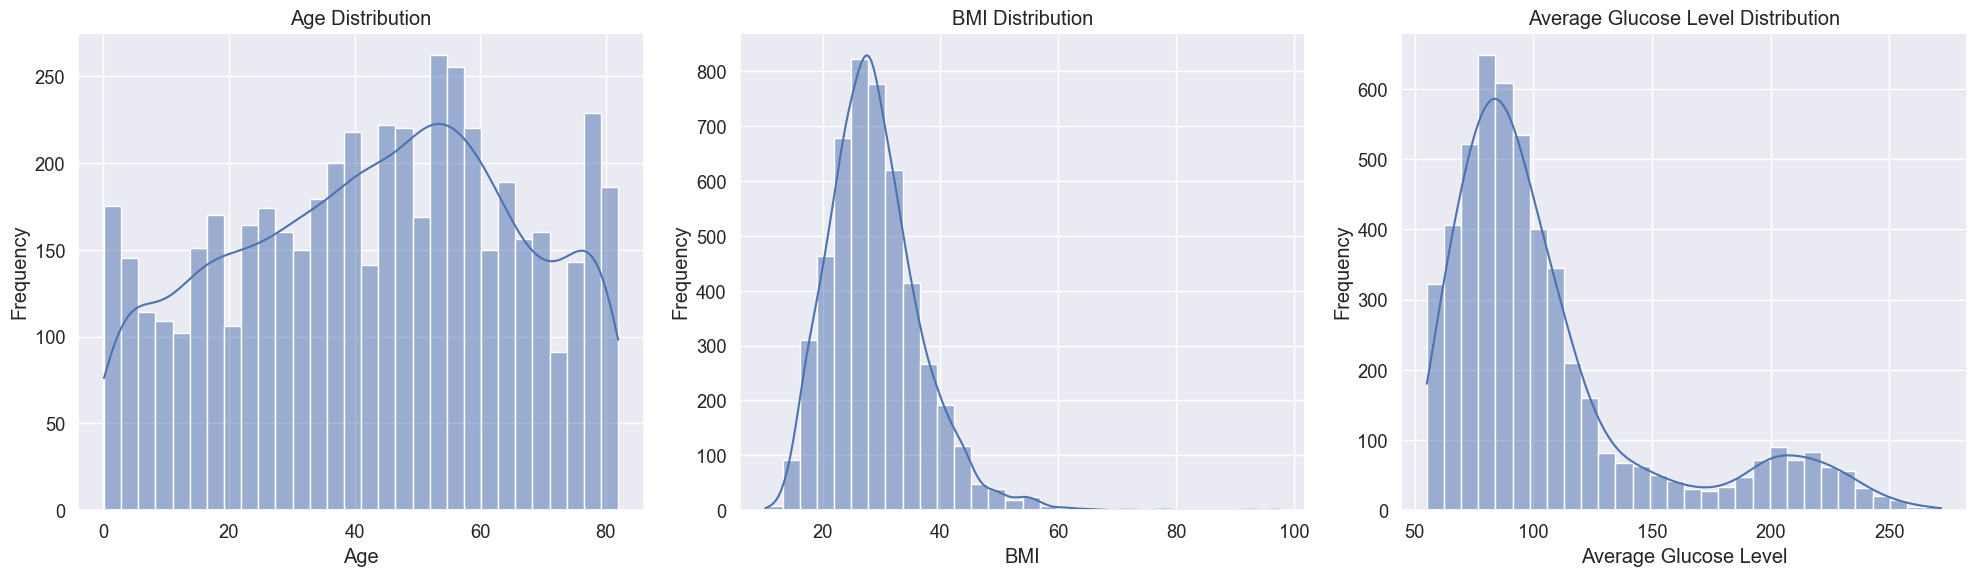

In [96]:
# Visualize the distribution of numerical features

fig, axes = plt.subplots(1, 3, figsize=(20, 6))


# Age distribution
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# bmi distribution
sns.histplot(df['bmi'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('BMI Distribution')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Frequency')

# Glucose level distribution
sns.histplot(df['avg_glucose_level'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Average Glucose Level Distribution')
axes[2].set_xlabel('Average Glucose Level')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


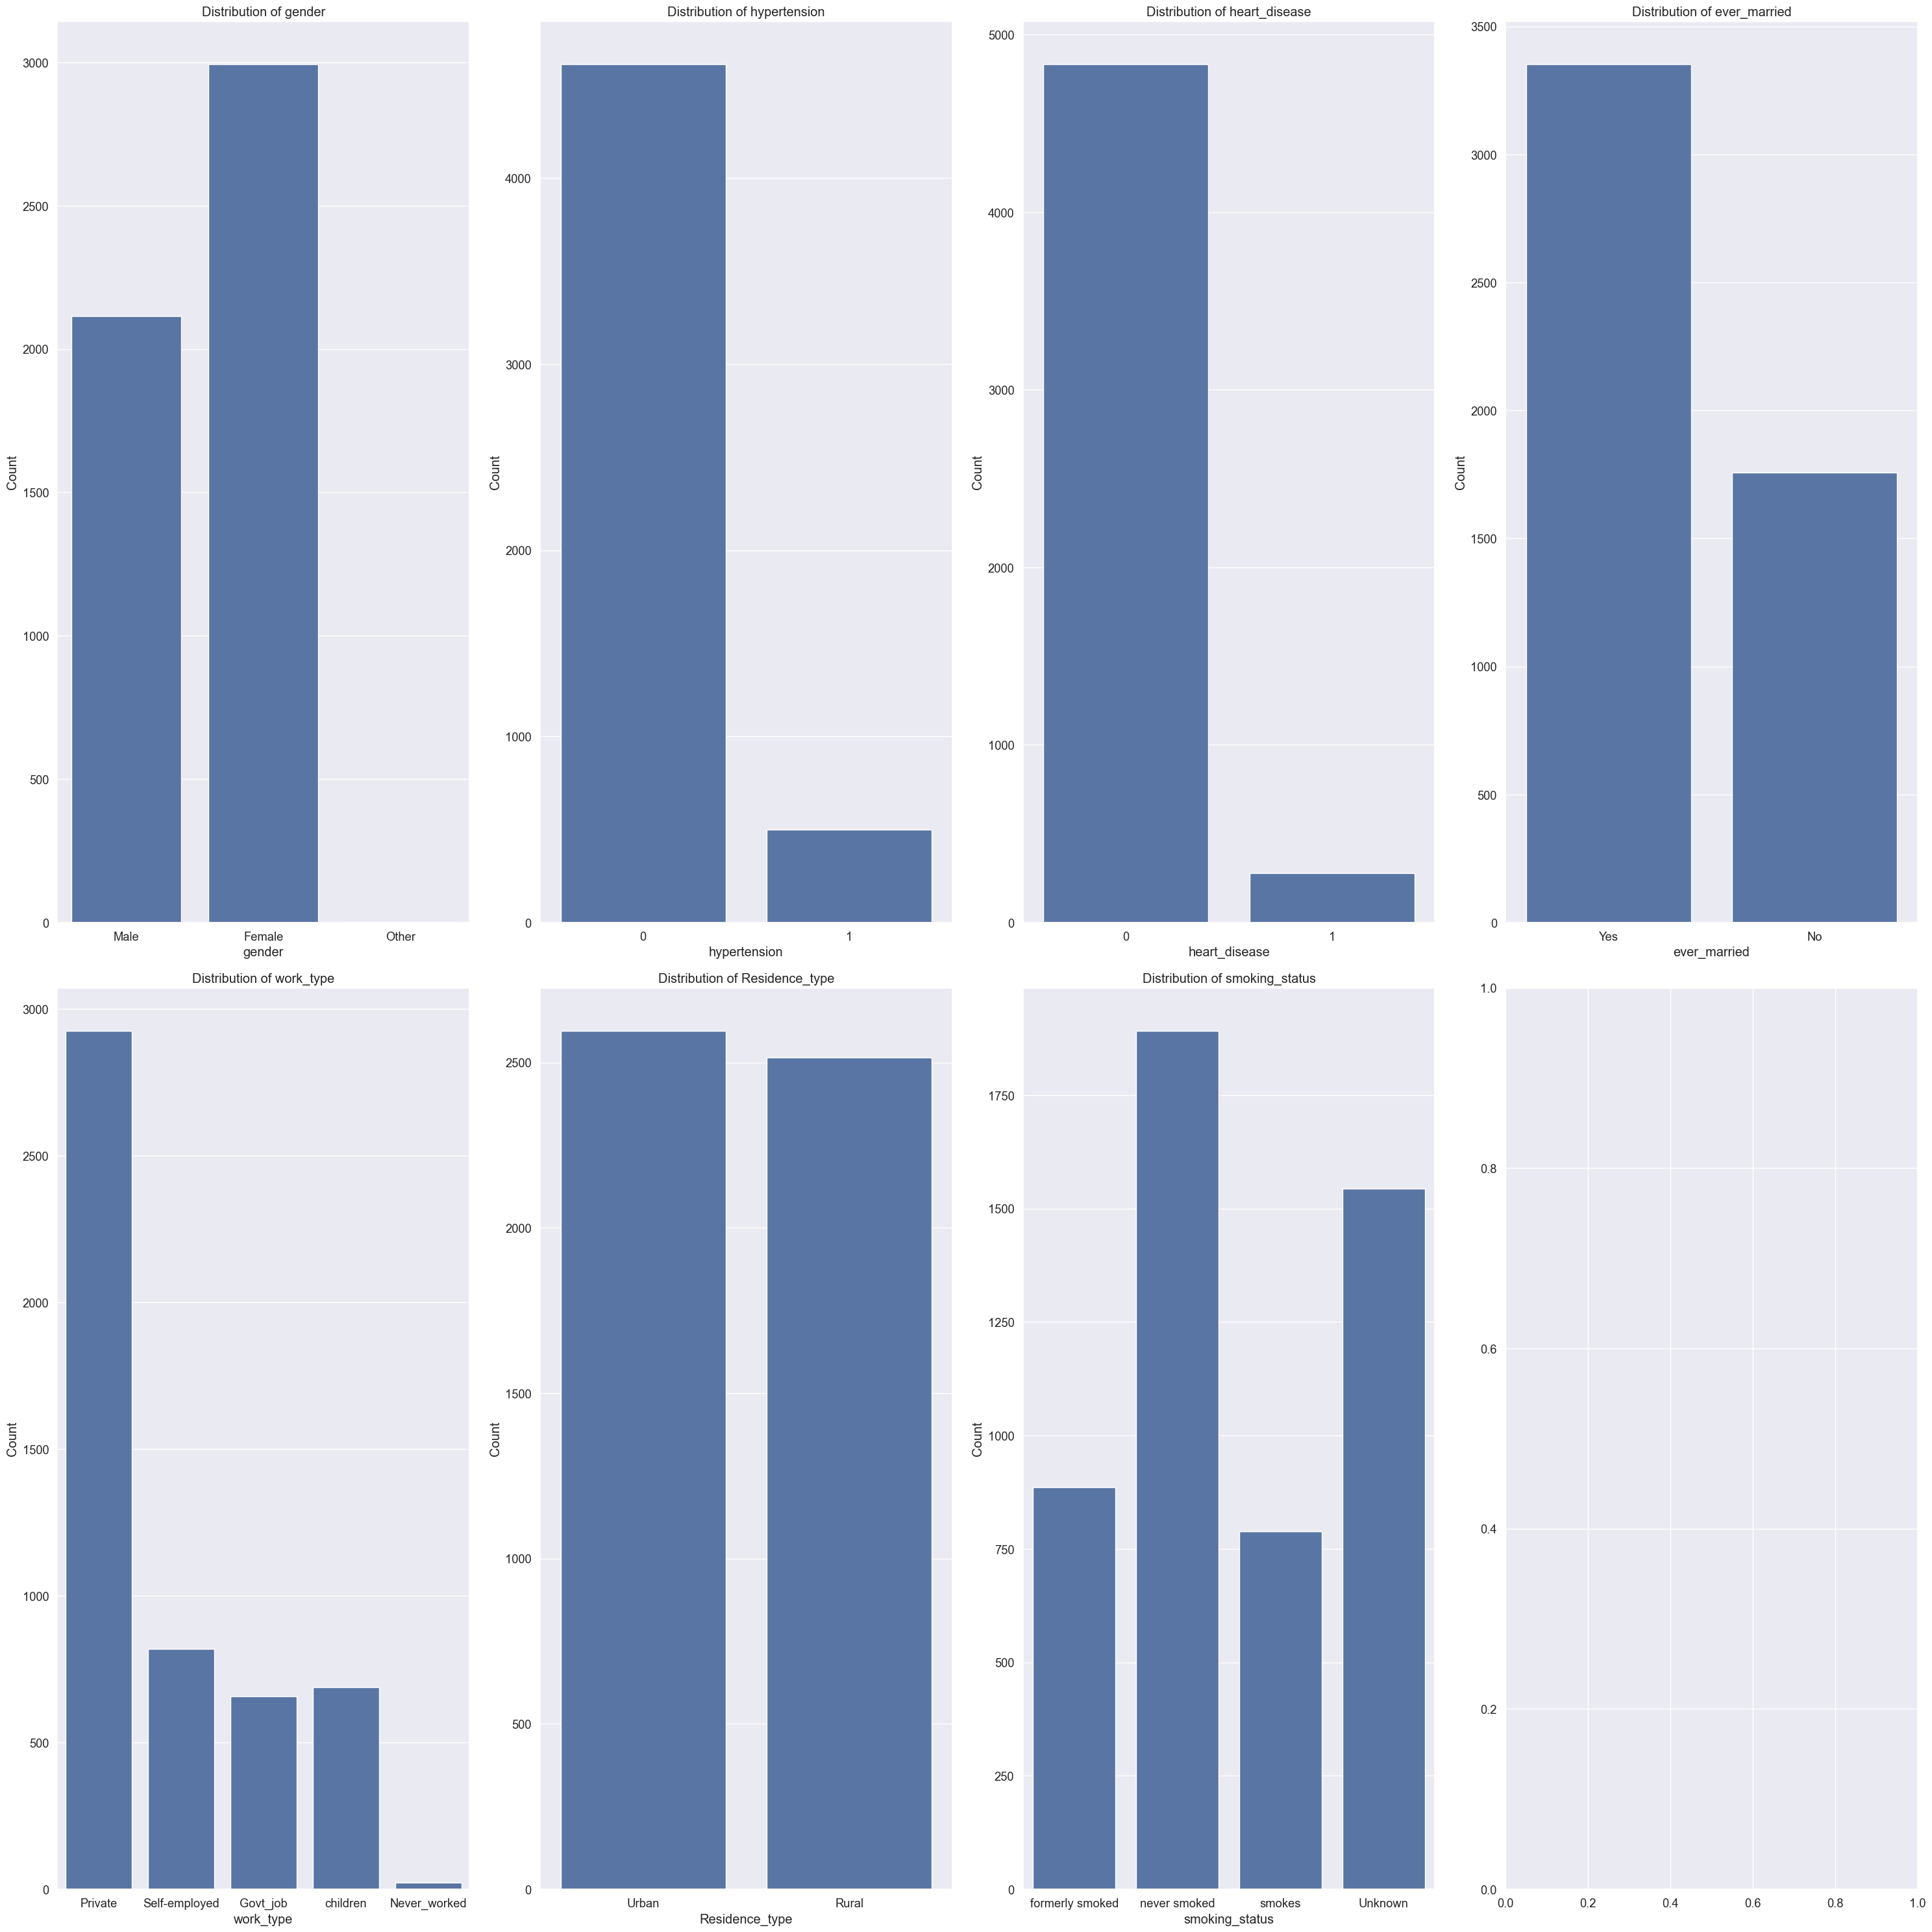

In [97]:
# Visualize the distribution of categorical features
# 2. Distribution of categorical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                       'work_type', 'Residence_type', 'smoking_status']

fig, axes = plt.subplots(2, 4, figsize=(30, 30))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()



Feature Relationships with Stroke Outcome
========================

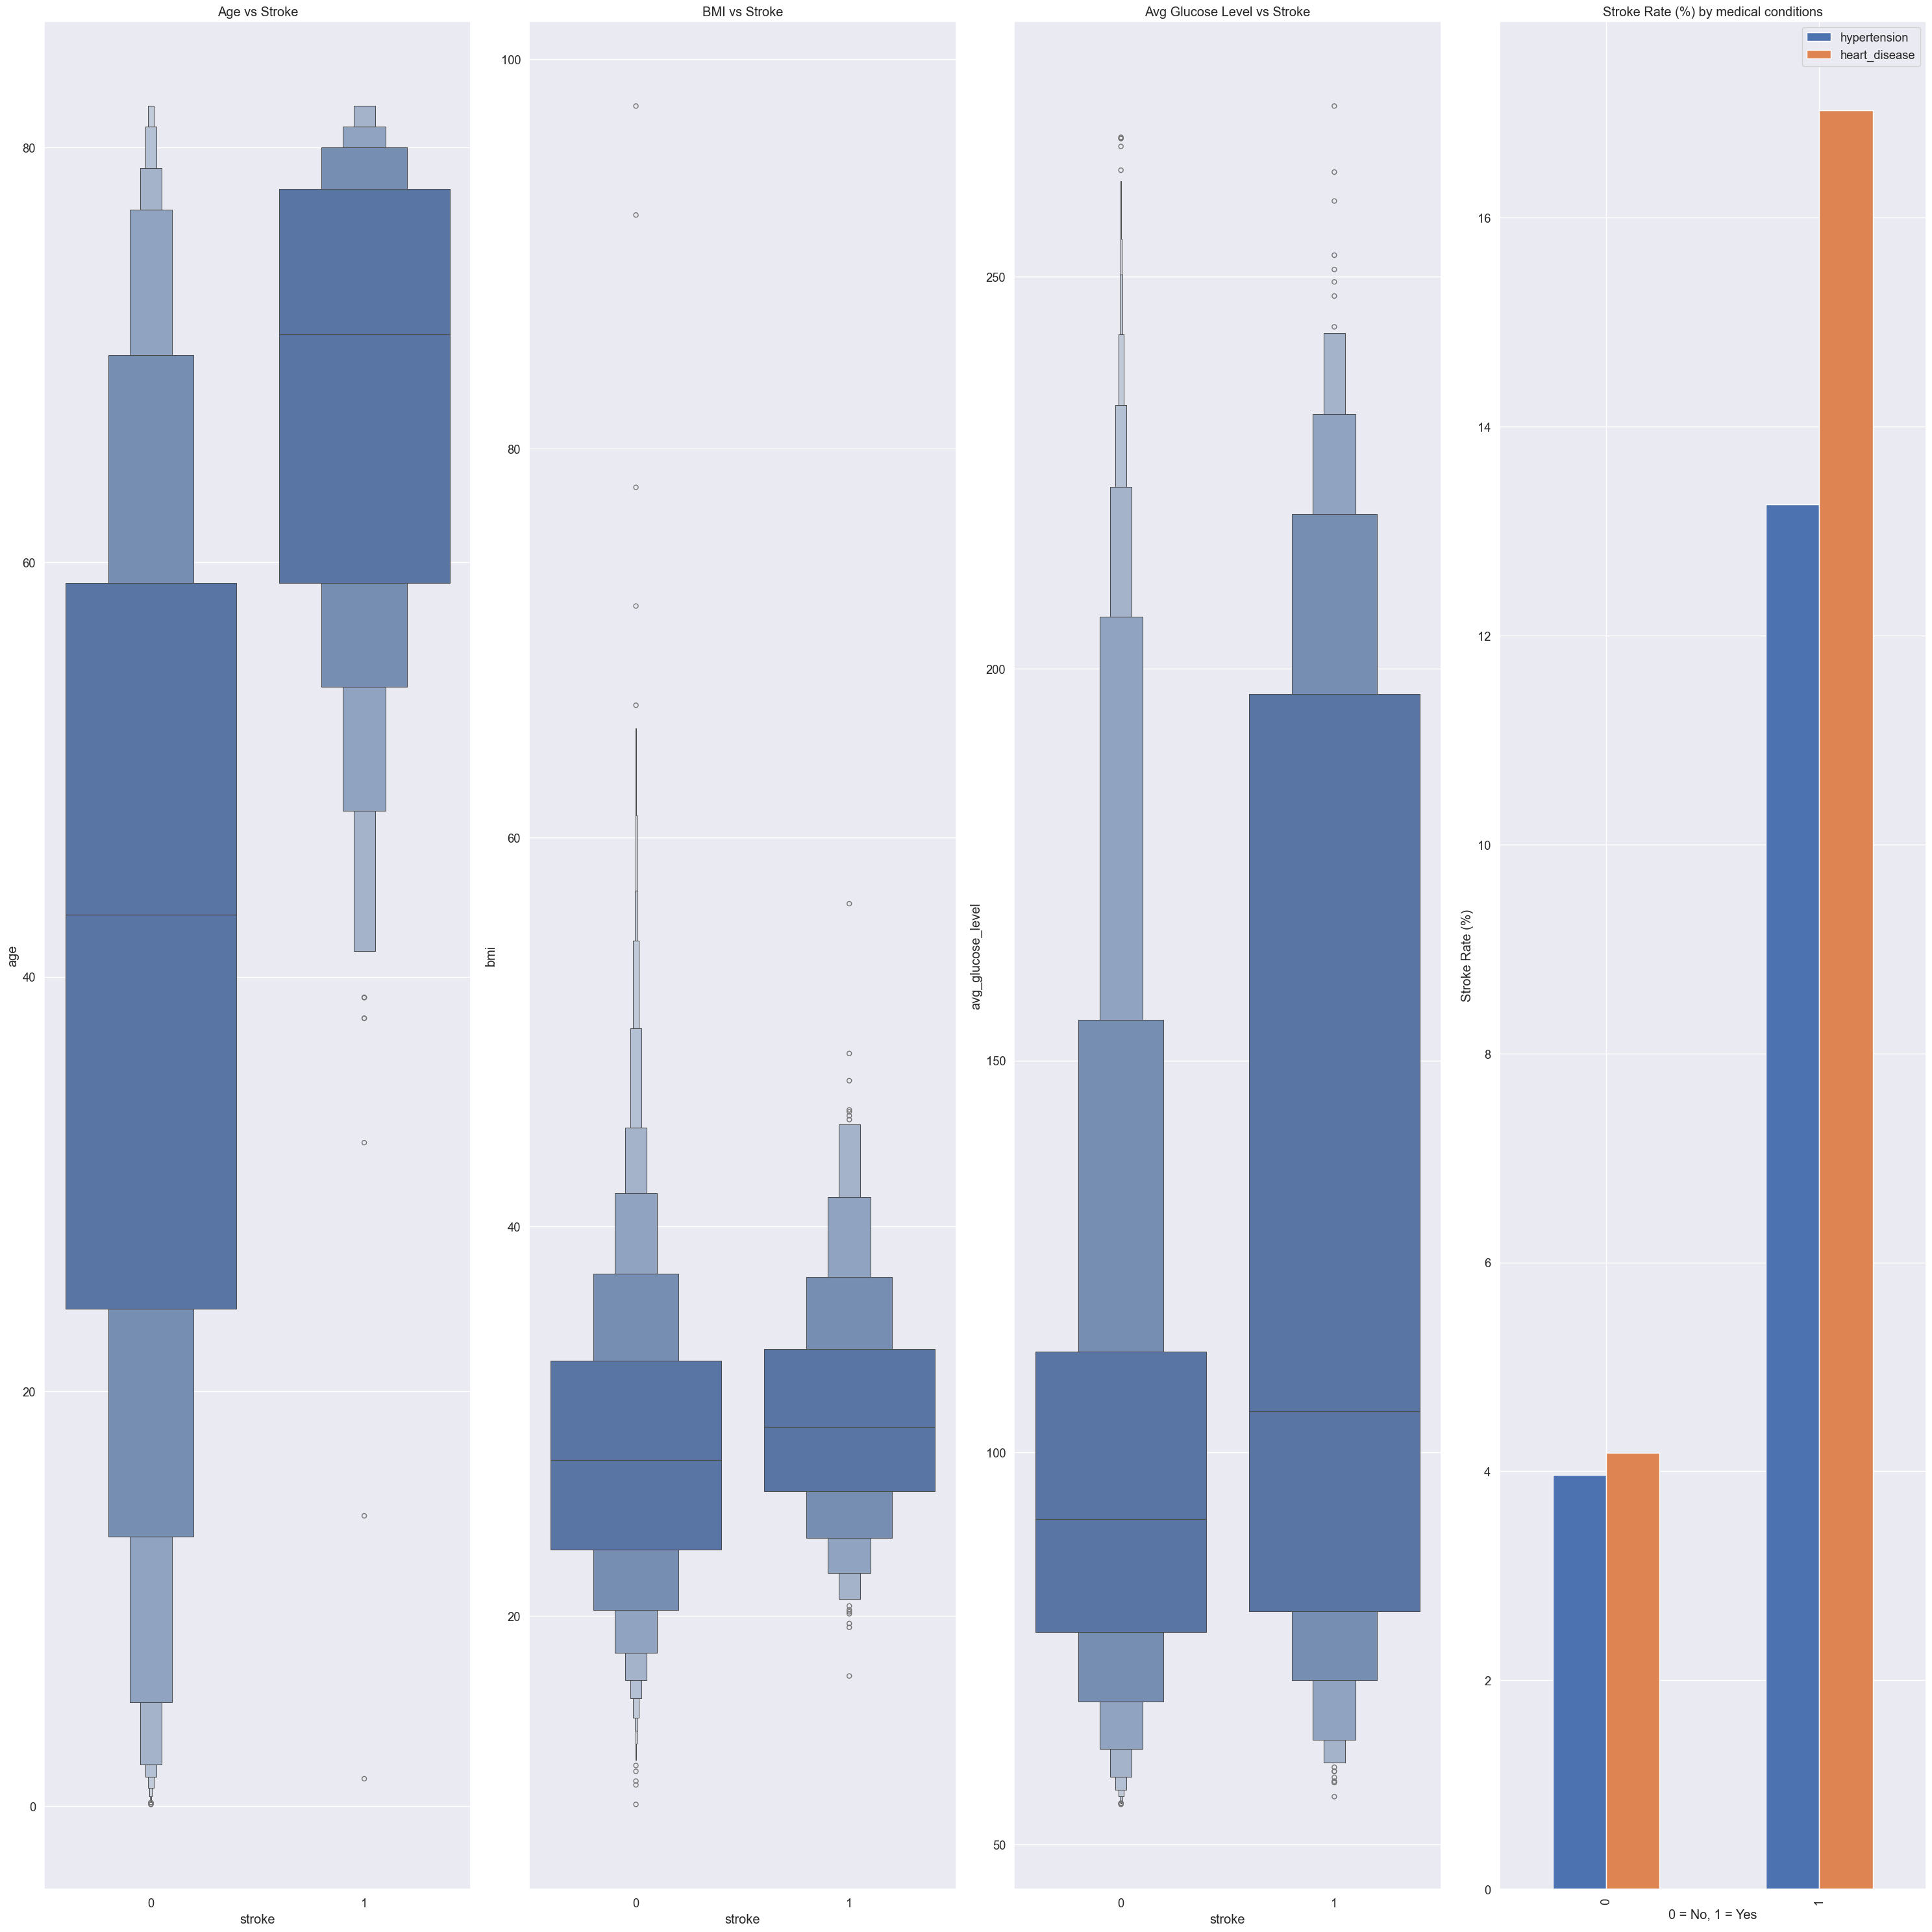

In [98]:
fig, axes = plt.subplots(1, 4, figsize=(30, 30))
axes = axes.flatten()  # Flatten the 2D array to 1D

sns.boxenplot(x='stroke', y='age', data=df, ax=axes[0])
axes[0].set_title('Age vs Stroke')

sns.boxenplot(x='stroke', y='bmi', data=df, ax=axes[1])
axes[1].set_title('BMI vs Stroke')

sns.boxenplot(x='stroke', y='avg_glucose_level', data=df, ax=axes[2])
axes[2].set_title('Avg Glucose Level vs Stroke')


stroke_by_condition = pd.DataFrame({
    'hypertension': df.groupby('hypertension')['stroke'].mean(),
    'heart_disease': df.groupby('heart_disease')['stroke'].mean(),
}) * 100

stroke_by_condition.plot(kind='bar', ax=axes[3])
axes[3].set_title('Stroke Rate (%) by medical conditions')
axes[3].set_ylabel('Stroke Rate (%)')
axes[3].set_xlabel('0 = No, 1 = Yes')



plt.tight_layout()
plt.show()

Correlation Matrix
========================


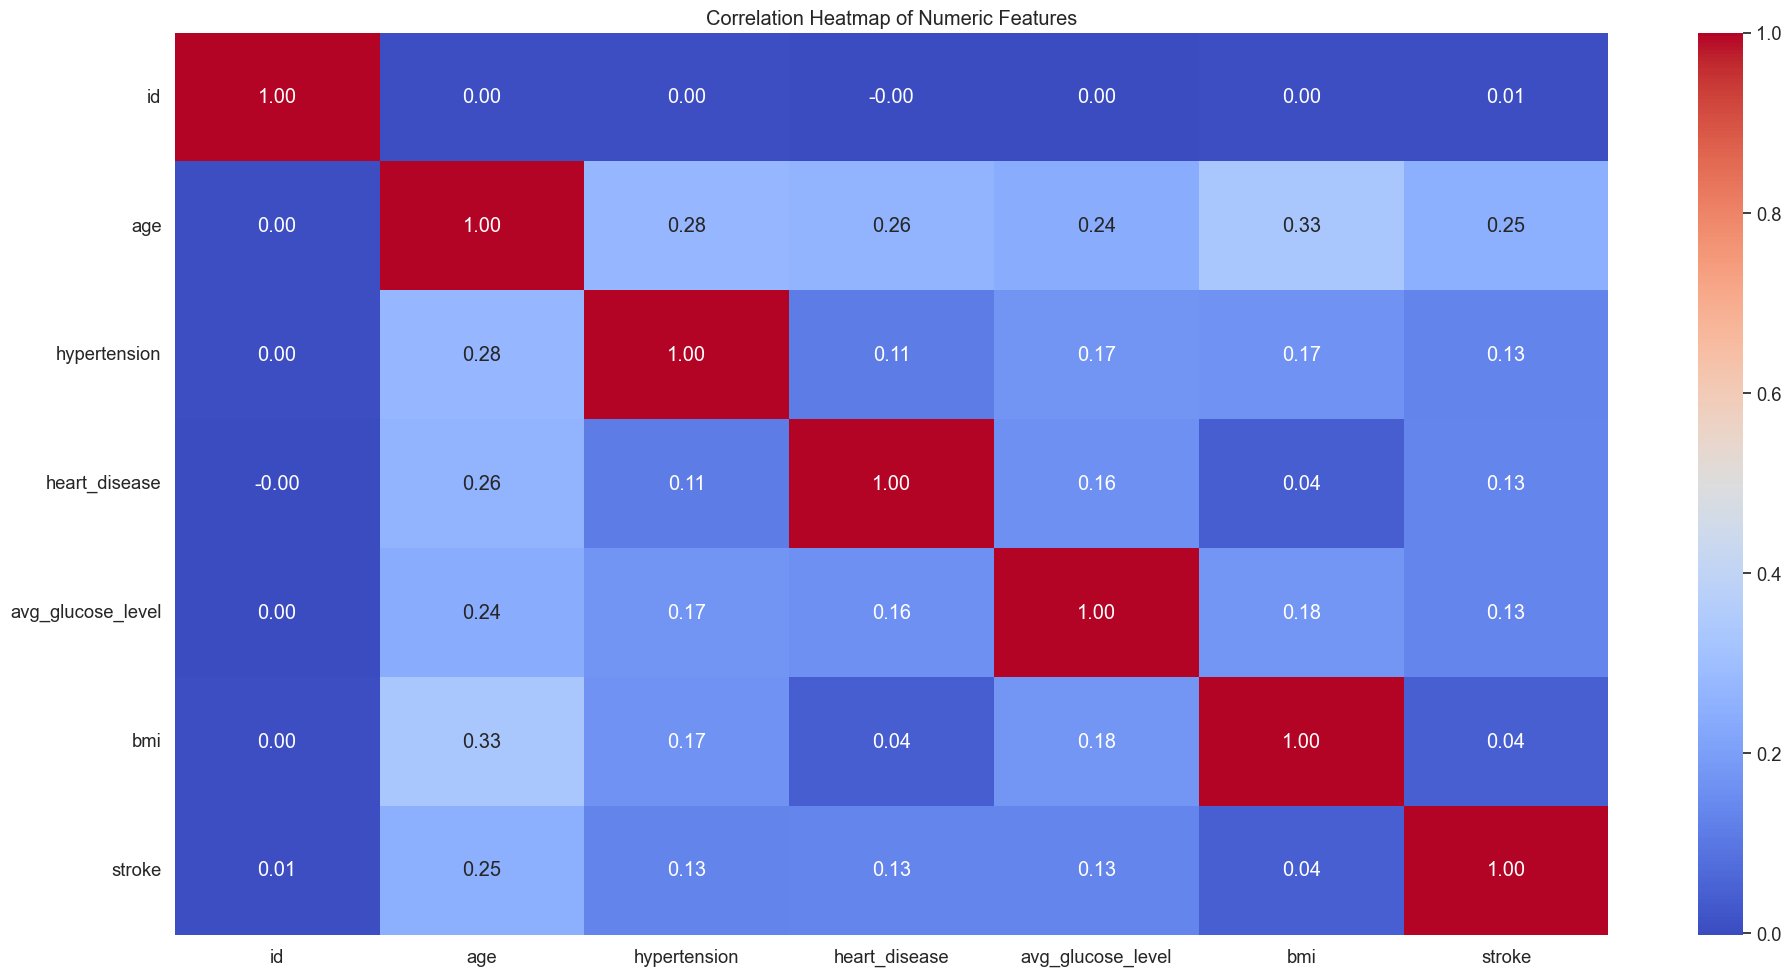

In [99]:
plt.figure(figsize=(20, 10))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


Dimensionality Reduction
========================

In [100]:
# Target variable

y = df['stroke']

In [101]:
# Dropping unnecessary columns

numeric_features = df.select_dtypes(include=['float64', 'int64']).drop(['id', 'stroke'], axis=1, errors='ignore')
numeric_features = numeric_features.fillna(numeric_features.mean())

print(f"X shape: {numeric_features.shape}")
display(numeric_features.head())


X shape: (5110, 5)


age  hypertension  heart_disease  avg_glucose_level        bmi
0  67.0             0              1             228.69  36.600000
1  61.0             0              0             202.21  28.893237
2  80.0             0              1             105.92  32.500000
3  49.0             0              0             171.23  34.400000
4  79.0             1              0             174.12  24.000000

In [102]:
# Scaling the numeric features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

print(f"X shape after scaling: {numeric_features_scaled.shape}")
display(pd.DataFrame(numeric_features_scaled, columns=numeric_features.columns).head())


X shape after scaling: (5110, 5)


age  hypertension  heart_disease  avg_glucose_level           bmi
0  1.051434     -0.328602       4.185032           2.706375  1.001234e+00
1  0.786070     -0.328602      -0.238947           2.121559  4.615554e-16
2  1.626390     -0.328602       4.185032          -0.005028  4.685773e-01
3  0.255342     -0.328602      -0.238947           1.437358  7.154182e-01
4  1.582163      3.043196      -0.238947           1.501184 -6.357112e-01

In [103]:
# Perform PCA to reduce dimensionality after scaling

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
numeric_features_pca = pca.fit_transform(numeric_features_scaled)

print(f"PCA shape: {numeric_features_pca.shape}")
display(pd.DataFrame(numeric_features_pca, columns=['PC1', 'PC2']).head())



PCA shape: (5110, 2)


PC1       PC2
0  3.533389  3.032898
1  1.130652  0.092992
2  2.473164  3.019433
3  0.841577 -0.398333
4  2.486429 -0.125535

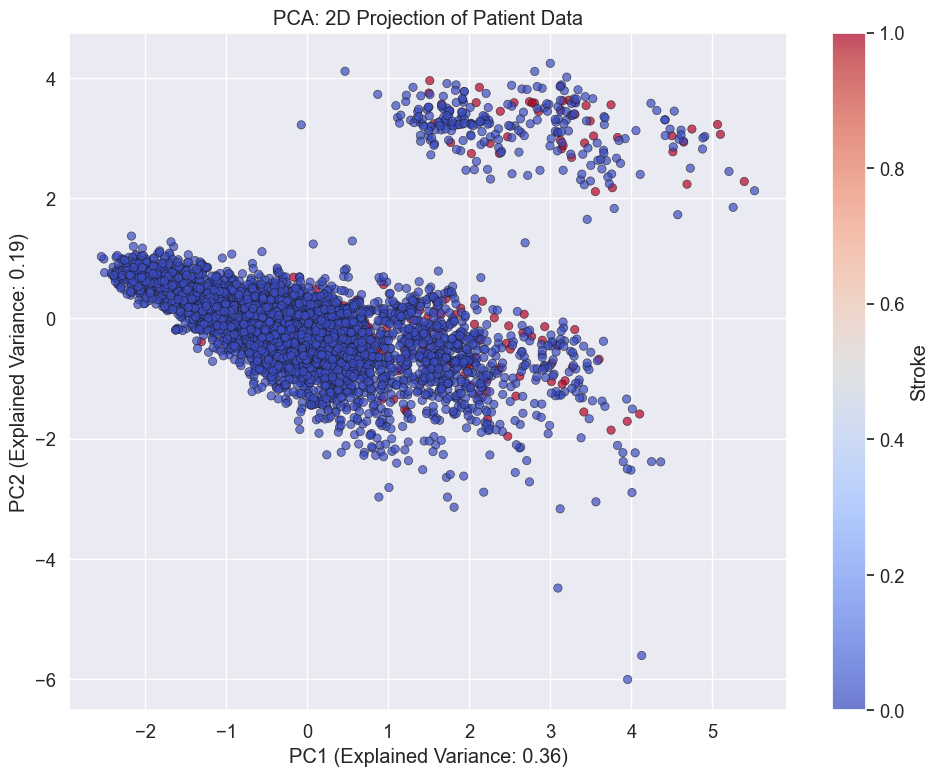

In [104]:
# Visualize PCA results in 2D for numeric features only

plt.figure(figsize=(10, 8))
scatter = plt.scatter(numeric_features_pca[:, 0], numeric_features_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7, edgecolors='k', linewidth=0.5)

plt.colorbar(scatter, label='Stroke')
plt.title('PCA: 2D Projection of Patient Data')
plt.xlabel(f'PC1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'PC2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2f})')


plt.tight_layout()
plt.savefig('pca_visualization.png')
plt.show()

In [105]:
# Categorical features 

categorical_features = df.select_dtypes(include=['object'])

# Display the first few rows of categorical features
print(f"Categorical features shape: {categorical_features.shape}")
display(categorical_features.head())

for col in categorical_features.columns:
    # Get the most frequent value
    most_frequent = categorical_features[col].mode()[0]
    # Fill NaN values with the most frequent value
    categorical_features[col] = categorical_features[col].fillna(most_frequent)


Categorical features shape: (5110, 5)


gender ever_married      work_type Residence_type   smoking_status
0    Male          Yes        Private          Urban  formerly smoked
1  Female          Yes  Self-employed          Rural     never smoked
2    Male          Yes        Private          Rural     never smoked
3  Female          Yes        Private          Urban           smokes
4  Female          Yes  Self-employed          Rural     never smoked

In [106]:

# One-hot encoding for as label encoding is worse for pca
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder - use sparse_output=False to get a dense matrix
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Get the categorical feature names
categorical_features = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding
encoded_features = pd.DataFrame(
    encoder.fit_transform(df[categorical_features]),
    columns=encoder.get_feature_names_out(categorical_features)
)

# Display the first few rows of encoded features
print(f"Encoded features shape: {encoded_features.shape}")
display(encoded_features.head())

Encoded features shape: (5110, 16)


gender_Female  gender_Male  gender_Other  ever_married_No  \
0            0.0          1.0           0.0              0.0   
1            1.0          0.0           0.0              0.0   
2            0.0          1.0           0.0              0.0   
3            1.0          0.0           0.0              0.0   
4            1.0          0.0           0.0              0.0   

   ever_married_Yes  work_type_Govt_job  work_type_Never_worked  \
0               1.0                 0.0                     0.0   
1               1.0                 0.0                     0.0   
2               1.0                 0.0                     0.0   
3               1.0                 0.0                     0.0   
4               1.0                 0.0                     0.0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0                1.0                      0.0                 0.0   
1                0.0                      1.0                 0.0   
2                1.0                      0.0                 0.0   
3                1.0                      0.0                 0.0   
4                0.0                      1.0                 0.0   

   Residence_type_Rural  Residence_type_Urban  smoking_status_Unknown  \
0                   0.0                   1.0                     0.0   
1                   1.0                   0.0                     0.0   
2                   1.0                   0.0                     0.0   
3                   0.0                   1.0                     0.0   
4                   1.0                   0.0                     0.0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                             1.0                          0.0   
1                             0.0                          1.0   
2                             0.0                          1.0   
3                             0.0                          0.0   
4                             0.0                          1.0   

   smoking_status_smokes  
0                    0.0  
1                    0.0  
2                    0.0  
3                    1.0  
4                    0.0

In [107]:
# Reset index to ensure proper concatenation
numeric_features_reset = numeric_features.reset_index(drop=True)
encoded_features_reset = encoded_features.reset_index(drop=True)

X_combined = pd.concat([numeric_features_reset, encoded_features_reset], axis=1)
print(f"Combined features shape: {X_combined.shape}")
display(X_combined.head())

Combined features shape: (5110, 21)


age  hypertension  heart_disease  avg_glucose_level        bmi  \
0  67.0             0              1             228.69  36.600000   
1  61.0             0              0             202.21  28.893237   
2  80.0             0              1             105.92  32.500000   
3  49.0             0              0             171.23  34.400000   
4  79.0             1              0             174.12  24.000000   

   gender_Female  gender_Male  gender_Other  ever_married_No  \
0            0.0          1.0           0.0              0.0   
1            1.0          0.0           0.0              0.0   
2            0.0          1.0           0.0              0.0   
3            1.0          0.0           0.0              0.0   
4            1.0          0.0           0.0              0.0   

   ever_married_Yes  ...  work_type_Never_worked  work_type_Private  \
0               1.0  ...                     0.0                1.0   
1               1.0  ...                     0.0                0.0   
2               1.0  ...                     0.0                1.0   
3               1.0  ...                     0.0                1.0   
4               1.0  ...                     0.0                0.0   

   work_type_Self-employed  work_type_children  Residence_type_Rural  \
0                      0.0                 0.0                   0.0   
1                      1.0                 0.0                   1.0   
2                      0.0                 0.0                   1.0   
3                      0.0                 0.0                   0.0   
4                      1.0                 0.0                   1.0   

   Residence_type_Urban  smoking_status_Unknown  \
0                   1.0                     0.0   
1                   0.0                     0.0   
2                   0.0                     0.0   
3                   1.0                     0.0   
4                   0.0                     0.0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                             1.0                          0.0   
1                             0.0                          1.0   
2                             0.0                          1.0   
3                             0.0                          0.0   
4                             0.0                          1.0   

   smoking_status_smokes  
0                    0.0  
1                    0.0  
2                    0.0  
3                    1.0  
4                    0.0  

[5 rows x 21 columns]

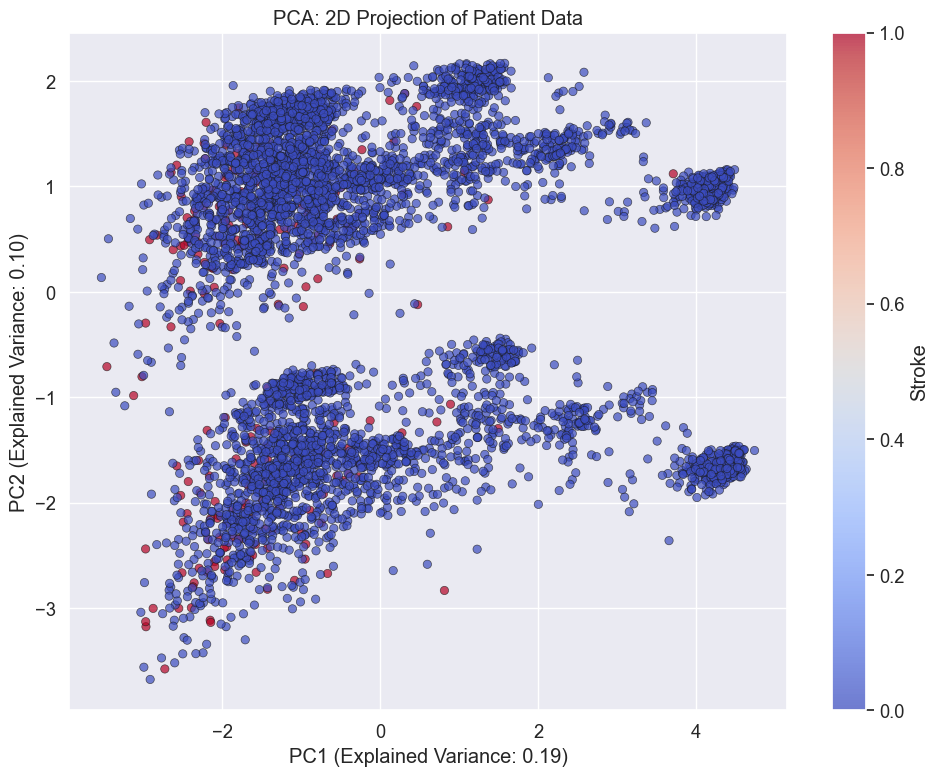

In [108]:
# Scaling the combined features

X_combined_scaled = scaler.fit_transform(X_combined)

X_combined_pca = pca.fit_transform(X_combined_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_combined_pca[:, 0], X_combined_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7, edgecolors='k', linewidth=0.5)

plt.colorbar(scatter, label='Stroke')
plt.title('PCA: 2D Projection of Patient Data')
plt.xlabel(f'PC1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'PC2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2f})')

plt.tight_layout()
plt.savefig('pca_visualization.png')
plt.show()

Linear Discriminant  Analysis
=============================

Explained variance ratio: [1.]


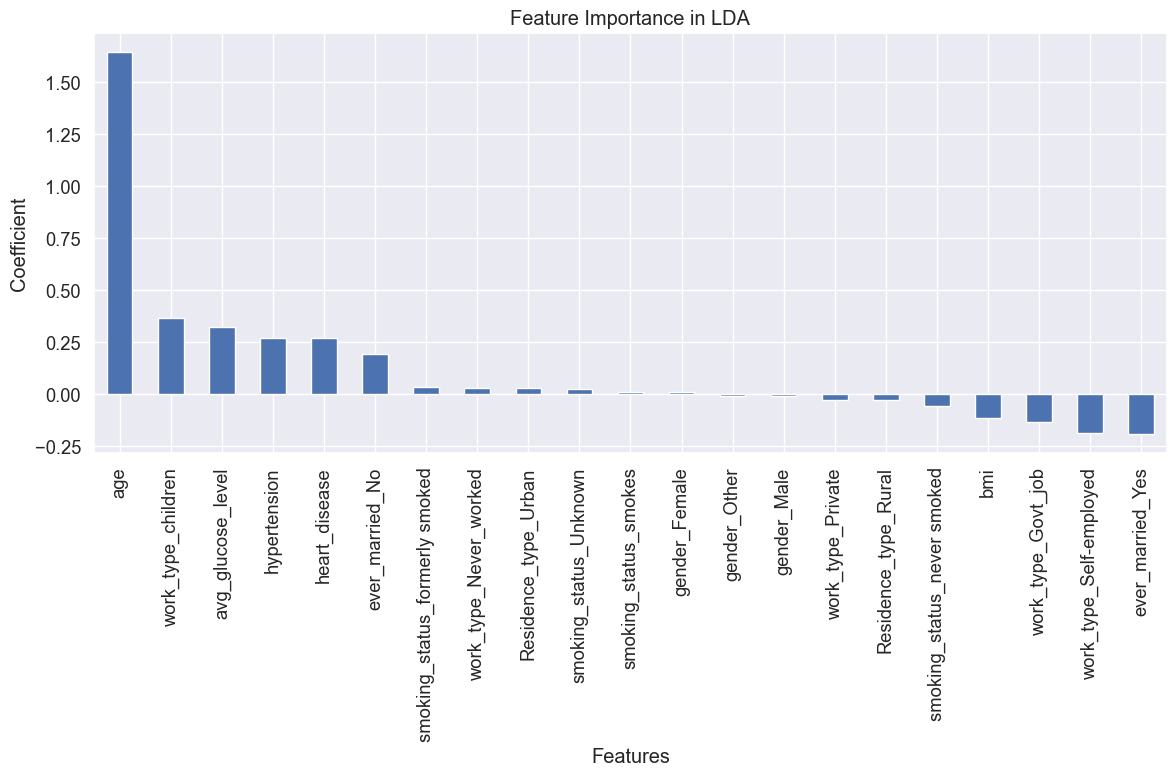

In [109]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)  
X_lda = lda.fit_transform(X_combined_scaled, y)

print(f"Explained variance ratio: {lda.explained_variance_ratio_}")

coef = pd.DataFrame(
    lda.coef_,
    columns=X_combined.columns,
    index=['LD1']
).T

# Sort and plot feature importance
plt.figure(figsize=(12, 8))
coef['LD1'].sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance in LDA')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.tight_layout()
plt.show()

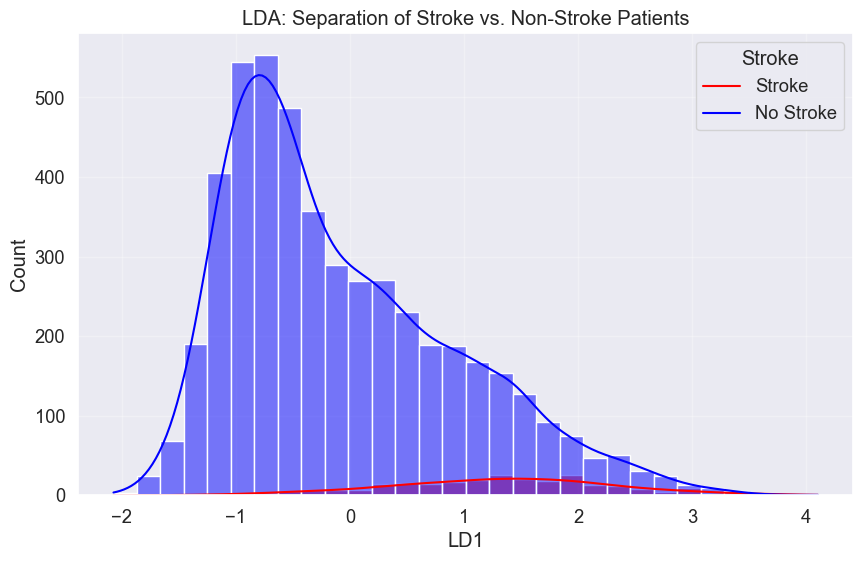

In [110]:
lda_df = pd.DataFrame(data=X_lda, columns=['LD1'])
lda_df['stroke'] = df['stroke'].reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.histplot(data=lda_df, x='LD1', hue='stroke', bins=30, kde=True, palette={0:'blue', 1:'red'})
plt.title('LDA: Separation of Stroke vs. Non-Stroke Patients')
plt.xlabel('LD1')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['Stroke', 'No Stroke'])
plt.grid(alpha=0.3)
plt.show()

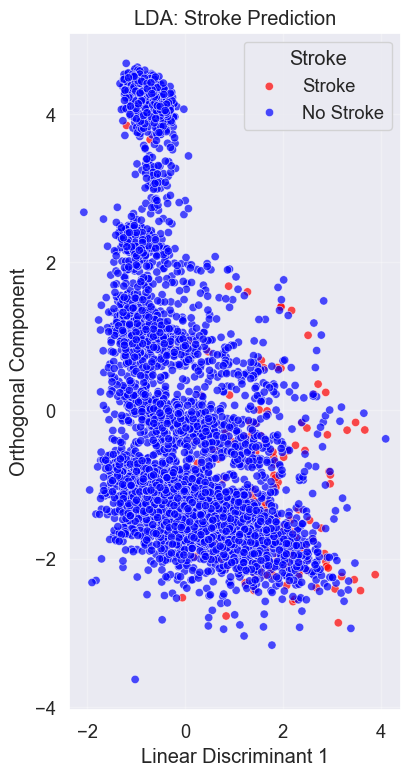

In [111]:
# using orthogonal components to visualize the lda in 2D

lda_direction = lda.coef_[0]
lda_direction = lda_direction / np.linalg.norm(lda_direction)

X_orthogonal = X_combined_scaled - np.outer(X_lda.flatten(), lda_direction)

pca_orthogonal = PCA(n_components=1)
X_lda_2d = pca_orthogonal.fit_transform(X_orthogonal)

X_lda_2d = np.column_stack((X_lda, X_lda_2d))

# Create LDA DataFrame for visualization
lda_df = pd.DataFrame(data=X_lda_2d, columns=['LD1', 'LD2'])
lda_df['stroke'] = df['stroke'].reset_index(drop=True)

# Plot LDA
plt.subplot(1, 3, 2)
sns.scatterplot(x='LD1', y='LD2', hue='stroke', data=lda_df, palette={0:'blue', 1:'red'}, alpha=0.7)
plt.title('LDA: Stroke Prediction')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Orthogonal Component')
plt.legend(title='Stroke', labels=['Stroke', 'No Stroke'])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('lda_visualization.png')
plt.show()

t-Distributed Stochastic Neighbor Embedding
===========================================

In [112]:
# t-SNE setup for visualization

# we chose 30 for perplexity as it is a good default value for most datasets.

from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,          # 2D visualization
    perplexity=30,           # Balance between local and global structure (try 5-50)
    learning_rate='auto',    # Auto learning rate based on dataset size
    n_iter=1000,         # Number of iterations
    random_state=42          # For reproducibility
)




In [113]:
# t-SNE fit and transform

X_tsne = tsne.fit_transform(X_combined_scaled)

tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE1', 't-SNE2'])
tsne_df['stroke'] = df['stroke'].reset_index(drop=True)

C:\Users\yakas\AppData\Roaming\Python\Python313\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


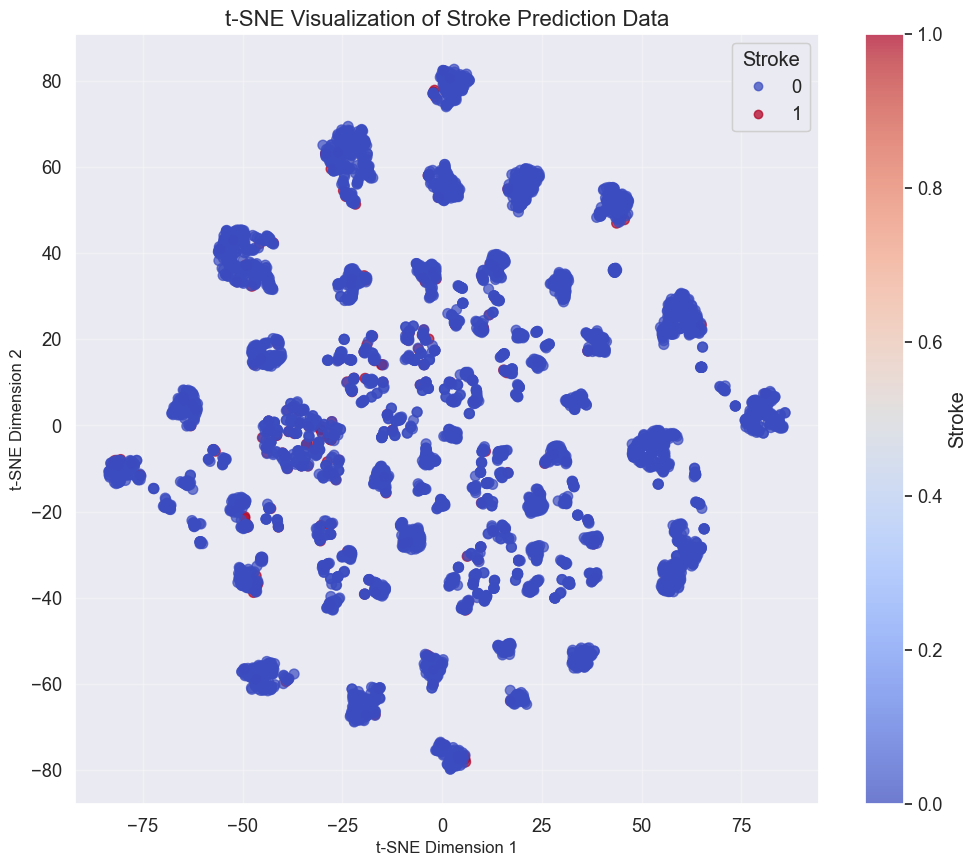

In [114]:
# Visualize t-SNE results
plt.figure(figsize=(12, 10))

# Main scatter plot
scatter = plt.scatter(
    x='t-SNE1', 
    y='t-SNE2', 
    c=tsne_df['stroke'],
    cmap='coolwarm',
    alpha=0.7,
    s=50,
    data=tsne_df
)

# Add legend
legend1 = plt.legend(*scatter.legend_elements(),title="Stroke")
plt.gca().add_artist(legend1)

# Add labels and title
plt.title('t-SNE Visualization of Stroke Prediction Data', fontsize=16)
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.grid(alpha=0.3)

# Add colorbar
plt.colorbar(scatter, label='Stroke')
plt.savefig('tsne_visualization.png')
plt.show()

Data Analysis
=============

In [115]:
# show me count of every value in every categorical column.
data = df.select_dtypes(include=['object'])

print("\nCount of each value in every categorical column:")
for col in data.columns:
    print(f"\n{col}:")
    print(data[col].value_counts())




Count of each value in every categorical column:

gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

ever_married:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

work_type:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence_type:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

smoking_status:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [116]:
# Drop the single row with other in gender

data = df[df['gender'] != 'Other'].reset_index(drop=True)
df = data

In [117]:
# check if a child has a stroke
print("\nCount of children with stroke:")
print(data[data['age'] < 18]['stroke'].value_counts())

# check if row with children in work type has stroke.
print("\nCount of children with stroke in work type:")
print(data[(data['work_type'] == 'children')]['stroke'].value_counts())



Count of children with stroke:
stroke
0    854
1      2
Name: count, dtype: int64

Count of children with stroke in work type:
stroke
0    685
1      2
Name: count, dtype: int64


In [118]:
# select hypertension column
hypertension = df[['hypertension']]
print(hypertension.value_counts())

# select heart disease column
heart_disease = df[['heart_disease']]
print(heart_disease.value_counts())


hypertension
0               4611
1                498
Name: count, dtype: int64
heart_disease
0                4833
1                 276
Name: count, dtype: int64


In [119]:
# Use standard deviation to identify outliers in BMI
mean_bmi = df['bmi'].mean()
std_bmi = df['bmi'].std()

# Define boundaries for outliers (typically ±3 standard deviations from the mean)
lower_bound = mean_bmi - 3 * std_bmi
upper_bound = mean_bmi + 3 * std_bmi

# Filter outliers
bmi_std_outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)].reset_index(drop=True)

print("\nOutliers in BMI column using 3 standard deviations:")
print(f"Mean BMI: {mean_bmi:.2f}, Standard Deviation: {std_bmi:.2f}")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
print(f"Number of outliers: {len(bmi_std_outliers)}")

# Display outliers with stroke status
print("\nOutliers in BMI with stroke status:")
print(bmi_std_outliers[['bmi', 'stroke']])


Outliers in BMI column using 3 standard deviations:
Mean BMI: 28.89, Standard Deviation: 7.85
Lower bound: 5.33, Upper bound: 52.46
Number of outliers: 58

Outliers in BMI with stroke status:
     bmi  stroke
0   56.6       1
1   54.6       0
2   60.9       0
3   54.7       0
4   64.8       0
5   54.7       0
6   60.2       0
7   71.9       0
8   54.6       0
9   55.7       0
10  55.7       0
11  57.5       0
12  54.2       0
13  78.0       0
14  53.4       0
15  55.2       0
16  55.0       0
17  54.8       0
18  52.8       0
19  66.8       0
20  55.1       0
21  55.9       0
22  57.3       0
23  56.0       0
24  57.7       0
25  54.0       0
26  56.1       0
27  97.6       0
28  53.9       0
29  53.8       0
30  52.7       0
31  52.8       0
32  55.7       0
33  53.5       0
34  63.3       0
35  52.8       0
36  61.2       0
37  58.1       0
38  52.7       0
39  53.4       0
40  59.7       0
41  52.5       0
42  52.9       0
43  54.7       0
44  61.6       0
45  53.8       0
46  54.3

In [120]:
# Use standard deviation to identify outliers in glucose
mean_glucose = df['avg_glucose_level'].mean()
std_glucose = df['avg_glucose_level'].std()

# Define boundaries for outliers (typically ±3 standard deviations from the mean)
lower_bound_glucose = max(mean_glucose - 3 * std_glucose,0)
upper_bound_glucose = mean_glucose + 3 * std_glucose

# Filter outliers
glucose_std_outliers = df[(df['avg_glucose_level'] < lower_bound_glucose) | (df['avg_glucose_level'] > upper_bound_glucose)].reset_index(drop=True)

print("\nOutliers in avg_glucose_level column using 3 standard deviations:")
print(f"Mean avg_glucose_level: {mean_glucose:.2f}, Standard Deviation: {std_glucose:.2f}")
print(f"Lower bound: {lower_bound_glucose:.2f}, Upper bound: {upper_bound_glucose:.2f}")
print(f"Number of outliers: {len(glucose_std_outliers)}")
display(glucose_std_outliers.head())


Outliers in avg_glucose_level column using 3 standard deviations:
Mean avg_glucose_level: 106.14, Standard Deviation: 45.29
Lower bound: 0.00, Upper bound: 242.00
Number of outliers: 49


id  gender   age  hypertension  heart_disease ever_married  \
0  54401    Male  80.0             0              1          Yes   
1  19824    Male  76.0             1              0          Yes   
2  13491    Male  80.0             0              0          Yes   
3  44033    Male  56.0             1              0          Yes   
4  71279  Female  71.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0  Self-employed          Urban             252.72  30.5  formerly smoked   
1        Private          Rural             243.58  33.6     never smoked   
2        Private          Rural             259.63  31.7           smokes   
3        Private          Rural             249.31  35.8     never smoked   
4       Govt_job          Urban             263.32  38.7     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [121]:
# We will drop the bmi outliers and keep the glucose outliers as glucose is a very important factor in stroke prediction.

# Drop the outliers from the original dataframe
df_cleaned = df[~df.index.isin(bmi_std_outliers.index)].reset_index(drop=True)
print(f"Cleaned dataset shape: {df_cleaned.shape}")

Cleaned dataset shape: (5051, 12)


In [122]:
# calc the mean of bmi for each type rescidence type.
residence_bmi = df_cleaned.groupby('Residence_type')['bmi'].mean()
print("\nMean BMI for each Residence type:")  
print(residence_bmi)

# replace the missing values with the mean of the respective residence type.
for residence in df_cleaned['Residence_type'].unique():
    mean_bmi = df_cleaned[df_cleaned['Residence_type'] == residence]['bmi'].mean()
    df_cleaned.loc[(df_cleaned['Residence_type'] == residence) & (df_cleaned['bmi'].isnull()), 'bmi'] = mean_bmi

# check if there are any missing values in the dataset after replacing the missing values.
print("\nMissing values in each column after replacing missing values:")
print(df_cleaned.isnull().sum())



Mean BMI for each Residence type:
Residence_type
Rural    28.890280
Urban    28.872982
Name: bmi, dtype: float64

Missing values in each column after replacing missing values:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [123]:
# display the percentage of people who smoke or never or formely for each work type.
smoking_status = df_cleaned.groupby('work_type')['smoking_status'].value_counts(normalize=True).unstack().fillna(0) * 100
smoking_status = smoking_status.rename(columns={
    'formerly smoked': 'Formerly Smoked',
    'never smoked': 'Never Smoked',
    'smokes': 'Smokes'
})
print("\nPercentage of smoking status for each work type:")
display(smoking_status)


Percentage of smoking status for each work type:


smoking_status    Unknown  Formerly Smoked  Never Smoked     Smokes
work_type                                                          
Govt_job        18.586790        20.430108     43.010753  17.972350
Never_worked    36.363636         0.000000     63.636364   0.000000
Private         21.914008        17.891817     41.608877  18.585298
Self-employed   19.206939        25.650558     39.900867  15.241636
children        89.956332         1.892285      7.860262   0.291121

In [124]:
# show me how many unknown in smoking status before edit.
print("\nCount of unknown smoking status before edit:")
print(df_cleaned['smoking_status'].value_counts())


# for all children with unknown smoking status, we will replace it with never smoked.
df_cleaned.loc[(df_cleaned['work_type'] == 'children') & (df_cleaned['smoking_status'] == "Unknown"), 'smoking_status'] = 'never smoked'

# show me how many unknown in smoking status after edit.
print("\nCount of unknown smoking status after edit:")
print(df_cleaned['smoking_status'].value_counts())


Count of unknown smoking status before edit:
smoking_status
never smoked       1870
Unknown            1534
formerly smoked     869
smokes              778
Name: count, dtype: int64

Count of unknown smoking status after edit:
smoking_status
never smoked       2488
Unknown             916
formerly smoked     869
smokes              778
Name: count, dtype: int64


In [125]:
# show me percentage of having stroke while unknown smoking.

unknown_smoking = df_cleaned[df_cleaned['stroke'] == 1]
unknown_smoking_stroke = unknown_smoking['smoking_status'].value_counts(normalize=True) * 100
print("\nPercentage of stroke for unknown smoking status:")
print(unknown_smoking_stroke)




Percentage of stroke for unknown smoking status:
smoking_status
never smoked       36.649215
formerly smoked    28.795812
Unknown            18.324607
smokes             16.230366
Name: proportion, dtype: float64


In [126]:
# encode gender, ever_married, residence_type into 0 and 1.
df_cleaned = df_cleaned.replace({'gender': {'Male': 1, 'Female': 0}, 'ever_married': {'Yes': 1, 'No': 0}, 'Residence_type': {'Urban': 1, 'Rural': 0}})

# encode work_type using one hot encoding from sklearn.
work_type_dummies = pd.get_dummies(df_cleaned['work_type'], prefix='work_type', drop_first=True)
df_cleaned = pd.concat([df_cleaned, work_type_dummies], axis=1)

# drop work_type column from the original dataframe.
df_cleaned = df_cleaned.drop('work_type', axis=1)

# encode smoking_status using label encoding.
df_cleaned = df_cleaned.replace({'smoking_status': {'Unknown': 1, 'never smoked': 0, 'smokes': 3, 'formerly smoked': 2}})


display(df_cleaned.head())


C:\Users\yakas\AppData\Local\Temp\ipykernel_30904\3381482234.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned = df_cleaned.replace({'gender': {'Male': 1, 'Female': 0}, 'ever_married': {'Yes': 1, 'No': 0}, 'Residence_type': {'Urban': 1, 'Rural': 0}})
C:\Users\yakas\AppData\Local\Temp\ipykernel_30904\3381482234.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned = df_cleaned.replace({'smoking_status': {'Unknown': 1, 'never smoked': 0, 'smokes': 3, 'formerly smoked': 2}})


id  gender   age  hypertension  heart_disease  ever_married  \
0  58631       1  73.0             1              0             1   
1   5111       0  54.0             1              0             1   
2  10710       0  56.0             0              0             1   
3  55927       0  80.0             1              0             1   
4  65842       0  67.0             1              0             1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  \
0               1             194.99  32.8               0       1   
1               1             180.93  27.7               0       1   
2               1             185.17  40.4               2       1   
3               0              74.90  22.2               0       1   
4               0              61.94  25.3               3       1   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False              False                     True   
1                   False              False                    False   
2                   False               True                    False   
3                   False               True                    False   
4                   False              False                     True   

   work_type_children  
0               False  
1               False  
2               False  
3               False  
4               False

Splitting Data into training, validation and testing
====================================================

In [127]:
# remove the stroke column from the dataset and place it into y.
y = df_cleaned['stroke']
X = df_cleaned.drop('stroke', axis=1)
X = X.drop('id', axis=1)

# check the shape of X and y
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# check the first few rows of X and y
display(X.head())
display(y.head())

X shape: (5051, 13)
y shape: (5051,)


gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0       1  73.0             1              0             1               1   
1       0  54.0             1              0             1               1   
2       0  56.0             0              0             1               1   
3       0  80.0             1              0             1               0   
4       0  67.0             1              0             1               0   

   avg_glucose_level   bmi  smoking_status  work_type_Never_worked  \
0             194.99  32.8               0                   False   
1             180.93  27.7               0                   False   
2             185.17  40.4               2                   False   
3              74.90  22.2               0                   False   
4              61.94  25.3               3                   False   

   work_type_Private  work_type_Self-employed  work_type_children  
0              False                     True               False  
1              False                    False               False  
2               True                    False               False  
3               True                    False               False  
4              False                     True               False

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [128]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# check the first few rows of X_train and y_train
display(X_train.head())
display(y_train.head())

X_train shape: (4040, 13)
X_test shape: (1011, 13)
y_train shape: (4040,)
y_test shape: (1011,)


gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0       0  52.0             0              0             1               1   
1       1  56.0             1              0             1               0   
2       0  11.0             0              0             0               1   
3       0  79.0             0              0             0               1   
4       1  54.0             0              0             1               0   

   avg_glucose_level   bmi  smoking_status  work_type_Never_worked  \
0              86.85  23.8               2                   False   
1             249.31  35.8               0                   False   
2              69.68  14.4               0                   False   
3              74.36  39.2               1                   False   
4             109.51  29.0               0                   False   

   work_type_Private  work_type_Self-employed  work_type_children  
0               True                    False               False  
1               True                    False               False  
2              False                    False                True  
3              False                     True               False  
4               True                    False               False

0    0
1    1
2    0
3    0
4    0
Name: stroke, dtype: int64

In [129]:
# split into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")

print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

# check the first few rows of X_train and y_train
display(X_train.head())
display(y_train.head())

# check the first few rows of X_val and y_val
display(X_val.head())
display(y_val.head())

X_train shape: (3232, 13)
X_val shape: (808, 13)
y_train shape: (3232,)
y_val shape: (808,)


gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0       1  57.0             0              0             1               0   
1       0  32.0             0              0             1               0   
2       0  21.0             0              0             0               0   
3       0  56.0             0              0             1               0   
4       1  16.0             0              0             0               0   

   avg_glucose_level   bmi  smoking_status  work_type_Never_worked  \
0              84.79  32.8               2                   False   
1              85.62  46.1               3                   False   
2              89.44  21.9               3                   False   
3             222.60  40.1               3                   False   
4              78.48  22.6               0                   False   

   work_type_Private  work_type_Self-employed  work_type_children  
0              False                     True               False  
1               True                    False               False  
2               True                    False               False  
3               True                    False               False  
4              False                    False               False

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0       1  24.0             0              0             0               1   
1       0  22.0             0              0             0               0   
2       1  13.0             0              0             0               0   
3       0  25.0             0              0             1               0   
4       0   5.0             0              0             0               1   

   avg_glucose_level   bmi  smoking_status  work_type_Never_worked  \
0              84.16  37.5               3                   False   
1              62.81  21.3               0                   False   
2              55.39  23.2               0                   False   
3              90.65  20.9               1                   False   
4              84.91  26.1               0                   False   

   work_type_Private  work_type_Self-employed  work_type_children  
0               True                    False               False  
1               True                    False               False  
2              False                    False                True  
3               True                    False               False  
4              False                    False                True

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

Scaling Non-Binary Numeric features before training
===================================================

In [130]:
# use standard scaler to scale only numeric features in the training set.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_to_scale = X_train[['bmi', 'age', 'avg_glucose_level']].reset_index(drop=True)
X_train_scaled = scaler.fit_transform(features_to_scale)

# join the scaled features with the rest of the features
X_train_final = pd.concat([X_train.drop(columns=['bmi', 'age', 'avg_glucose_level']), 
                            pd.DataFrame(X_train_scaled, columns=['bmi_scaled', 'age_scaled', 'avg_glucose_level_scaled'])], 
                           axis=1)


print(X_train_final.shape)
display(X_train_final.head())




(3232, 13)


gender  hypertension  heart_disease  ever_married  Residence_type  \
0       1             0              0             1               0   
1       0             0              0             1               0   
2       0             0              0             0               0   
3       0             0              0             1               0   
4       1             0              0             0               0   

   smoking_status  work_type_Never_worked  work_type_Private  \
0               2                   False              False   
1               3                   False               True   
2               3                   False               True   
3               3                   False               True   
4               0                   False              False   

   work_type_Self-employed  work_type_children  bmi_scaled  age_scaled  \
0                     True               False    0.499139    0.606501   
1                    False               False    2.202307   -0.494520   
2                    False               False   -0.896691   -0.978970   
3                    False               False    1.433960    0.562460   
4                    False               False   -0.807050   -1.199174   

   avg_glucose_level_scaled  
0                 -0.467692  
1                 -0.448909  
2                 -0.362462  
3                  2.650939  
4                 -0.610486

In [131]:
# scale the validation set using the same scaler as the training set

features_to_scale = X_val[['bmi', 'age', 'avg_glucose_level']].reset_index(drop=True)
X_val_scaled = scaler.transform(features_to_scale)

# join the scaled features with the rest of the features
X_val_final = pd.concat([X_val.drop(columns=['bmi', 'age', 'avg_glucose_level']), 
                          pd.DataFrame(X_val_scaled, columns=['bmi_scaled', 'age_scaled', 'avg_glucose_level_scaled'])], 
                         axis=1)

print(X_val_final.shape)
display(X_val_final.head())



(808, 13)


gender  hypertension  heart_disease  ever_married  Residence_type  \
0       1             0              0             0               1   
1       0             0              0             0               0   
2       1             0              0             0               0   
3       0             0              0             1               0   
4       0             0              0             0               1   

   smoking_status  work_type_Never_worked  work_type_Private  \
0               3                   False               True   
1               0                   False               True   
2               0                   False              False   
3               1                   False               True   
4               0                   False              False   

   work_type_Self-employed  work_type_children  bmi_scaled  age_scaled  \
0                    False               False    1.101010   -0.846847   
1                    False               False   -0.973525   -0.934929   
2                    False                True   -0.730216   -1.331296   
3                    False               False   -1.024748   -0.802806   
4                    False                True   -0.358848   -1.683623   

   avg_glucose_level_scaled  
0                 -0.481948  
1                 -0.965097  
2                 -1.133012  
3                 -0.335080  
4                 -0.464976

In [132]:
# scale the test set

features_to_scale = X_test[['bmi', 'age', 'avg_glucose_level']].reset_index(drop=True)
X_test_scaled = scaler.transform(features_to_scale)

# join the scaled features with the rest of the features
X_test_final = pd.concat([X_test.drop(columns=['bmi', 'age', 'avg_glucose_level']), 
                          pd.DataFrame(X_test_scaled, columns=['bmi_scaled', 'age_scaled', 'avg_glucose_level_scaled'])], 
                         axis=1)

print(X_test_final.shape)
display(X_test_final.head())


(1011, 13)


gender  hypertension  heart_disease  ever_married  Residence_type  \
0       1             1              0             1               1   
1       0             0              0             0               1   
2       1             0              0             1               0   
3       0             0              0             1               1   
4       1             0              0             1               0   

   smoking_status  work_type_Never_worked  work_type_Private  \
0               0                   False               True   
1               1                   False               True   
2               3                   False               True   
3               2                   False              False   
4               2                   False               True   

   work_type_Self-employed  work_type_children  bmi_scaled  age_scaled  \
0                    False               False    1.113816    1.090950   
1                    False               False   -0.922302   -1.243215   
2                    False               False    0.473527   -0.362398   
3                    False               False    1.805328    0.518419   
4                    False               False   -0.333237    1.046909   

   avg_glucose_level_scaled  
0                 -0.212652  
1                 -0.649184  
2                  0.898930  
3                 -0.761881  
4                  0.178393

Training Naive Bayes Classifier
===============================

Test set classification report:
              precision    recall  f1-score   support

           0       1.00      0.34      0.51       973
           1       0.06      1.00      0.11        38

    accuracy                           0.36      1011
   macro avg       0.53      0.67      0.31      1011
weighted avg       0.96      0.36      0.49      1011

Test set accuracy score:
36.49851632047478


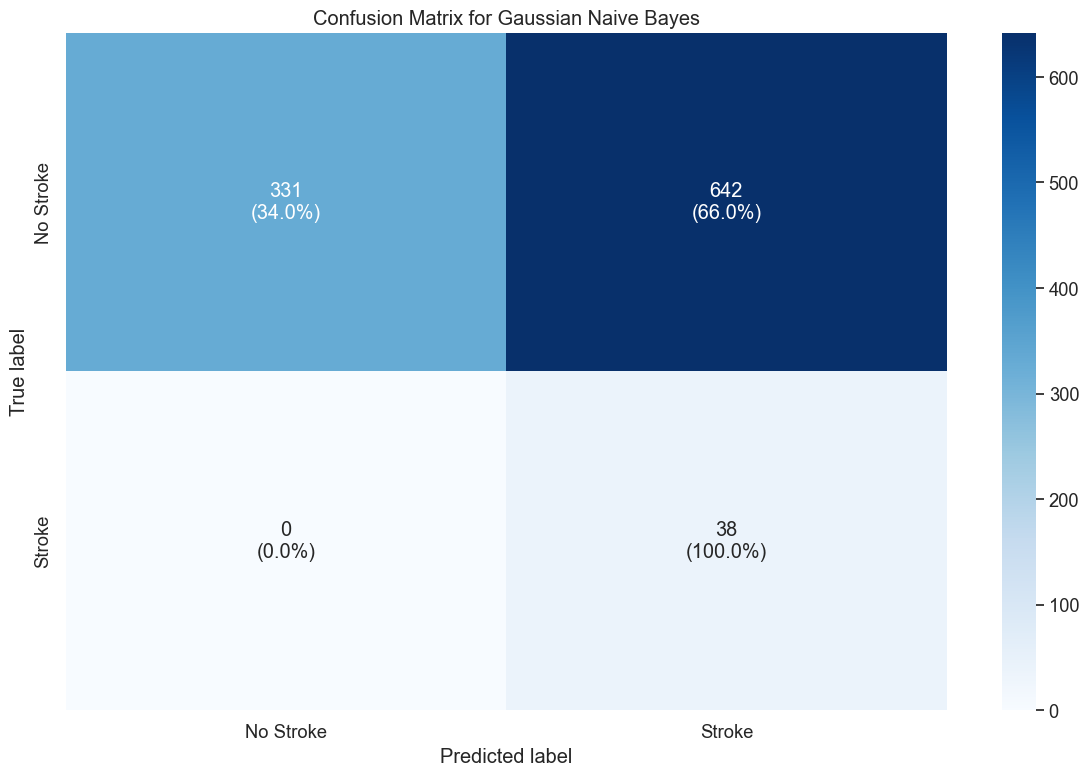

In [133]:
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

classifier = GaussianNB()
classifier.fit(X_train_final, y_train)

y_pred_test = classifier.predict(X_test_final)

print("Test set classification report:")
print(classification_report(y_test, y_pred_test))
print("Test set accuracy score:")
print(accuracy_score(y_test, y_pred_test) * 100)


# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm, dtype=object)
for i in range(len(cm)):
    for j in range(len(cm[i])):
        annotations[i, j] = f"{cm[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])


plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()





In [134]:
# use grid search to improve model performance
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Define the parameter grid for Gaussian Naive Bayes
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Adjust the range and number of values as needed
}

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)


grid_search.fit(X_train_final, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")



Best parameters: {'var_smoothing': np.float64(0.657933224657568)}
Best cross-validation score: 0.9629


Test set classification report with best parameters:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       973
           1       0.00      0.00      0.00        38

    accuracy                           0.96      1011
   macro avg       0.48      0.50      0.49      1011
weighted avg       0.93      0.96      0.94      1011

Test set accuracy score with best parameters:
96.24134520276954


C:\Users\yakas\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yakas\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yakas\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

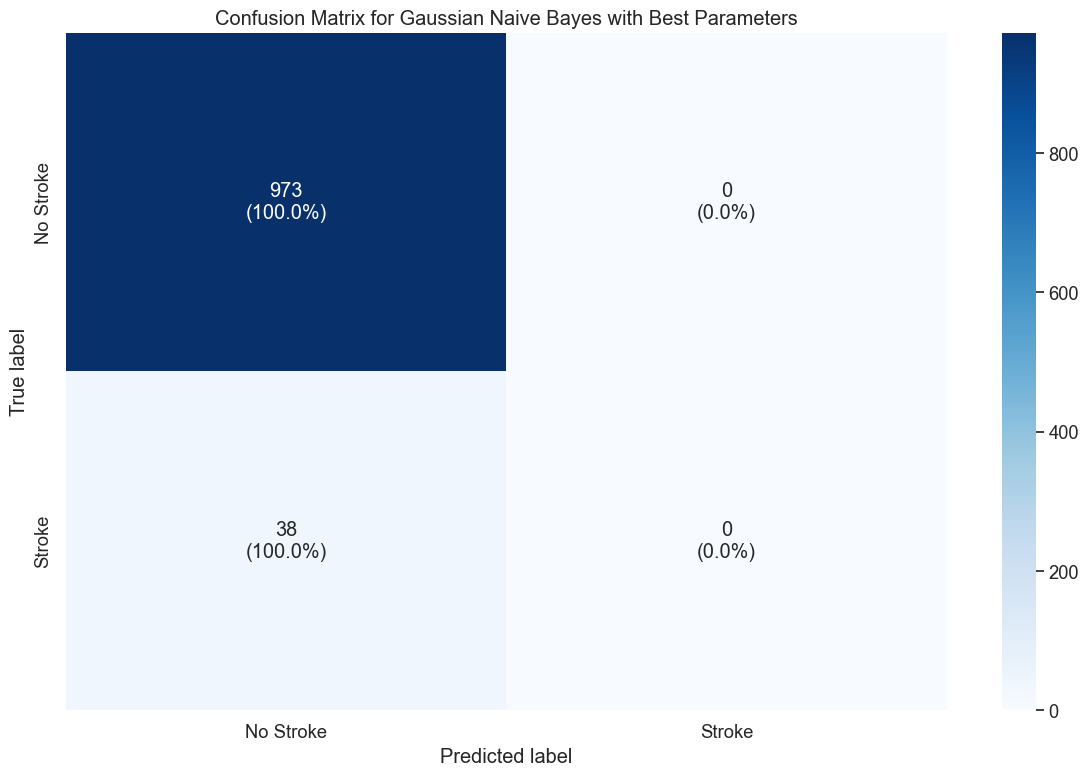

In [135]:
# Train the model with the best parameters
best_gnb = GaussianNB(var_smoothing=best_params['var_smoothing'])
best_gnb.fit(X_train_final, y_train)
# Make predictions on the test set
y_pred_test_best = best_gnb.predict(X_test_final)
# Evaluate the model

print("Test set classification report with best parameters:")
print(classification_report(y_test, y_pred_test_best))
print("Test set accuracy score with best parameters:")
print(accuracy_score(y_test, y_pred_test_best) * 100)
# Plot confusion matrix for the best model  
# Plot confusion matrix for the best model  
cm_best = confusion_matrix(y_test, y_pred_test_best)
cm_percentage = cm_best.astype('float') / cm_best.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_best, dtype=object)
for i in range(len(cm_best)):
  for j in range(len(cm_best[i])):
    annotations[i, j] = f"{cm_best[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm_best, annot=annotations, fmt="", cmap=plt.cm.Blues,
      xticklabels=['No Stroke', 'Stroke'],
      yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix for Gaussian Naive Bayes with Best Parameters')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [136]:
# use optuna search to improve model performance
import optuna
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

# Define the objective function for Optuna
def objective(trial):
    # Suggest a value for var_smoothing
    var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-1)
    
    # Create a Gaussian Naive Bayes classifier with the suggested parameter
    gnb = GaussianNB(var_smoothing=var_smoothing)
    
    # Perform cross-validation and return the mean accuracy
    scores = cross_val_score(gnb, X_train_final, y_train, cv=5, scoring='accuracy')
    return scores.mean()

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
# Get the best parameters and score
best_params_optuna = study.best_params
best_score_optuna = study.best_value
print(f"Best parameters from Optuna: {best_params_optuna}")
print(f"Best cross-validation score from Optuna: {best_score_optuna:.4f}")


[I 2025-05-01 19:56:43,362] A new study created in memory with name: no-name-172e764b-961e-4edd-a217-b39f59909908
C:\Users\yakas\AppData\Local\Temp\ipykernel_30904\1295054362.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-1)
[I 2025-05-01 19:56:43,393] Trial 0 finished with value: 0.6311784324890779 and parameters: {'var_smoothing': 2.1904495948722e-05}. Best is trial 0 with value: 0.6311784324890779.
C:\Users\yakas\AppData\Local\Temp\ipykernel_30904\1295054362.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-1)
[I 2025-05-01 

Best parameters from Optuna: {'var_smoothing': 0.09977953848147457}
Best cross-validation score from Optuna: 0.9186


Test set classification report with Optuna best parameters:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       973
           1       0.09      0.13      0.11        38

    accuracy                           0.92      1011
   macro avg       0.53      0.54      0.53      1011
weighted avg       0.93      0.92      0.93      1011

Test set accuracy score with Optuna best parameters:
91.79030662710188


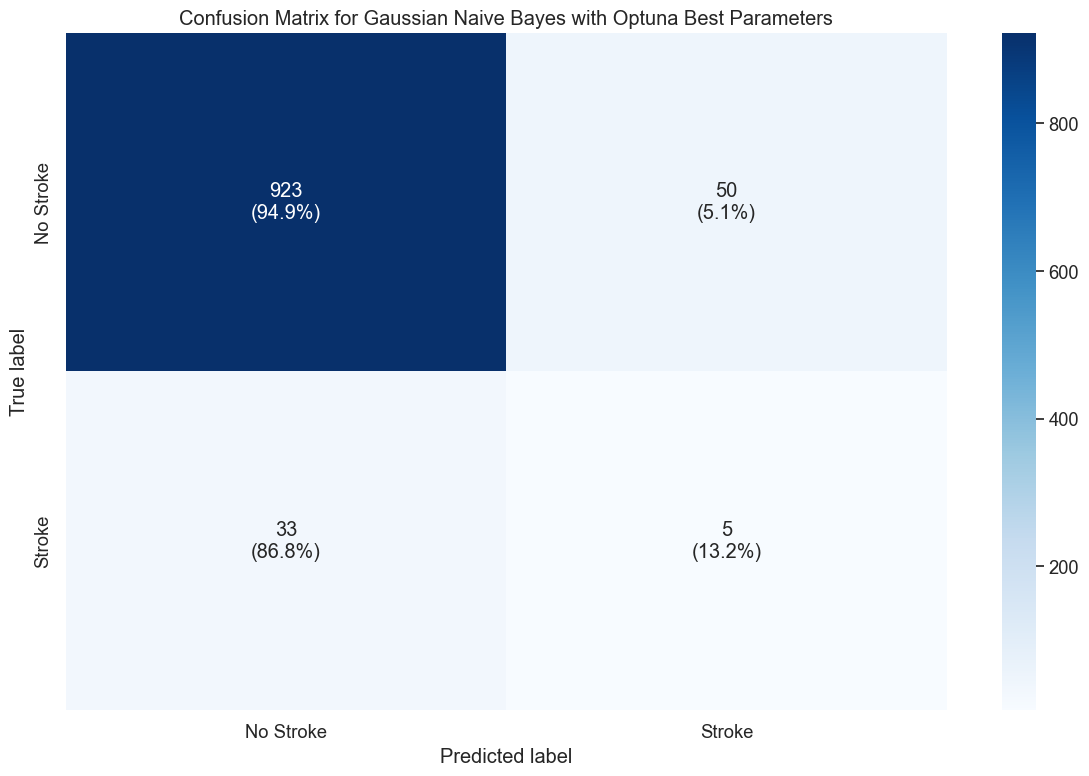

In [137]:
# Train the model with the best parameters from Optuna
best_gnb_optuna = GaussianNB(var_smoothing=best_params_optuna['var_smoothing'])
best_gnb_optuna.fit(X_train_final, y_train)
# Make predictions on the test set
y_pred_test_optuna = best_gnb_optuna.predict(X_test_final)
# Evaluate the model
print("Test set classification report with Optuna best parameters:")
print(classification_report(y_test, y_pred_test_optuna))
print("Test set accuracy score with Optuna best parameters:")
print(accuracy_score(y_test, y_pred_test_optuna) * 100)
# Plot confusion matrix for the Optuna best model
cm_optuna = confusion_matrix(y_test, y_pred_test_optuna)
cm_percentage = cm_optuna.astype('float') / cm_optuna.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_optuna, dtype=object)
for i in range(len(cm_optuna)):
  for j in range(len(cm_optuna[i])):
    annotations[i, j] = f"{cm_optuna[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm_optuna, annot=annotations, fmt="", cmap=plt.cm.Blues,
      xticklabels=['No Stroke', 'Stroke'],
      yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix for Gaussian Naive Bayes with Optuna Best Parameters')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

ROC AUC score: 0.5000


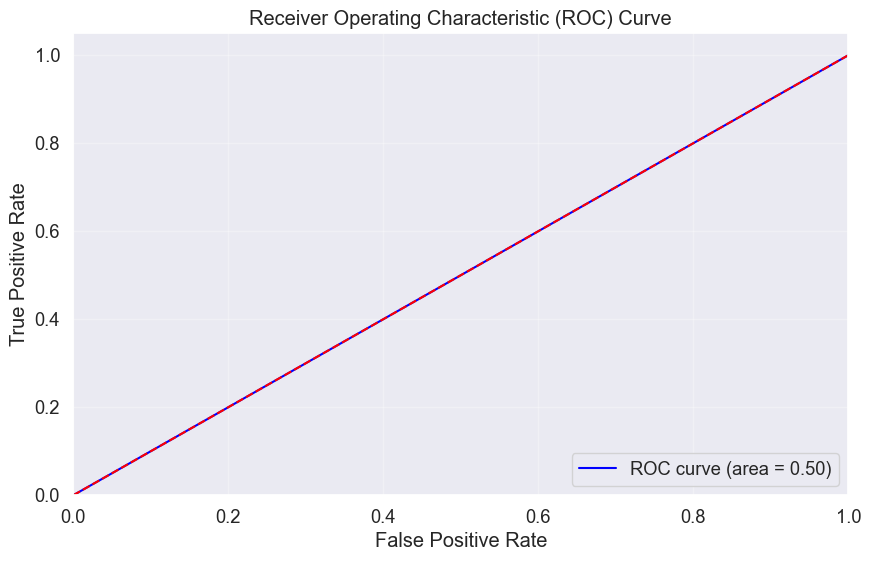

In [138]:
# use roc to improve model performance, keeping in mind that the data is imbalanced where less than 5% of the data is stroke.

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

# Calculate the ROC curve and AUC for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_best)
roc_auc = roc_auc_score(y_test, y_pred_test_best)
print(f"ROC AUC score: {roc_auc:.4f}")
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


Test set classification report with ROC AUC best parameters:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       973
           1       0.00      0.00      0.00        38

    accuracy                           0.96      1011
   macro avg       0.48      0.50      0.49      1011
weighted avg       0.93      0.96      0.94      1011

Test set accuracy score with ROC AUC best parameters:
96.24134520276954


C:\Users\yakas\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yakas\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yakas\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

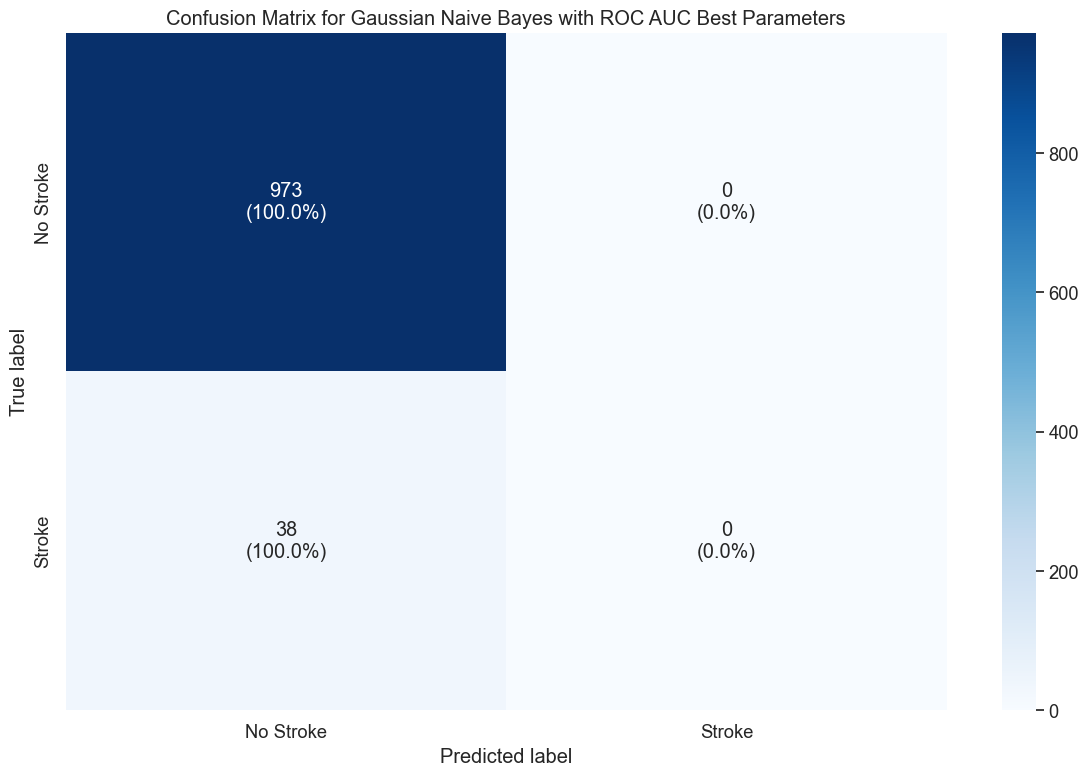

In [139]:
# train the model with the best parameters from roc auc score.

best_gnb_roc = GaussianNB(var_smoothing=best_params['var_smoothing'])
best_gnb_roc.fit(X_train_final, y_train)
# Make predictions on the test set
y_pred_test_roc = best_gnb_roc.predict(X_test_final)
# Evaluate the model
print("Test set classification report with ROC AUC best parameters:")
print(classification_report(y_test, y_pred_test_roc))
print("Test set accuracy score with ROC AUC best parameters:")
print(accuracy_score(y_test, y_pred_test_roc) * 100)
# Plot confusion matrix for the ROC AUC best model
cm_roc = confusion_matrix(y_test, y_pred_test_roc)
cm_percentage = cm_roc.astype('float') / cm_roc.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_roc, dtype=object)
for i in range(len(cm_roc)):
  for j in range(len(cm_roc[i])):
    annotations[i, j] = f"{cm_roc[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm_roc, annot=annotations, fmt="", cmap=plt.cm.Blues,
      xticklabels=['No Stroke', 'Stroke'],
      yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix for Gaussian Naive Bayes with ROC AUC Best Parameters')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Training set classification report:
              precision    recall  f1-score   support

           0       1.00      0.32      0.48      3110
           1       0.05      0.99      0.10       122

    accuracy                           0.34      3232
   macro avg       0.53      0.65      0.29      3232
weighted avg       0.96      0.34      0.46      3232

Training set accuracy score:
34.06559405940594
Validation set classification report:
              precision    recall  f1-score   support

           0       1.00      0.32      0.49       777
           1       0.05      0.97      0.10        31

    accuracy                           0.35       808
   macro avg       0.52      0.64      0.29       808
weighted avg       0.96      0.35      0.47       808

Validation set accuracy score:
34.65346534653465
Test set classification report:
              precision    recall  f1-score   support

           0       1.00      0.31      0.48       973
           1       0.05      1.00  

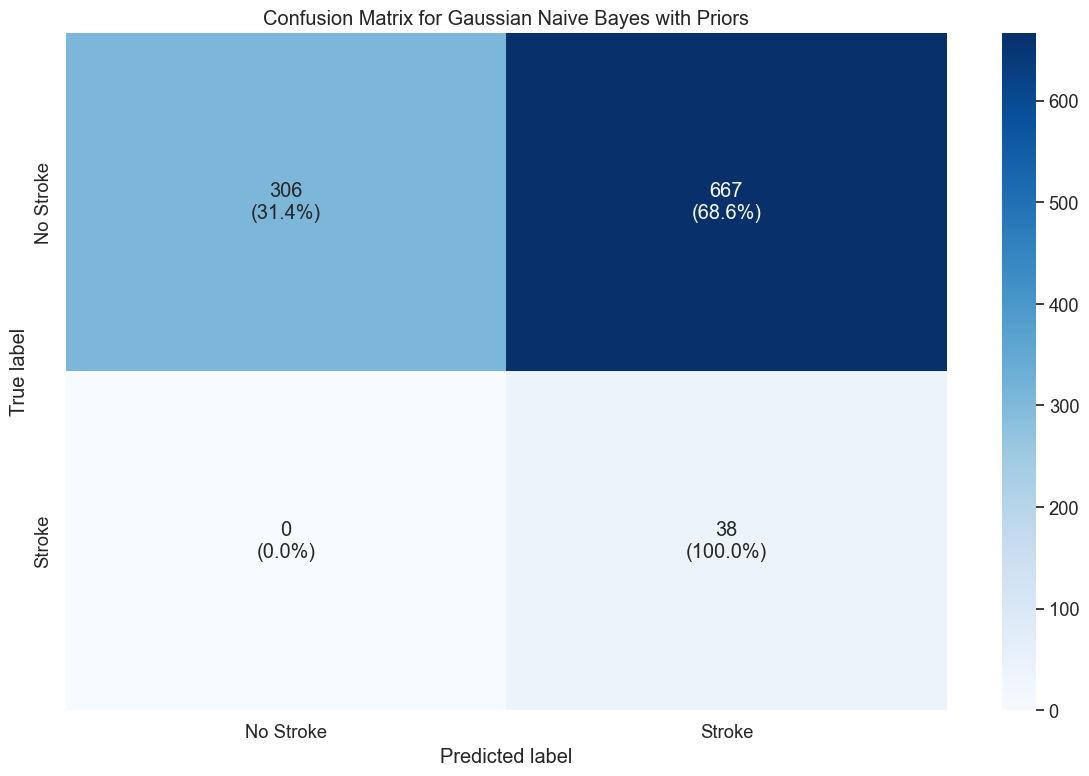

In [140]:
# attempted to use priors to improve the model performance, but it did not work as expected.
model = GaussianNB(priors=[0.9, 0.1])  # [no_stroke, stroke]

model.fit(X_train_final, y_train)
y_pred_train = model.predict(X_train_final)
y_pred_val = model.predict(X_val_final)
y_pred_test = model.predict(X_test_final)
# Evaluate the model on the training set
print("Training set classification report:")
print(classification_report(y_train, y_pred_train))
print("Training set accuracy score:")
print(accuracy_score(y_train, y_pred_train) * 100)
# Evaluate the model on the validation set
print("Validation set classification report:")
print(classification_report(y_val, y_pred_val))
print("Validation set accuracy score:")
print(accuracy_score(y_val, y_pred_val) * 100)
# Evaluate the model on the test set
print("Test set classification report:")
print(classification_report(y_test, y_pred_test))
print("Test set accuracy score:")
print(accuracy_score(y_test, y_pred_test) * 100)
# Plot confusion matrix for the model
cm = confusion_matrix(y_test, y_pred_test)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm, dtype=object)
for i in range(len(cm)):
  for j in range(len(cm[i])):
    annotations[i, j] = f"{cm[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm, annot=annotations, fmt="", cmap=plt.cm.Blues,
      xticklabels=['No Stroke', 'Stroke'],
      yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix for Gaussian Naive Bayes with Priors')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


Validation set with adjusted threshold (0.1):
              precision    recall  f1-score   support

           0       1.00      0.28      0.44       777
           1       0.05      0.97      0.10        31

    accuracy                           0.31       808
   macro avg       0.52      0.63      0.27       808
weighted avg       0.96      0.31      0.43       808

Test set with adjusted threshold (0.1):
              precision    recall  f1-score   support

           0       1.00      0.28      0.44       973
           1       0.05      1.00      0.10        38

    accuracy                           0.31      1011
   macro avg       0.53      0.64      0.27      1011
weighted avg       0.96      0.31      0.42      1011

              precision    recall  f1-score   support

           0       1.00      0.28      0.44       777
           1       0.05      0.97      0.10        31

    accuracy                           0.31       808
   macro avg       0.52      0.63      0.2

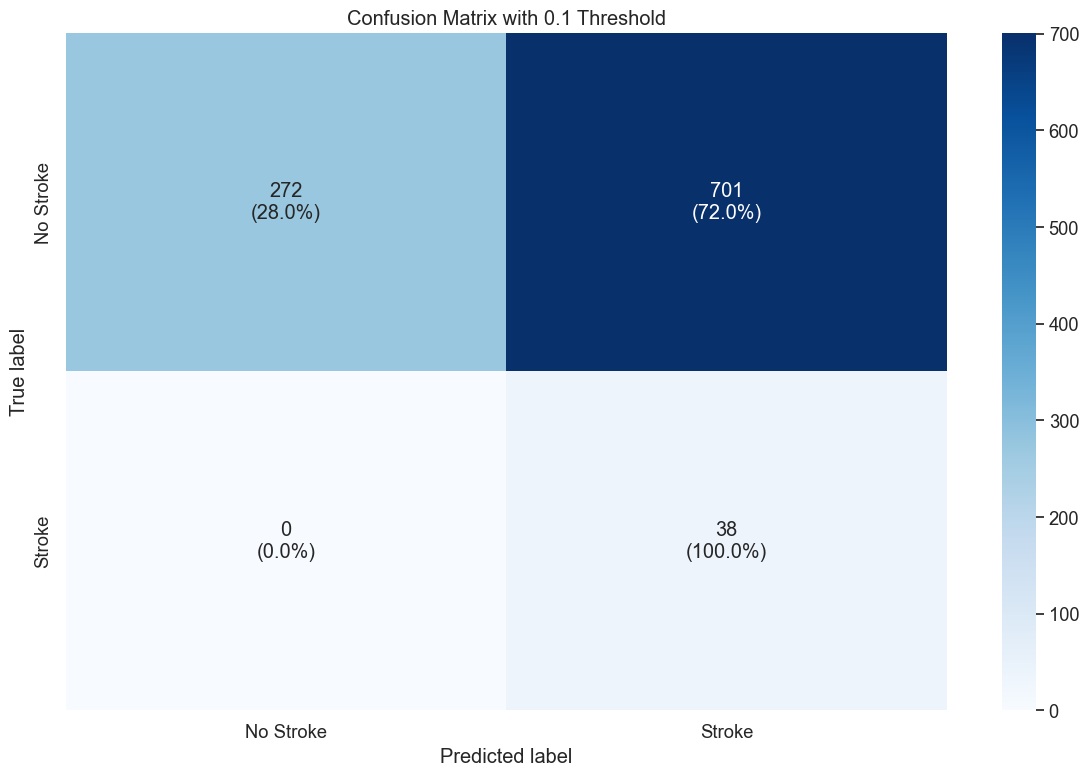

In [141]:
# attempted to Adjust the probability threshold.

# 1. Get probabilities for validation set
y_val_proba = model.predict_proba(X_val_final)

# 2. Apply lower threshold (0.1 instead of default 0.5)
y_val_pred_adjusted = (y_val_proba[:, 1] > 0.1).astype(int)

# 3. Evaluate with the adjusted threshold
print("Validation set with adjusted threshold (0.1):")
print(classification_report(y_val, y_val_pred_adjusted))

# 4. Apply the same threshold to test set
y_test_proba = model.predict_proba(X_test_final)
y_test_pred_adjusted = (y_test_proba[:, 1] > 0.1).astype(int)

# 5. Evaluate test performance with adjusted threshold
print("Test set with adjusted threshold (0.1):")
print(classification_report(y_test, y_test_pred_adjusted))

# 6. Plot confusion matrix with adjusted threshold
cm_adjusted = confusion_matrix(y_test, y_test_pred_adjusted)
cm_percentage = cm_adjusted.astype('float') / cm_adjusted.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_adjusted, dtype=object)
for i in range(len(cm_adjusted)):
  for j in range(len(cm_adjusted[i])):
    annotations[i, j] = f"{cm_adjusted[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm_adjusted, annot=annotations, fmt="", cmap=plt.cm.Blues,
      xticklabels=['No Stroke', 'Stroke'],
      yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix with 0.1 Threshold')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

SVM(Support Vector Machine)
==========================

Training set classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3110
           1       0.00      0.00      0.00       122

    accuracy                           0.96      3232
   macro avg       0.48      0.50      0.49      3232
weighted avg       0.93      0.96      0.94      3232

Training set accuracy score:
96.22524752475248
Validation set classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       777
           1       0.00      0.00      0.00        31

    accuracy                           0.96       808
   macro avg       0.48      0.50      0.49       808
weighted avg       0.92      0.96      0.94       808

Validation set accuracy score:
96.16336633663366
Test set classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       973
           1       0.00      0.00  

C:\Users\yakas\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yakas\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yakas\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

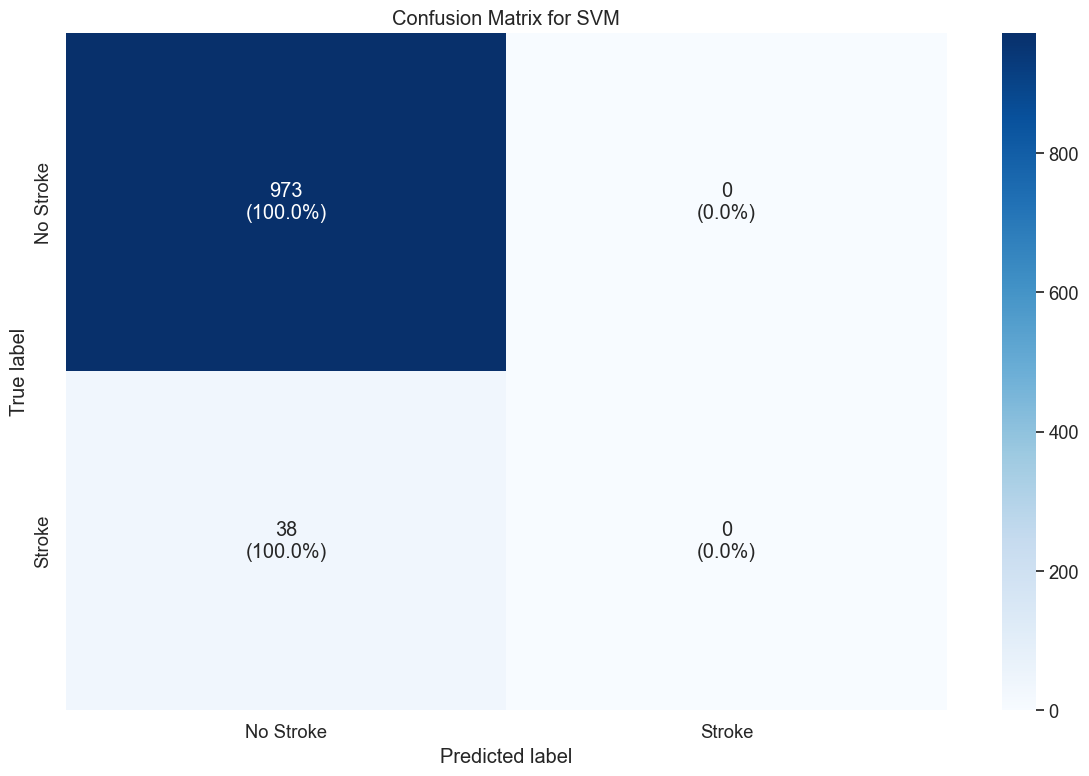

In [142]:
# SVM model bare
#apply svm to the dataset
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#make normal svc better
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train_final, y_train)
y_pred_train = svm.predict(X_train_final)
y_pred_val = svm.predict(X_val_final)
y_pred_test = svm.predict(X_test_final)
# Evaluate the model on the training set
print("Training set classification report:")
print(classification_report(y_train, y_pred_train))
print("Training set accuracy score:")
print(accuracy_score(y_train, y_pred_train) * 100)
# Evaluate the model on the validation set
print("Validation set classification report:")
print(classification_report(y_val, y_pred_val))
print("Validation set accuracy score:")
print(accuracy_score(y_val, y_pred_val) * 100)

# Evaluate the model on the test set
print("Test set classification report:")
print(classification_report(y_test, y_pred_test))
print("Test set accuracy score:")
print(accuracy_score(y_test, y_pred_test) * 100)
# Plot confusion matrix for the model
cm = confusion_matrix(y_test, y_pred_test)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm, dtype=object)
for i in range(len(cm)):
  for j in range(len(cm[i])):
    annotations[i, j] = f"{cm[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm, annot=annotations, fmt="", cmap=plt.cm.Blues,
      xticklabels=['No Stroke', 'Stroke'],
      yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


Test set classification report with balanced class weights:
              precision    recall  f1-score   support

           0       0.98      0.79      0.88       973
           1       0.11      0.66      0.19        38

    accuracy                           0.78      1011
   macro avg       0.55      0.72      0.53      1011
weighted avg       0.95      0.78      0.85      1011

Accuracy: 78.34%


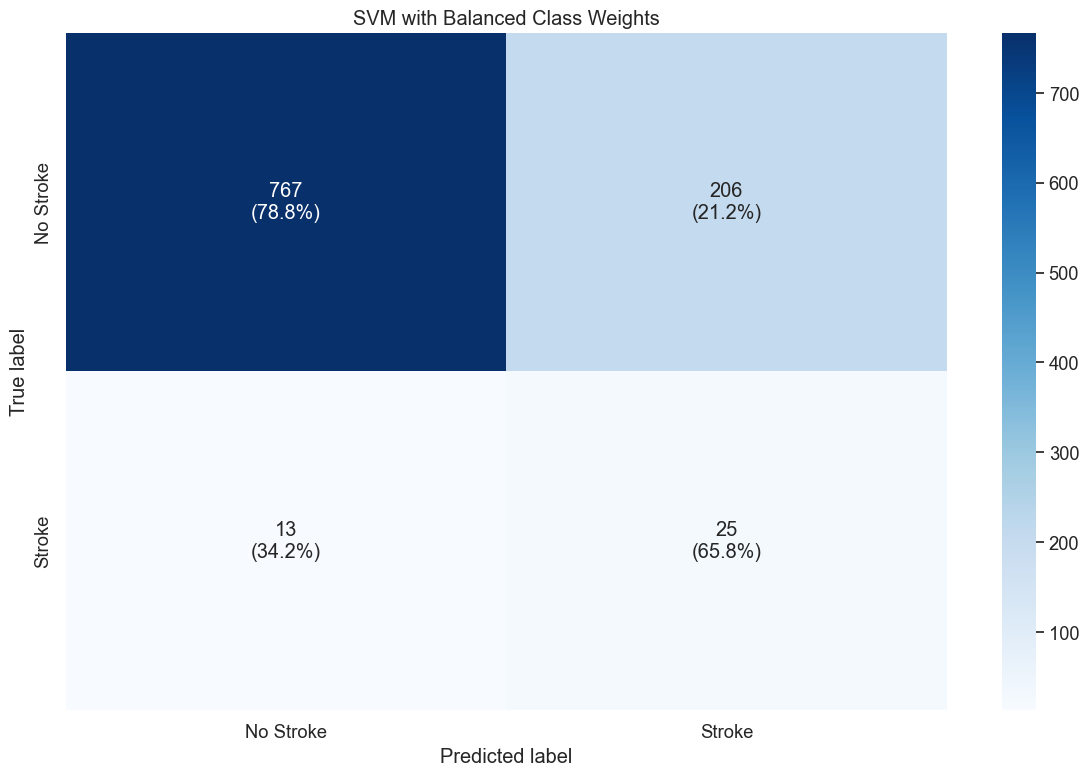

In [143]:
# Use SVC with class_weight='balanced' to handle imbalance
svc_balanced = SVC(class_weight='balanced', probability=True, random_state=42)
svc_balanced.fit(X_train_final, y_train)
y_pred_balanced = svc_balanced.predict(X_test_final)

print("Test set classification report with balanced class weights:")
print(classification_report(y_test, y_pred_balanced))
print(f"Accuracy: {accuracy_score(y_test, y_pred_balanced) * 100:.2f}%")

# Plot confusion matrix
cm_balanced = confusion_matrix(y_test, y_pred_balanced)
cm_percentage = cm_balanced.astype('float') / cm_balanced.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_balanced, dtype=object)
for i in range(len(cm_balanced)):
  for j in range(len(cm_balanced[i])):
    annotations[i, j] = f"{cm_balanced[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm_balanced, annot=annotations, fmt="", cmap=plt.cm.Blues,
      xticklabels=['No Stroke', 'Stroke'],
      yticklabels=['No Stroke', 'Stroke'])
plt.title('SVM with Balanced Class Weights')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'C': 100, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.5621

Test set classification report with best parameters:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       973
           1       0.06      0.11      0.07        38

    accuracy                           0.90      1011
   macro avg       0.51      0.52      0.51      1011
weighted avg       0.93      0.90      0.91      1011

Accuracy: 90.01%
Best parameters: {'C': 100, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.5621

Test set classification report with best parameters:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       973
           1       0.06      0.11      0.07        38

    accuracy                           0.90      1011
   macro avg  

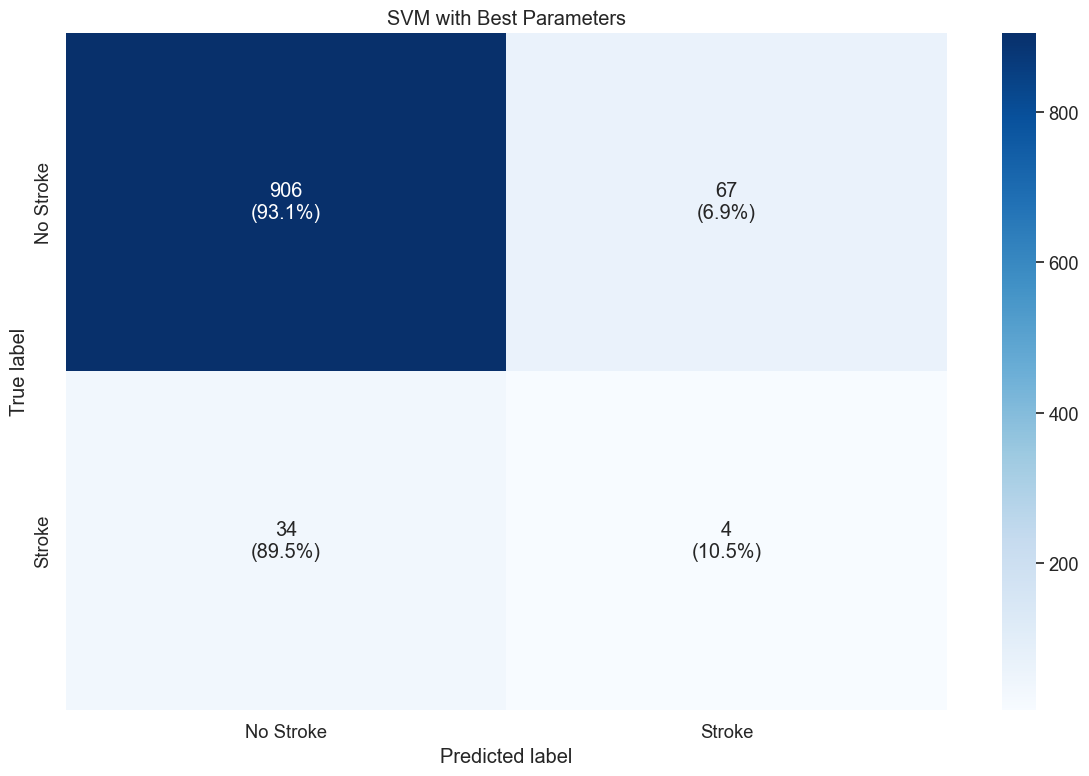

In [144]:
# Use GridSearchCV to find the best parameters for SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score

# Define parameter grid for SVC
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced']
}

# Create SVC classifier
svc = SVC(probability=True, random_state=42)

# Use f1_score as scoring metric (better for imbalanced data)
scoring = make_scorer(f1_score, average='macro')

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring=scoring,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train_final, y_train)

# Print best parameters
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate the best model
best_svc = grid_search.best_estimator_
y_pred_best = best_svc.predict(X_test_final)

print("\nTest set classification report with best parameters:")
print(classification_report(y_test, y_pred_best))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best) * 100:.2f}%")

# Plot confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
cm_percentage = cm_best.astype('float') / cm_best.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_best, dtype=object)
for i in range(len(cm_best)):
    for j in range(len(cm_best[i])):
        annotations[i, j] = f"{cm_best[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm_best, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])

plt.title('SVM with Best Parameters')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [145]:
# Get probabilities for stroke class
y_prob = best_svc.predict_proba(X_test_final)[:, 1]

# Try different thresholds
thresholds = [0.1, 0.2, 0.3, 0.4]
for threshold in thresholds:
    y_pred_thresh = (y_prob > threshold).astype(int)
    print(f"\nClassification report with threshold {threshold}:")
    print(classification_report(y_test, y_pred_thresh))


Classification report with threshold 0.1:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       973
           1       0.06      0.08      0.07        38

    accuracy                           0.91      1011
   macro avg       0.51      0.51      0.51      1011
weighted avg       0.93      0.91      0.92      1011


Classification report with threshold 0.2:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       973
           1       0.00      0.00      0.00        38

    accuracy                           0.96      1011
   macro avg       0.48      0.50      0.49      1011
weighted avg       0.93      0.96      0.94      1011


Classification report with threshold 0.3:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       973
           1       0.00      0.00      0.00        38

    accuracy                           0.96      1011

C:\Users\yakas\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yakas\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yakas\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [146]:
#use optuna to find the best parameters for SVC
import optuna
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score


# Define the objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    
    # Create SVC classifier with suggested parameters
    svc = SVC(C=C, kernel=kernel, gamma=gamma, class_weight='balanced', probability=True, random_state=42)
    
    # Perform cross-validation and return the mean accuracy
    scores = cross_val_score(svc, X_train_final, y_train, cv=5, scoring='accuracy')
    return scores.mean()


# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=28)
# Get the best parameters and score
best_params_optuna = study.best_params
best_score_optuna = study.best_value
print(f"Best parameters from Optuna: {best_params_optuna}")
print(f"Best cross-validation score from Optuna: {best_score_optuna:.4f}")

# Train the model with the best parameters from Optuna
best_svc_optuna = SVC(**best_params_optuna, class_weight='balanced', probability=True, random_state=42)
best_svc_optuna.fit(X_train_final, y_train)

# Make predictions on the test set
y_pred_test_optuna = best_svc_optuna.predict(X_test_final)

# Evaluate the model
print("Test set classification report with Optuna best parameters:")
print(classification_report(y_test, y_pred_test_optuna))
print("Test set accuracy score with Optuna best parameters:")
print(accuracy_score(y_test, y_pred_test_optuna) * 100)


[I 2025-05-01 19:57:16,306] A new study created in memory with name: no-name-5f175245-39f0-4c1e-8287-6c8195c12588
C:\Users\yakas\AppData\Local\Temp\ipykernel_30904\3334834708.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e3)
C:\Users\yakas\AppData\Local\Temp\ipykernel_30904\3334834708.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e3)
[I 2025-05-01 19:57:20,974] Trial 0 finished with value: 0.6828682990319694 and parameters: {'C': 0.04645526879921045, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 0 with value: 0.6828682990319694.
[I 2025-05-01 19:57:20,974] Trial 0 finished

Best parameters from Optuna: {'C': 615.8908098795124, 'kernel': 'rbf', 'gamma': 'scale'}
Best cross-validation score from Optuna: 0.9236
Test set classification report with Optuna best parameters:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       973
           1       0.08      0.13      0.10        38

    accuracy                           0.91      1011
   macro avg       0.52      0.54      0.53      1011
weighted avg       0.93      0.91      0.92      1011

Test set accuracy score with Optuna best parameters:
91.29574678536103
Test set classification report with Optuna best parameters:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       973
           1       0.08      0.13      0.10        38

    accuracy                           0.91      1011
   macro avg       0.52      0.54      0.53      1011
weighted avg       0.93      0.91      0.92      1011

Test set accuracy 

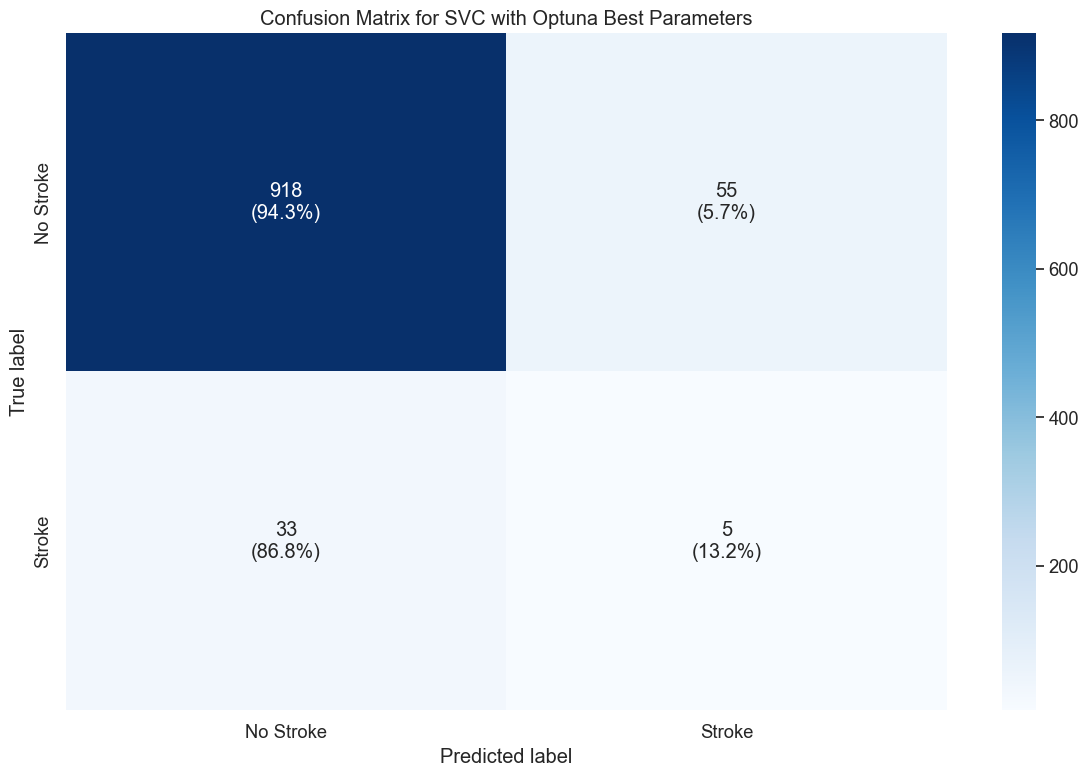

In [147]:

# Plot confusion matrix for the Optuna best model
cm_optuna = confusion_matrix(y_test, y_pred_test_optuna)
cm_percentage = cm_optuna.astype('float') / cm_optuna.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_optuna, dtype=object)
for i in range(len(cm_optuna)):
    for j in range(len(cm_optuna[i])):
        annotations[i, j] = f"{cm_optuna[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm_optuna, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix for SVC with Optuna Best Parameters')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


K-Nearest Neighbors (KNN)
=========================

In [148]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_final, y_train)

KNeighborsClassifier()

Test set classification report for KNN:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       973
           1       0.00      0.00      0.00        38

    accuracy                           0.96      1011
   macro avg       0.48      0.50      0.49      1011
weighted avg       0.93      0.96      0.94      1011

Test set accuracy score for KNN:
95.94460929772502


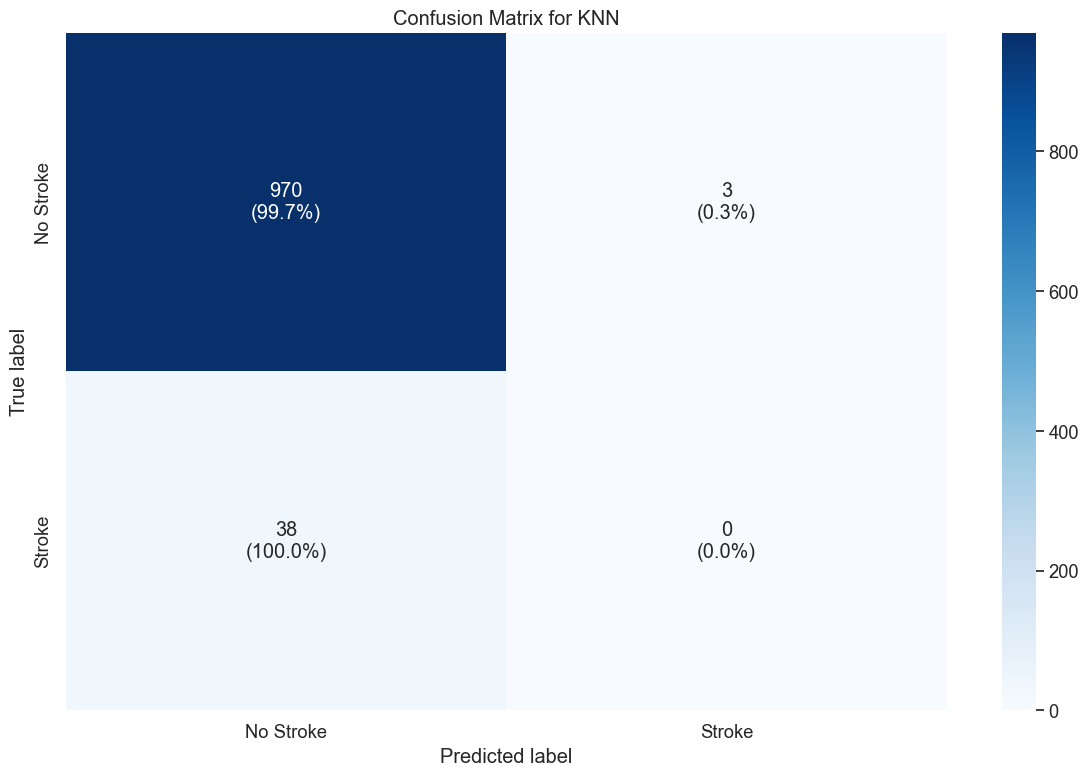

In [149]:
# Make predictions on the test set
y_pred_test_knn = classifier.predict(X_test_final)
# Evaluate the model
print("Test set classification report for KNN:")
print(classification_report(y_test, y_pred_test_knn))
print("Test set accuracy score for KNN:")
print(accuracy_score(y_test, y_pred_test_knn) * 100)
# Plot confusion matrix for KNN model
cm_knn = confusion_matrix(y_test, y_pred_test_knn)
cm_percentage = cm_knn.astype('float') / cm_knn.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_knn, dtype=object)
for i in range(len(cm_knn)):
    for j in range(len(cm_knn[i])):
        annotations[i, j] = f"{cm_knn[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm_knn, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation score: 0.5090

Test set classification report with best parameters:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       973
           1       0.14      0.03      0.04        38

    accuracy                           0.96      1011
   macro avg       0.55      0.51      0.51      1011
weighted avg       0.93      0.96      0.94      1011

Accuracy: 95.75%
Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation score: 0.5090

Test set classification report with best parameters:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       973
           1       0.14      0.03      0.04        38

    accuracy                           0.96      1011
   macro avg       0.55      0.51 

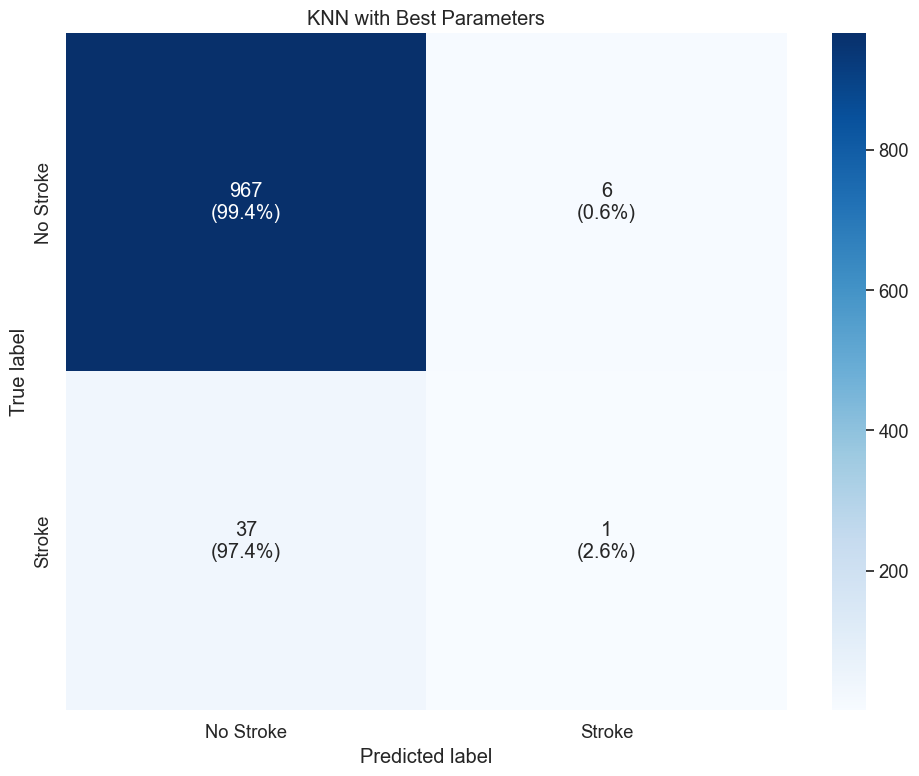

In [150]:
# Define parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Use f1_score as scoring metric (better for imbalanced data)
scoring = make_scorer(f1_score, average='macro')

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring=scoring,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train_final, y_train)

# Print best parameters
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate the best model
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_final)

print("\nTest set classification report with best parameters:")
print(classification_report(y_test, y_pred_best))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best) * 100:.2f}%")

# Plot confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
cm_percentage = cm_best.astype('float') / cm_best.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_best, dtype=object)
for i in range(len(cm_best)):
    for j in range(len(cm_best[i])):
        annotations[i, j] = f"{cm_best[i, j]}\n({cm_percentage[i, j]:.1f}%)"

plt.figure(figsize=(10, 8))
sns.heatmap(cm_best, annot=annotations, fmt="", cmap=plt.cm.Blues,
           xticklabels=['No Stroke', 'Stroke'],
           yticklabels=['No Stroke', 'Stroke'])

plt.title('KNN with Best Parameters')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


Classification report with threshold 0.1:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       973
           1       0.07      0.16      0.10        38

    accuracy                           0.89      1011
   macro avg       0.52      0.54      0.52      1011
weighted avg       0.93      0.89      0.91      1011



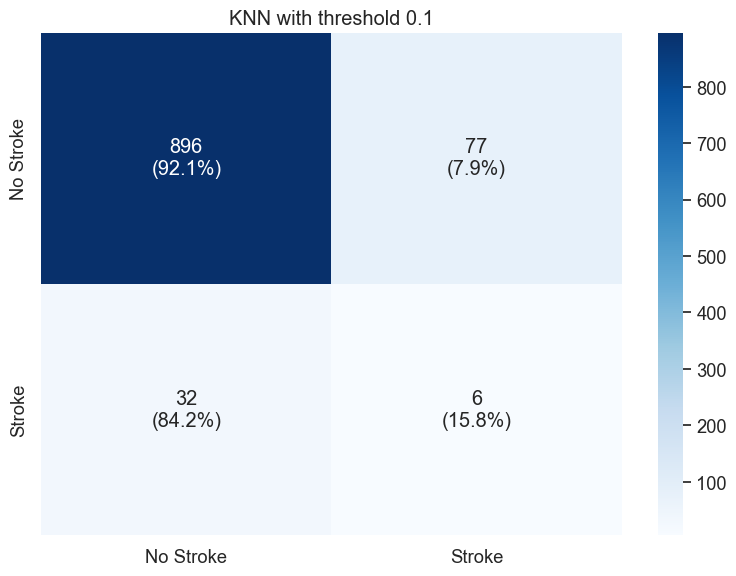


Classification report with threshold 0.2:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       973
           1       0.07      0.16      0.10        38

    accuracy                           0.89      1011
   macro avg       0.52      0.54      0.52      1011
weighted avg       0.93      0.89      0.91      1011



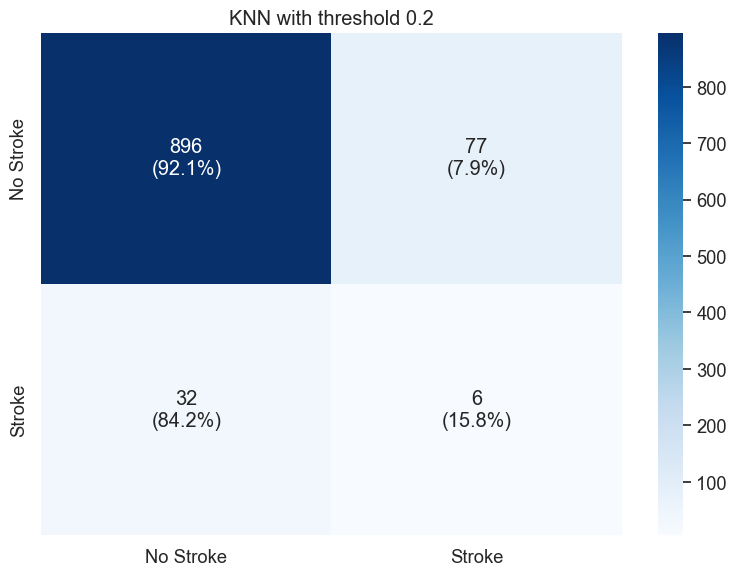


Classification report with threshold 0.3:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       973
           1       0.07      0.16      0.10        38

    accuracy                           0.89      1011
   macro avg       0.52      0.54      0.52      1011
weighted avg       0.93      0.89      0.91      1011



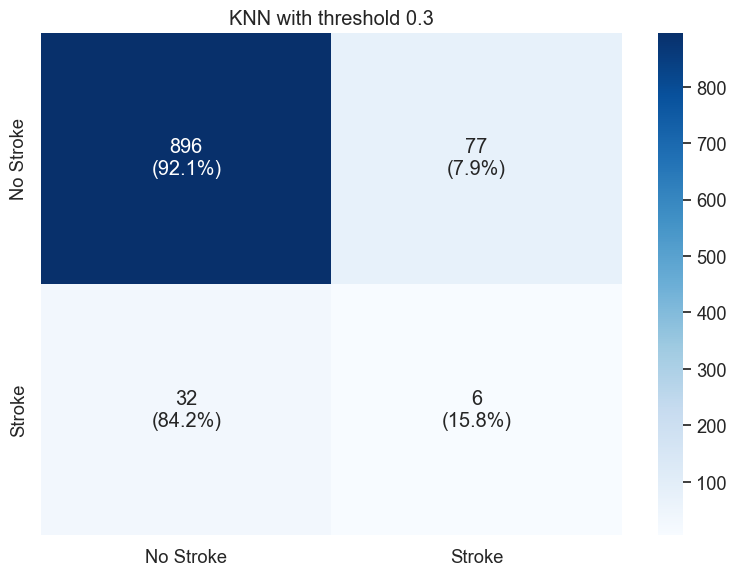


Classification report with threshold 0.4:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       973
           1       0.14      0.03      0.04        38

    accuracy                           0.96      1011
   macro avg       0.55      0.51      0.51      1011
weighted avg       0.93      0.96      0.94      1011



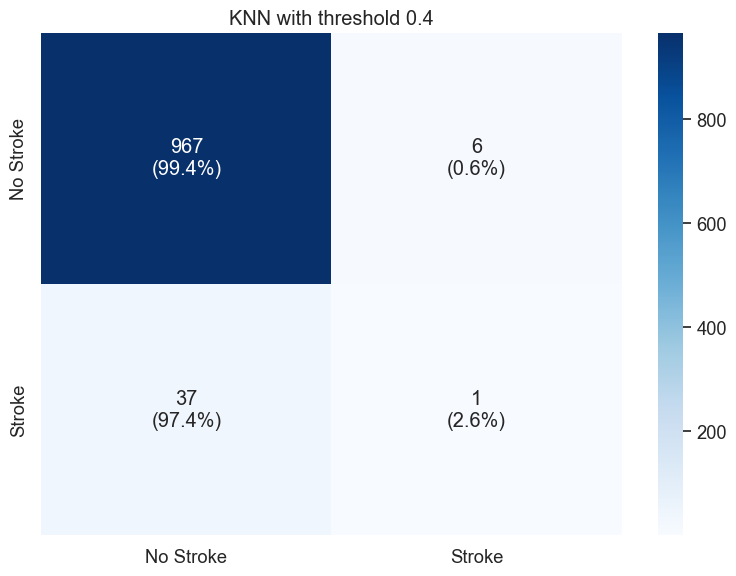

In [151]:
# Adjust probability threshold to improve recall
y_proba = best_knn.predict_proba(X_test_final)[:, 1]

# Try different thresholds to find optimal balance
thresholds = [0.1, 0.2, 0.3, 0.4]
for threshold in thresholds:
    y_pred_thresh = (y_proba > threshold).astype(int)
    print(f"\nClassification report with threshold {threshold}:")
    print(classification_report(y_test, y_pred_thresh))
    
    # Optional: Plot confusion matrix for each threshold
    cm_thresh = confusion_matrix(y_test, y_pred_thresh)
    cm_percentage = cm_thresh.astype('float') / cm_thresh.sum(axis=1)[:, np.newaxis] * 100
    annotations = np.empty_like(cm_thresh, dtype=object)
    for i in range(len(cm_thresh)):
        for j in range(len(cm_thresh[i])):
            annotations[i, j] = f"{cm_thresh[i, j]}\n({cm_percentage[i, j]:.1f}%)"

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_thresh, annot=annotations, fmt="", cmap=plt.cm.Blues,
               xticklabels=['No Stroke', 'Stroke'],
               yticklabels=['No Stroke', 'Stroke'])
    plt.title(f'KNN with threshold {threshold}')
    plt.tight_layout()
    plt.show()

In [152]:
# Grid search specifically optimized for recall
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

# Create a recall scorer specifically for the positive class (stroke)
recall_scorer = make_scorer(recall_score, pos_label=1)

# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # p=1 for manhattan, p=2 for euclidean
}

# Create GridSearchCV optimized for recall
grid_search_recall = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring=recall_scorer,  # Focus on recall
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on SMOTE-balanced data
grid_search_recall.fit(X_train_final, y_train)

print(f"Best parameters for recall: {grid_search_recall.best_params_}")
print(f"Best recall score: {grid_search_recall.best_score_:.4f}")

# Evaluate best model
best_knn_recall = grid_search_recall.best_estimator_
y_pred_best_recall = best_knn_recall.predict(X_test_final)
print(classification_report(y_test, y_pred_best_recall))

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best parameters for recall: {'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best recall score: 0.0247
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       973
           1       0.14      0.03      0.04        38

    accuracy                           0.96      1011
   macro avg       0.55      0.51      0.51      1011
weighted avg       0.93      0.96      0.94      1011

Best parameters for recall: {'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best recall score: 0.0247
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       973
           1       0.14      0.03      0.04        38

    accuracy                           0.96      1011
   macro avg       0.55      0.51      0.51      1011
weighted avg       0.93      0.96      0.94      1011



In [153]:
# Create a custom weighted F1 scorer that prioritizes stroke cases
from sklearn.metrics import fbeta_score, make_scorer

# Create weighted F1 scorer (beta=2 puts more emphasis on recall than precision)
# The average='binary' and pos_label=1 ensures we focus on the stroke class
def stroke_weighted_f1(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, pos_label=1, average='binary')

weighted_stroke_scorer = make_scorer(stroke_weighted_f1)

# Grid search with custom scorer
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid={
        'n_neighbors': [3, 5, 7, 9, 13, 17],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    scoring=weighted_stroke_scorer,  # Custom scorer
    cv=5,
    n_jobs=-1
)

# Fit on the SMOTE-balanced data
grid_search.fit(X_train_final, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_final)
print("\nTest set classification report with weighted F1 optimization:")
print(classification_report(y_test, y_pred_best))

Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

Test set classification report with weighted F1 optimization:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       973
           1       0.14      0.03      0.04        38

    accuracy                           0.96      1011
   macro avg       0.55      0.51      0.51      1011
weighted avg       0.93      0.96      0.94      1011



Test set classification report for KNN:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       973
           1       0.00      0.00      0.00        38

    accuracy                           0.96      1011
   macro avg       0.48      0.50      0.49      1011
weighted avg       0.93      0.96      0.94      1011

Test set accuracy score for KNN:
95.94460929772502


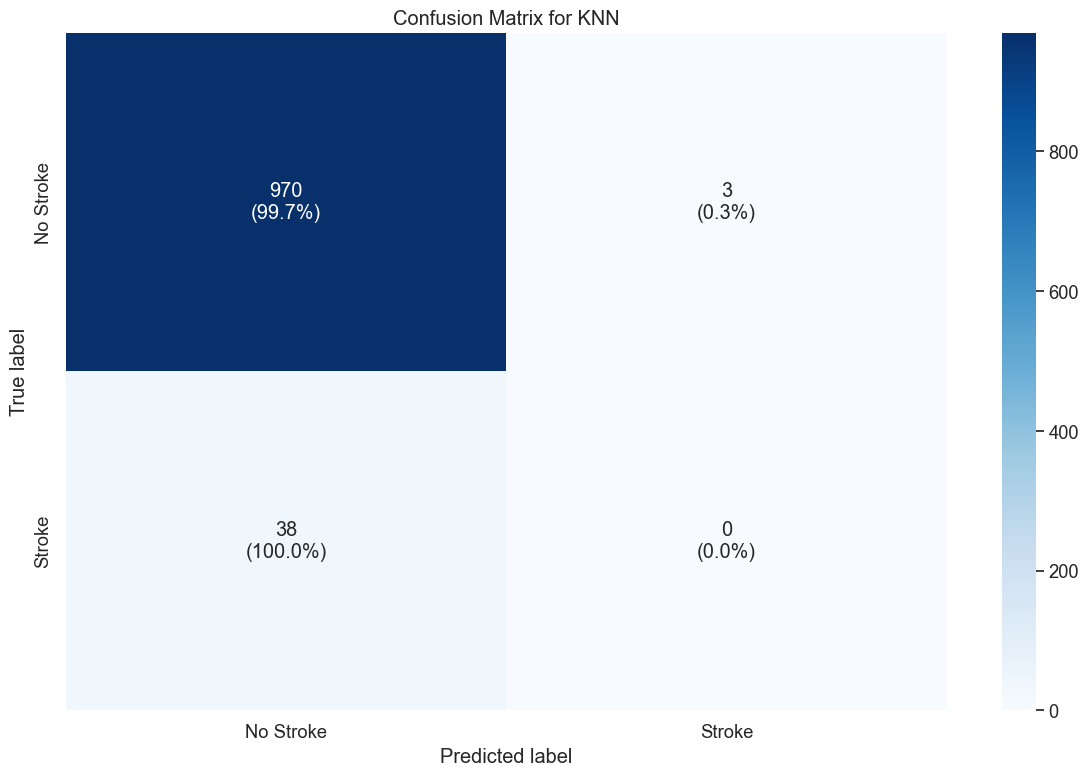

In [154]:
# Make predictions on the test set
y_pred_test_knn = classifier.predict(X_test_final)
# Evaluate the model
print("Test set classification report for KNN:")
print(classification_report(y_test, y_pred_test_knn))
print("Test set accuracy score for KNN:")
print(accuracy_score(y_test, y_pred_test_knn) * 100)
# Plot confusion matrix for KNN model
cm_knn = confusion_matrix(y_test, y_pred_test_knn)
cm_percentage = cm_knn.astype('float') / cm_knn.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_knn, dtype=object)
for i in range(len(cm_knn)):
    for j in range(len(cm_knn[i])):
        annotations[i, j] = f"{cm_knn[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm_knn, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


[I 2025-05-01 20:02:11,854] A new study created in memory with name: no-name-547dd6d0-60c3-4b6e-99fc-39e6c6bd74ee
[I 2025-05-01 20:02:12,103] Trial 0 finished with value: 0.4903816562384251 and parameters: {'n_neighbors': 17, 'weights': 'uniform', 'metric': 'manhattan', 'p': 1}. Best is trial 0 with value: 0.4903816562384251.
[I 2025-05-01 20:02:12,103] Trial 0 finished with value: 0.4903816562384251 and parameters: {'n_neighbors': 17, 'weights': 'uniform', 'metric': 'manhattan', 'p': 1}. Best is trial 0 with value: 0.4903816562384251.
[I 2025-05-01 20:02:12,316] Trial 1 finished with value: 0.4903816562384251 and parameters: {'n_neighbors': 19, 'weights': 'uniform', 'metric': 'euclidean', 'p': 1}. Best is trial 0 with value: 0.4903816562384251.
[I 2025-05-01 20:02:12,316] Trial 1 finished with value: 0.4903816562384251 and parameters: {'n_neighbors': 19, 'weights': 'uniform', 'metric': 'euclidean', 'p': 1}. Best is trial 0 with value: 0.4903816562384251.
[I 2025-05-01 20:02:12,479] Tr

Best parameters from Optuna: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean', 'p': 1}
Best cross-validation score from Optuna: 0.5299
Test set classification report with Optuna best parameters:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       973
           1       0.09      0.08      0.08        38

    accuracy                           0.93      1011
   macro avg       0.53      0.52      0.52      1011
weighted avg       0.93      0.93      0.93      1011

Test set accuracy score with Optuna best parameters:
93.47181008902076


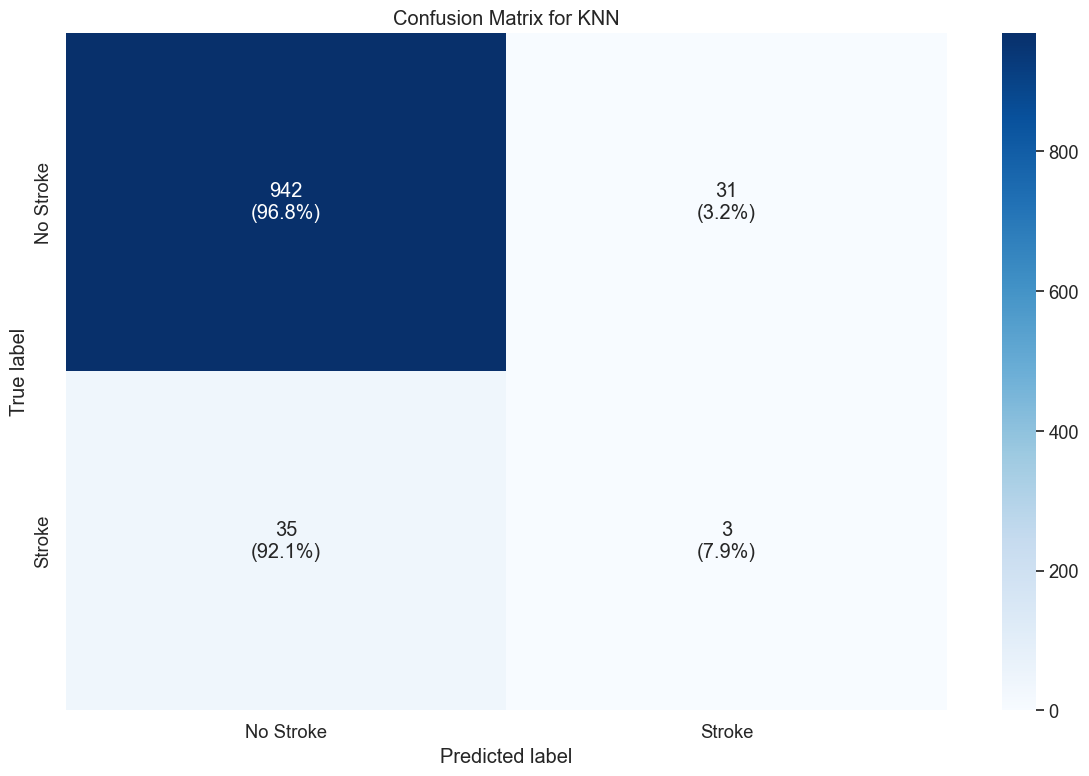

In [155]:
#Using Optuna to find the best parameters for KNN
import optuna
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, make_scorer


from sklearn.model_selection import cross_val_score

# Define the objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])

    p = trial.suggest_int('p', 1, 2)  # 1 for manhattan, 2 for euclidean
    # Create KNeighborsClassifier with suggested parameters
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric, p=p)

    # Perform cross-validation and return the mean accuracy
    # scores = cross_val_score(knn, X_train_final, y_train, cv=5, scoring='accuracy')
    # return scores.mean()
    scores = cross_val_score(knn, X_train_final, y_train, cv=5, scoring='f1_macro')
    return scores.mean()

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
# Get the best parameters and score
best_params_optuna = study.best_params
best_score_optuna = study.best_value
print(f"Best parameters from Optuna: {best_params_optuna}")
print(f"Best cross-validation score from Optuna: {best_score_optuna:.4f}")

# Train the model with the best parameters from Optuna
best_knn_optuna = KNeighborsClassifier(**best_params_optuna)
best_knn_optuna.fit(X_train_final, y_train)
# Make predictions on the test set
y_pred_test_optuna = best_knn_optuna.predict(X_test_final)
# Evaluate the model
print("Test set classification report with Optuna best parameters:")
print(classification_report(y_test, y_pred_test_optuna))
print("Test set accuracy score with Optuna best parameters:")

print(accuracy_score(y_test, y_pred_test_optuna) * 100)
# Plot confusion matrix for the Optuna best model
cm_optuna = confusion_matrix(y_test, y_pred_test_optuna)
cm_percentage = cm_optuna.astype('float') / cm_optuna.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_optuna, dtype=object)
for i in range(len(cm_optuna)):
    for j in range(len(cm_optuna[i])):
        annotations[i, j] = f"{cm_optuna[i, j]}\n({cm_percentage[i, j]:.1f}%)"



sns.heatmap(cm_knn, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


XGBoost
 ==============

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Test set classification report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       973
           1       0.08      0.03      0.04        38

    accuracy                           0.95      1011
   macro avg       0.52      0.51      0.51      1011
weighted avg       0.93      0.95      0.94      1011

Test set accuracy score for XGBoost:
95.25222551928783



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\yakas\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [20:02:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


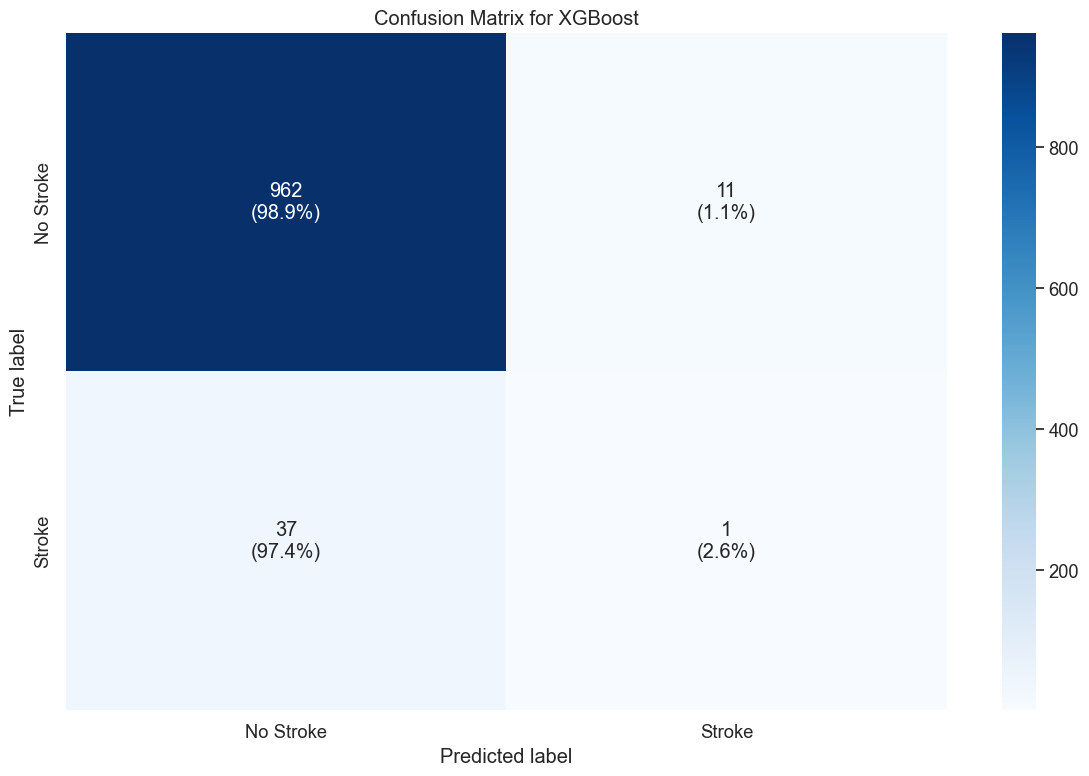

In [156]:
#Using XGBoost
%pip install xgboost
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Create an XGBoost classifier

xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# Fit the model on the training data
xgb_classifier.fit(X_train_final, y_train)
# Make predictions on the test set
y_pred_test_xgb = xgb_classifier.predict(X_test_final)
# Evaluate the model
print("Test set classification report for XGBoost:")
print(classification_report(y_test, y_pred_test_xgb))
print("Test set accuracy score for XGBoost:")
print(accuracy_score(y_test, y_pred_test_xgb) * 100)
# Plot confusion matrix for XGBoost model
cm_xgb = confusion_matrix(y_test, y_pred_test_xgb)
cm_percentage = cm_xgb.astype('float') / cm_xgb.sum(axis=1)[:, np.newaxis] * 100

annotations = np.empty_like(cm_xgb, dtype=object)
for i in range(len(cm_xgb)):
    for j in range(len(cm_xgb[i])):
        annotations[i, j] = f"{cm_xgb[i, j]}\n({cm_percentage[i, j]:.1f}%)"
sns.heatmap(cm_xgb, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()


 Decision Trees
 =============

Test set classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       973
           1       0.03      0.03      0.03        38

    accuracy                           0.93      1011
   macro avg       0.50      0.50      0.50      1011
weighted avg       0.93      0.93      0.93      1011

Test set accuracy score for Decision Tree:
92.97725024727993


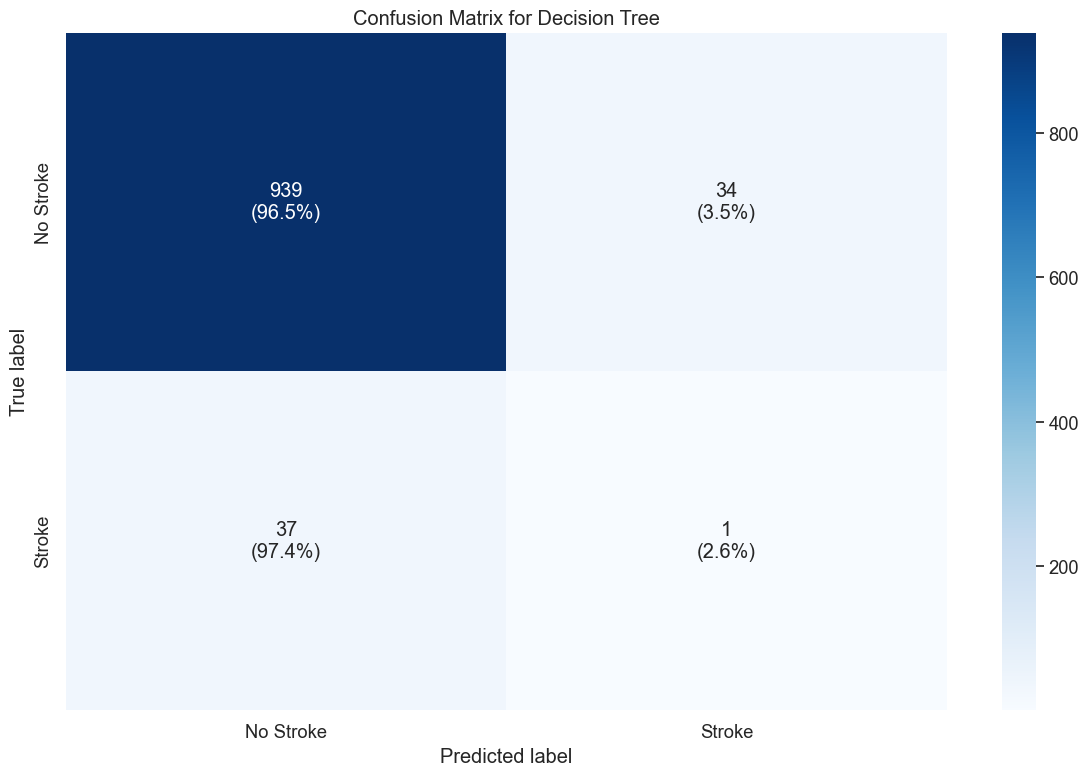

In [157]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
# Fit the model on the training data
dt_classifier.fit(X_train_final, y_train)
# Make predictions on the test set
y_pred_test_dt = dt_classifier.predict(X_test_final)
# Evaluate the model
print("Test set classification report for Decision Tree:")
print(classification_report(y_test, y_pred_test_dt))

print("Test set accuracy score for Decision Tree:")
print(accuracy_score(y_test, y_pred_test_dt) * 100)
# Plot confusion matrix for Decision Tree model
cm_dt = confusion_matrix(y_test, y_pred_test_dt)

cm_percentage = cm_dt.astype('float') / cm_dt.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_dt, dtype=object)
for i in range(len(cm_dt)):
    for j in range(len(cm_dt[i])):
        annotations[i, j] = f"{cm_dt[i, j]}\n({cm_percentage[i, j]:.1f}%)"
sns.heatmap(cm_dt, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.5727

Test set classification report with best parameters:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       973
           1       0.11      0.26      0.15        38

    accuracy                           0.89      1011
   macro avg       0.54      0.59      0.55      1011
weighted avg       0.94      0.89      0.91      1011

Accuracy: 88.92%
Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.5727

Test set classification report with best parameters:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       973
           1       0.11      0.2

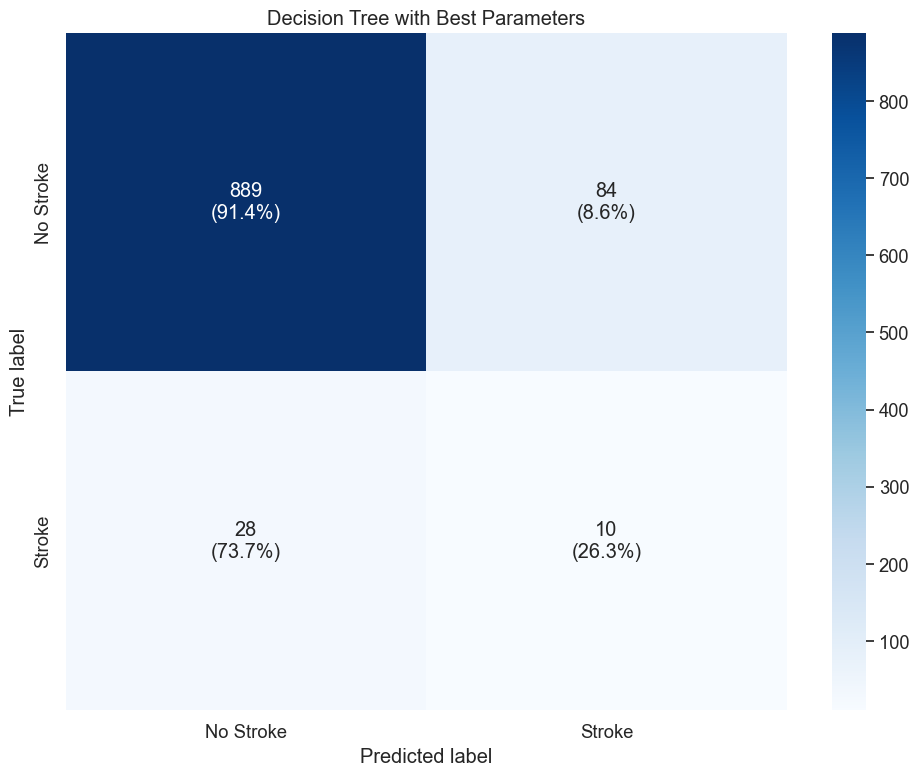

In [158]:
#using grid search to find the best parameters for Decision Tree




from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer, f1_score, recall_score

# Define parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

# Create Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
# Use f1_score as scoring metric (better for imbalanced data)
scoring = make_scorer(f1_score, average='macro')
# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring=scoring,
    cv=5,
    n_jobs=-1,
    verbose=1
)
# Fit the grid search
grid_search.fit(X_train_final, y_train)
# Print best parameters
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
# Evaluate the best model
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test_final)
print("\nTest set classification report with best parameters:")
print(classification_report(y_test, y_pred_best))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best) * 100:.2f}%")
# Plot confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
cm_percentage = cm_best.astype('float') / cm_best.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_best, dtype=object)
for i in range(len(cm_best)):
    for j in range(len(cm_best[i])):
        annotations[i, j] = f"{cm_best[i, j]}\n({cm_percentage[i, j]:.1f}%)"
plt.figure(figsize=(10, 8))
sns.heatmap(cm_best, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Decision Tree with Best Parameters')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

[I 2025-05-01 20:02:35,058] A new study created in memory with name: no-name-95f51c32-cbde-42b0-b15a-191300398583
[I 2025-05-01 20:02:35,108] Trial 0 finished with value: 0.4903816562384251 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 4, 'min_samples_leaf': 2, 'class_weight': None}. Best is trial 0 with value: 0.4903816562384251.
[I 2025-05-01 20:02:35,108] Trial 0 finished with value: 0.4903816562384251 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 4, 'min_samples_leaf': 2, 'class_weight': None}. Best is trial 0 with value: 0.4903816562384251.
[I 2025-05-01 20:02:35,168] Trial 1 finished with value: 0.4967783893516528 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 2, 'class_weight': None}. Best is trial 1 with value: 0.4967783893516528.
[I 2025-05-01 20:02:35,168] Trial 1 finished with value: 0.4967783893516528 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_s

Best parameters from Optuna: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 4, 'class_weight': 'balanced'}
Best cross-validation score from Optuna: 0.5749
Test set classification report with Optuna best parameters:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       973
           1       0.11      0.29      0.16        38

    accuracy                           0.88      1011
   macro avg       0.54      0.60      0.55      1011
weighted avg       0.94      0.88      0.91      1011

Test set accuracy score with Optuna best parameters:
88.32838773491592


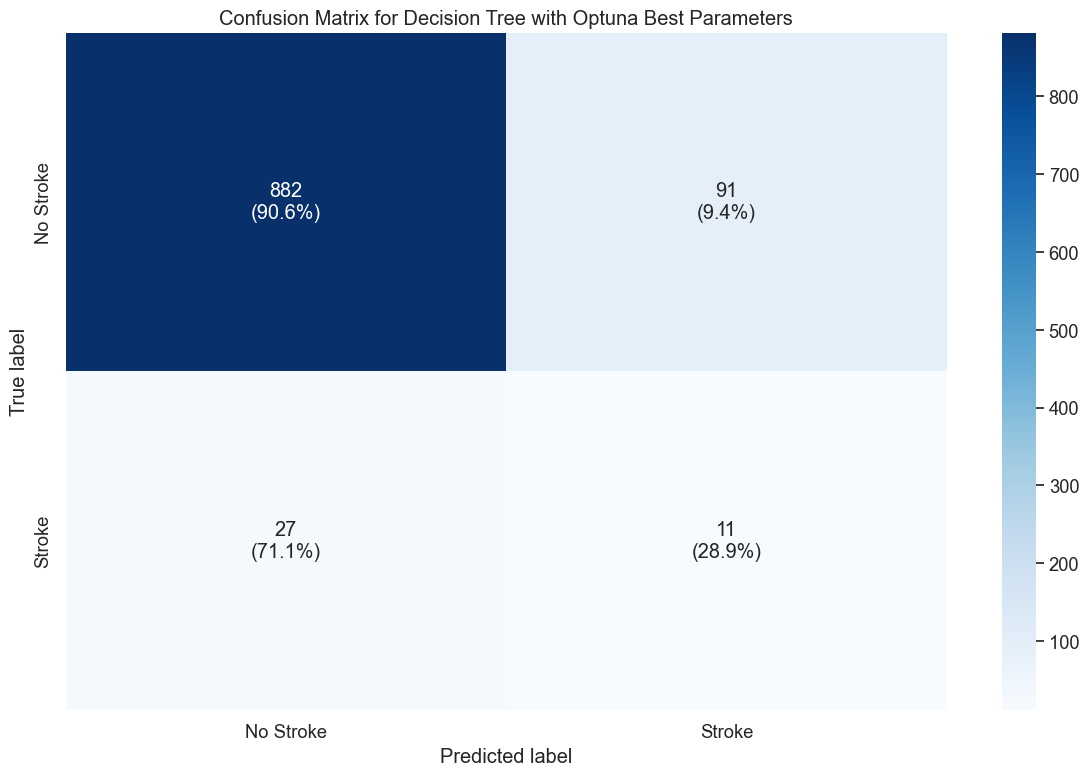

In [159]:
#using Optuna to find the best parameters for Decision Tree
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, recall_score
from sklearn.metrics import make_scorer, fbeta_score

# Define the objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
    
    # Create Decision Tree classifier with suggested parameters
    dt = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf,
                                 class_weight=class_weight, random_state=42)
    
    # Perform cross-validation and return the mean accuracy
    scores = cross_val_score(dt, X_train_final, y_train, cv=5, scoring='f1_macro')
    return scores.mean()
# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
# Get the best parameters and score
best_params_optuna = study.best_params
best_score_optuna = study.best_value
print(f"Best parameters from Optuna: {best_params_optuna}")
print(f"Best cross-validation score from Optuna: {best_score_optuna:.4f}")
# Train the model with the best parameters from Optuna
best_dt_optuna = DecisionTreeClassifier(**best_params_optuna, random_state=42)
best_dt_optuna.fit(X_train_final, y_train)
# Make predictions on the test set
y_pred_test_optuna = best_dt_optuna.predict(X_test_final)
# Evaluate the model
print("Test set classification report with Optuna best parameters:")
print(classification_report(y_test, y_pred_test_optuna))
print("Test set accuracy score with Optuna best parameters:")
print(accuracy_score(y_test, y_pred_test_optuna) * 100)
# Plot confusion matrix for the Optuna best model
cm_optuna = confusion_matrix(y_test, y_pred_test_optuna)
cm_percentage = cm_optuna.astype('float') / cm_optuna.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_optuna, dtype=object)
for i in range(len(cm_optuna)):
    for j in range(len(cm_optuna[i])):
        annotations[i, j] = f"{cm_optuna[i, j]}\n({cm_percentage[i, j]:.1f}%)"
sns.heatmap(cm_optuna, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for Decision Tree with Optuna Best Parameters')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()




Random Forest
============

Test set classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       973
           1       0.00      0.00      0.00        38

    accuracy                           0.96      1011
   macro avg       0.48      0.50      0.49      1011
weighted avg       0.93      0.96      0.94      1011

Test set accuracy score for Random Forest:
96.24134520276954


C:\Users\yakas\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yakas\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yakas\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

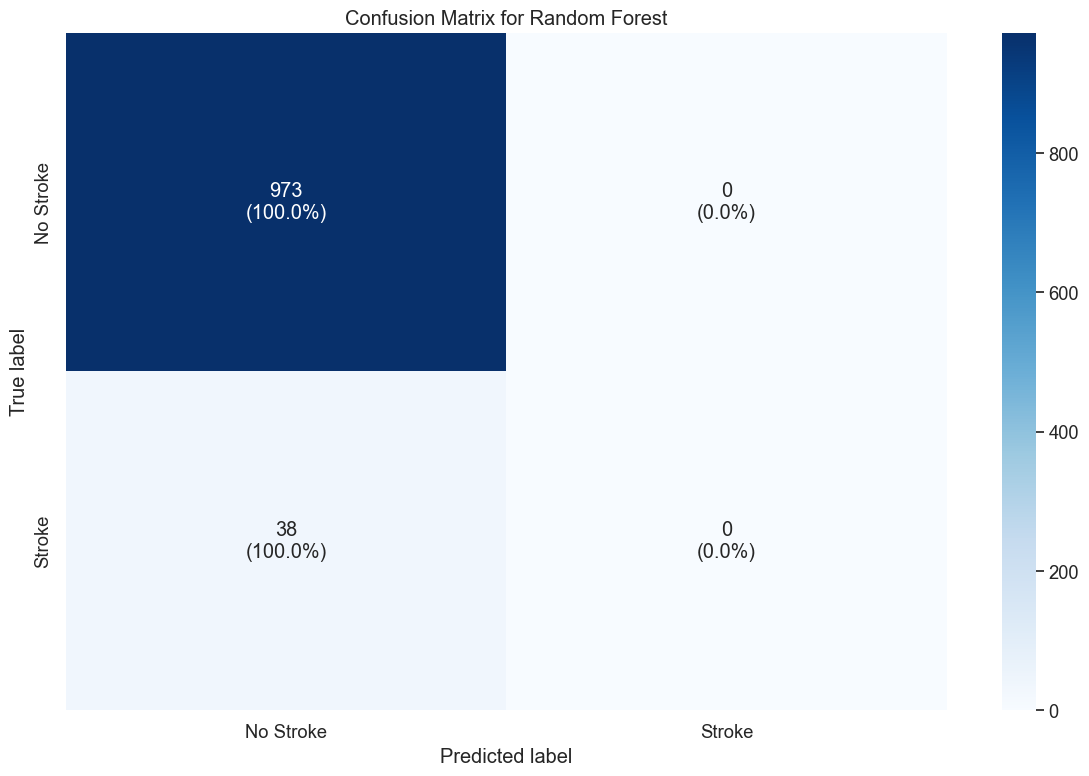

In [160]:
#using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
# Fit the model on the training data
rf_classifier.fit(X_train_final, y_train)
# Make predictions on the test set
y_pred_test_rf = rf_classifier.predict(X_test_final)
# Evaluate the model
print("Test set classification report for Random Forest:")
print(classification_report(y_test, y_pred_test_rf))
print("Test set accuracy score for Random Forest:")
print(accuracy_score(y_test, y_pred_test_rf) * 100)
# Plot confusion matrix for Random Forest model
cm_rf = confusion_matrix(y_test, y_pred_test_rf)
cm_percentage = cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_rf, dtype=object)
for i in range(len(cm_rf)):
    for j in range(len(cm_rf[i])):
        annotations[i, j] = f"{cm_rf[i, j]}\n({cm_percentage[i, j]:.1f}%)"
sns.heatmap(cm_rf, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Transition to Non-Scaled Clustering
===================================

In [161]:
X_train_final = X_train
X_val_final = X_val
X_test_final = X_test


Clustering Analysis 
===================

In [162]:
# Apply enhanced Hierarchical Clustering with better visualizations
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np


# Combine train and test data for clustering visualization
X_combined = pd.concat([X_train_final, X_test_final,X_val_final], axis=0).reset_index(drop=True)
y_combined = pd.concat([y_train, y_test,y_val], axis=0).reset_index(drop=True)


# Create a balanced sample for visualization (dendrograms with all data would be too cluttered)
# Take all stroke cases and an equal number of non-stroke cases
stroke_indices = np.where(y_combined == 1)[0]
non_stroke_indices = np.where(y_combined == 0)[0]
np.random.seed(42)
random_non_stroke = np.random.choice(non_stroke_indices, len(stroke_indices), replace=False)
sample_indices = np.concatenate([stroke_indices, random_non_stroke])
X_sample = X_combined.iloc[sample_indices]
y_sample = y_combined.iloc[sample_indices]

print(f"Sample size for dendrogram: {len(X_sample)} patients ({len(stroke_indices)} stroke, {len(stroke_indices)} non-stroke)")


Sample size for dendrogram: 382 patients (191 stroke, 191 non-stroke)


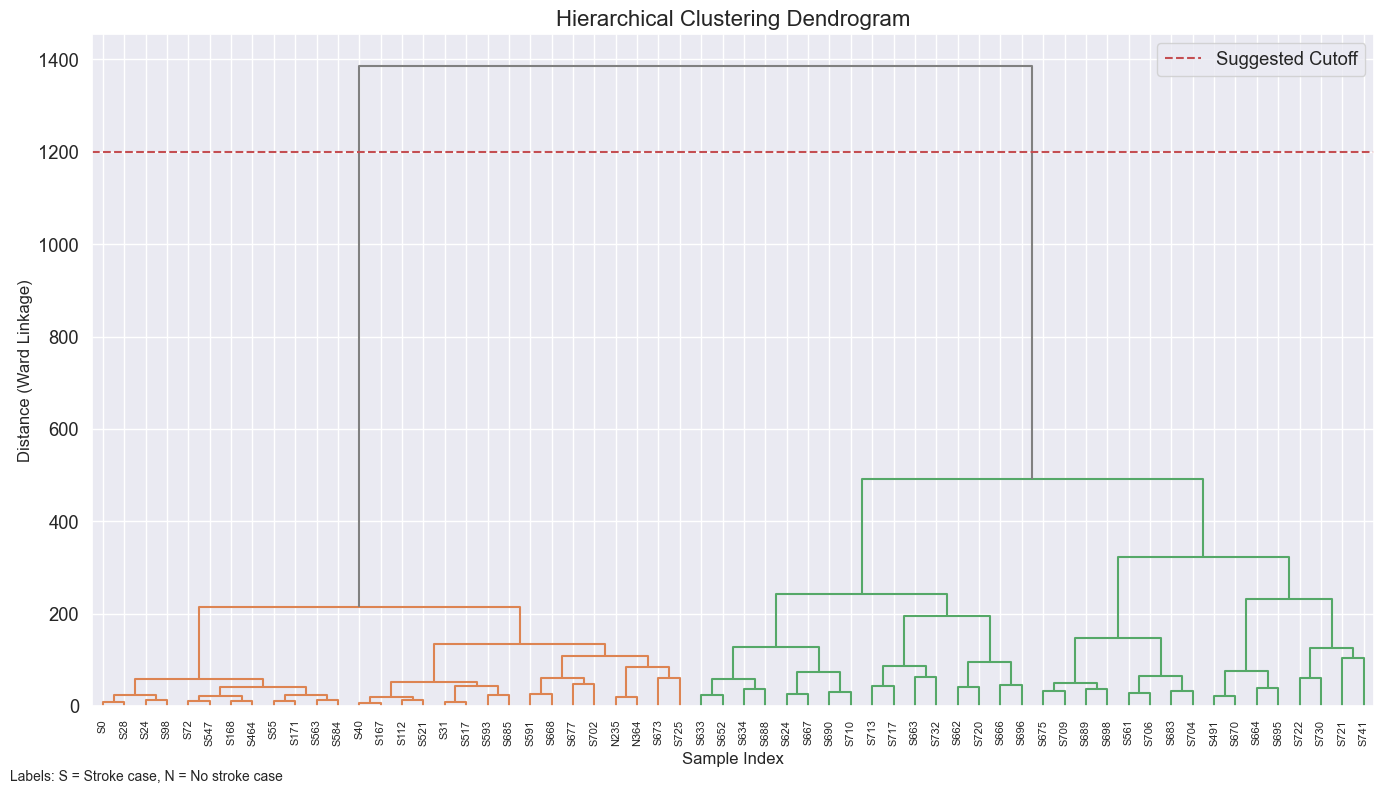

In [163]:
# Compute the linkage matrix with ward linkage
Z = hierarchy.linkage(X_sample, method='ward')

# Plot enhanced dendrogram
plt.figure(figsize=(14, 8))
plt.title('Hierarchical Clustering Dendrogram', fontsize=16)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance (Ward Linkage)', fontsize=12)
# Create color map for stroke status
colors = {0: 'blue', 1: 'red'}
leaf_colors = [colors[y_sample.iloc[i]] if i < len(y_sample) else 'gray' for i in range(len(X_sample))]

# Draw the dendrogram with safe labeling and colored leaves
dendrogram = hierarchy.dendrogram(
    Z,
    truncate_mode='level', 
    p=5,  # Show only top 5 levels
    leaf_font_size=8,
    leaf_rotation=90,
    # Use a safer lambda function that checks for index bounds
    leaf_label_func=lambda id: f"S{id}" if id >= len(y_sample) else f"{'S' if y_sample.iloc[id] == 1 else 'N'}{id}",
    above_threshold_color='gray'
)

# Add a cutoff line for suggested cluster count
plt.axhline(y=1200, color='r', linestyle='--', label='Suggested Cutoff')
plt.legend(loc='upper right')

# Add annotation explaining the labels
plt.figtext(0.01, 0.01, "Labels: S = Stroke case, N = No stroke case", ha="left", fontsize=10)

plt.tight_layout()
plt.show()

For n_clusters = 2, silhouette score is 0.647
For n_clusters = 3, silhouette score is 0.295
For n_clusters = 3, silhouette score is 0.295
For n_clusters = 4, silhouette score is 0.303
For n_clusters = 4, silhouette score is 0.303
For n_clusters = 5, silhouette score is 0.289
For n_clusters = 5, silhouette score is 0.289
For n_clusters = 6, silhouette score is 0.284
For n_clusters = 6, silhouette score is 0.284
For n_clusters = 7, silhouette score is 0.263
For n_clusters = 7, silhouette score is 0.263
For n_clusters = 8, silhouette score is 0.246
For n_clusters = 8, silhouette score is 0.246
For n_clusters = 9, silhouette score is 0.239
For n_clusters = 9, silhouette score is 0.239
For n_clusters = 10, silhouette score is 0.216
For n_clusters = 10, silhouette score is 0.216


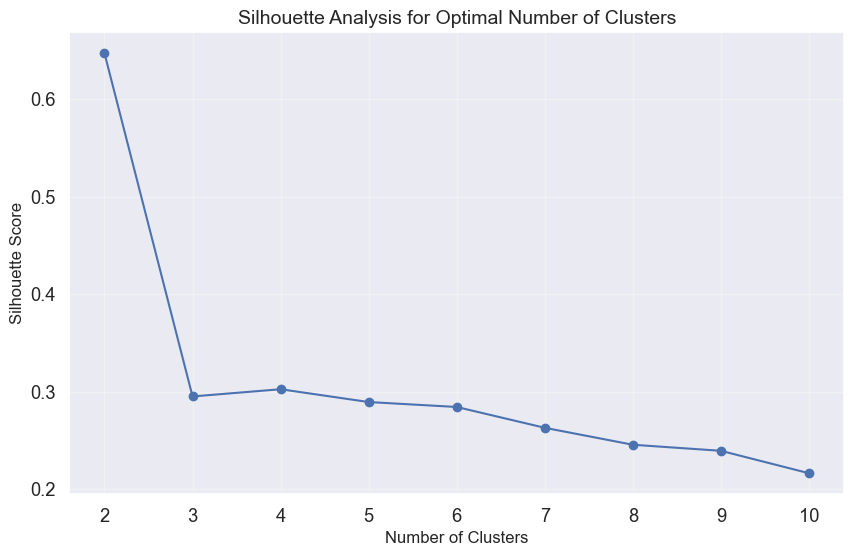

In [164]:
# Determine optimal number of clusters using silhouette analysis
from sklearn.metrics import silhouette_score

silhouette_scores = []
range_n_clusters = range(2, 11)
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(X_combined)
    silhouette_avg = silhouette_score(X_combined, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, silhouette score is {silhouette_avg:.3f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Analysis for Optimal Number of Clusters', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()


Optimal number of clusters based on silhouette score: 2

Stroke distribution in each hierarchical cluster:
         stroke_rate  cluster_size  stroke_cases  non_stroke_cases
cluster                                                           
1           0.089394           660            59               601
0           0.030061          4391           132              4259

Identified high-risk clusters: [1]

Stroke distribution in each hierarchical cluster:
         stroke_rate  cluster_size  stroke_cases  non_stroke_cases
cluster                                                           
1           0.089394           660            59               601
0           0.030061          4391           132              4259

Identified high-risk clusters: [1]


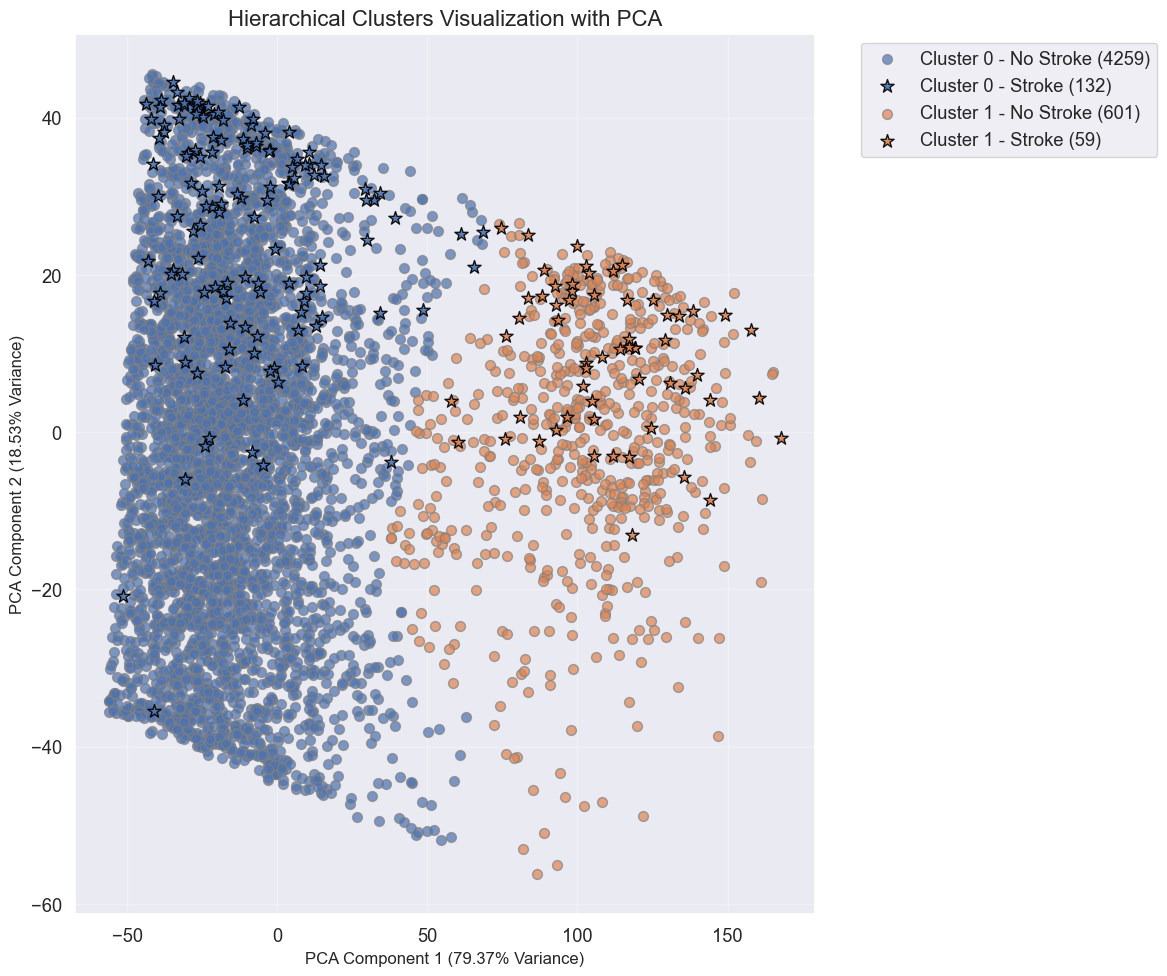

In [165]:
# Select the optimal number of clusters based on silhouette score
optimal_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_clusters}")

# Apply hierarchical clustering with optimal clusters
hc = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
hc_labels = hc.fit_predict(X_combined)

# Add cluster labels to the dataframe
X_with_clusters = X_combined.copy()
X_with_clusters['cluster'] = hc_labels
X_with_clusters['stroke'] = y_combined

# Analyze stroke distribution in each cluster
cluster_stats = X_with_clusters.groupby('cluster')['stroke'].agg(['mean', 'count', 'sum'])
cluster_stats = cluster_stats.rename(columns={'mean': 'stroke_rate', 'count': 'cluster_size', 'sum': 'stroke_cases'})
cluster_stats['non_stroke_cases'] = cluster_stats['cluster_size'] - cluster_stats['stroke_cases']
cluster_stats = cluster_stats.sort_values(by='stroke_rate', ascending=False)

print("\nStroke distribution in each hierarchical cluster:")
print(cluster_stats)
print("\nIdentified high-risk clusters:", cluster_stats.index[cluster_stats['stroke_rate'] > y_combined.mean()].tolist())

# Create a more detailed visualizations of clusters using multiple features
# Apply PCA to visualize clusters in 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined)
X_with_clusters['pca1'] = X_pca[:, 0]
X_with_clusters['pca2'] = X_pca[:, 1]

# Plot clusters with PCA
plt.figure(figsize=(12, 10))

# Scatter plot with cluster colors and stroke shapes
for cluster in range(optimal_clusters):
    subset = X_with_clusters[X_with_clusters['cluster'] == cluster]
    
    # Plot stroke cases with different markers
    stroke_subset = subset[subset['stroke'] == 1]
    non_stroke_subset = subset[subset['stroke'] == 0]
    
    plt.scatter(
        non_stroke_subset['pca1'], 
        non_stroke_subset['pca2'],
        alpha=0.7,
        marker='o',
        s=50,
        label=f"Cluster {cluster} - No Stroke ({non_stroke_subset.shape[0]})",
        edgecolors='gray'
    )
    
    plt.scatter(
        stroke_subset['pca1'], 
        stroke_subset['pca2'],
        alpha=0.9,
        marker='*',
        s=100,
        color=f"C{cluster}",
        label=f"Cluster {cluster} - Stroke ({stroke_subset.shape[0]})",
        edgecolors='black'
    )

plt.title('Hierarchical Clusters Visualization with PCA', fontsize=16)
plt.xlabel(f'PCA Component 1 ({pca.explained_variance_ratio_[0]:.2%} Variance)', fontsize=12)
plt.ylabel(f'PCA Component 2 ({pca.explained_variance_ratio_[1]:.2%} Variance)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('hierarchical_clusters_pca.png')
plt.show()


Optimal number of clusters based on silhouette score: 2

Stroke distribution in each hierarchical cluster:
         stroke_rate  cluster_size  stroke_cases  non_stroke_cases
cluster                                                           
1           0.089394           660            59               601
0           0.030061          4391           132              4259

Identified high-risk clusters: [1]

Stroke distribution in each hierarchical cluster:
         stroke_rate  cluster_size  stroke_cases  non_stroke_cases
cluster                                                           
1           0.089394           660            59               601
0           0.030061          4391           132              4259

Identified high-risk clusters: [1]


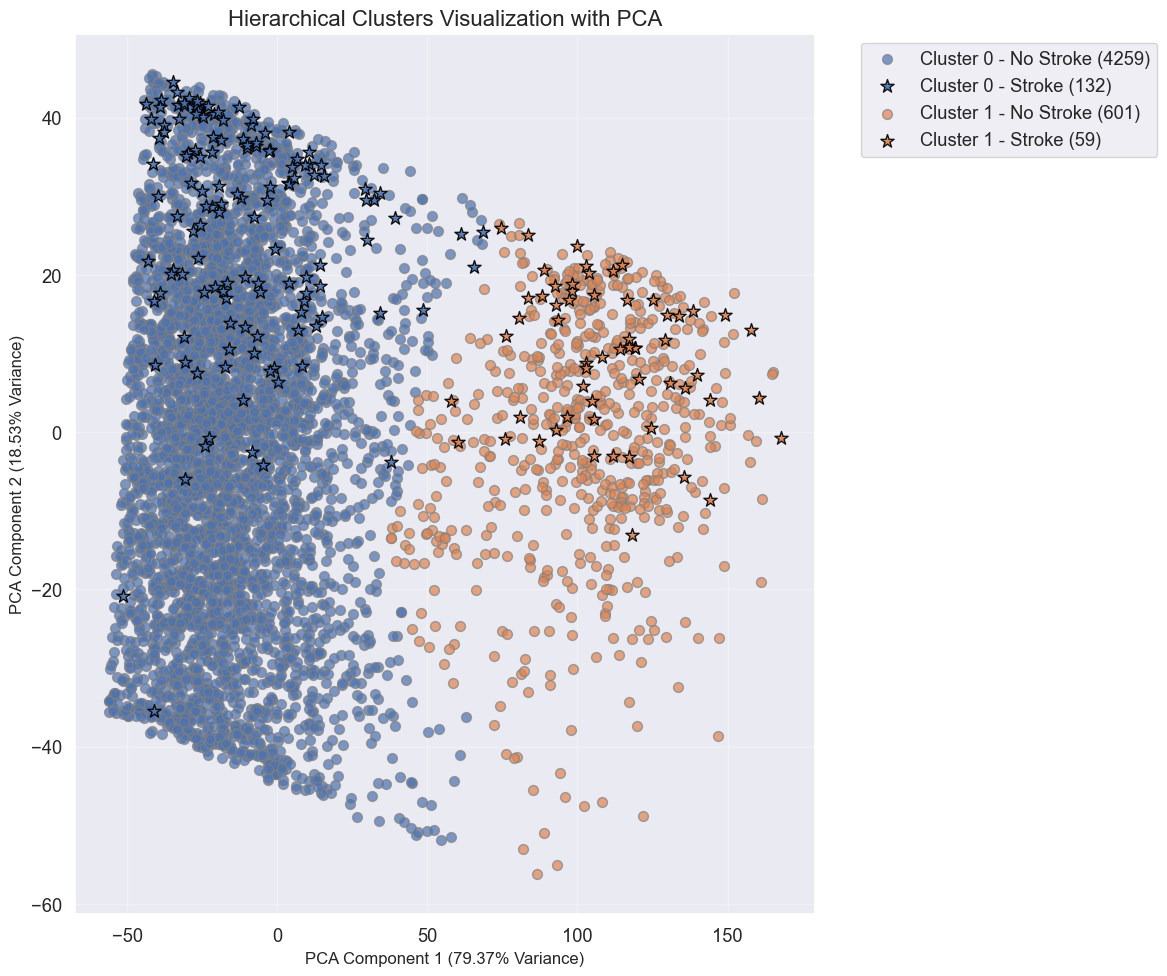

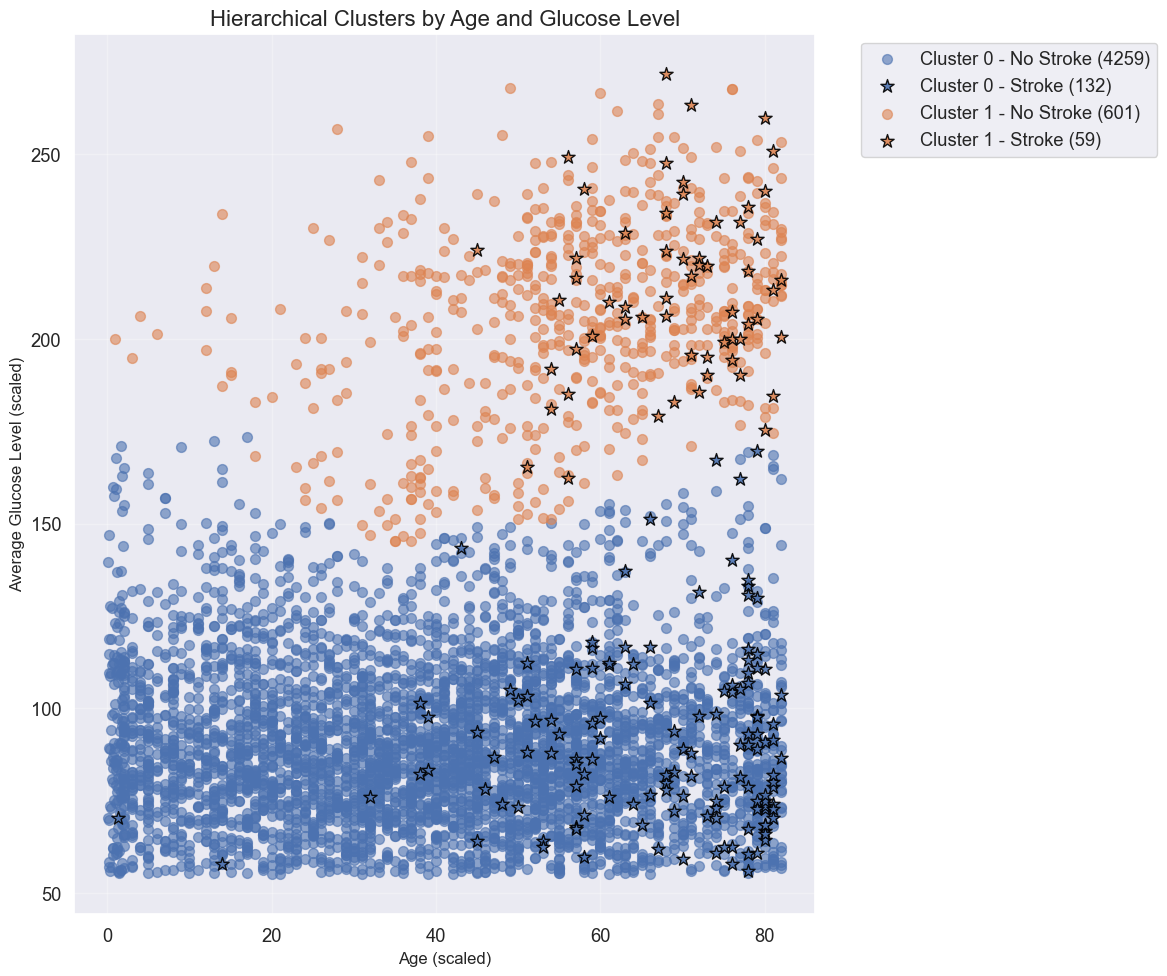


Cluster characteristics:
               age        bmi  avg_glucose_level  hypertension  heart_disease
cluster                                                                      
0        40.678889  28.291015          90.532252      0.073332       0.038032
1        58.019697  32.810029         206.509439      0.243939       0.140909


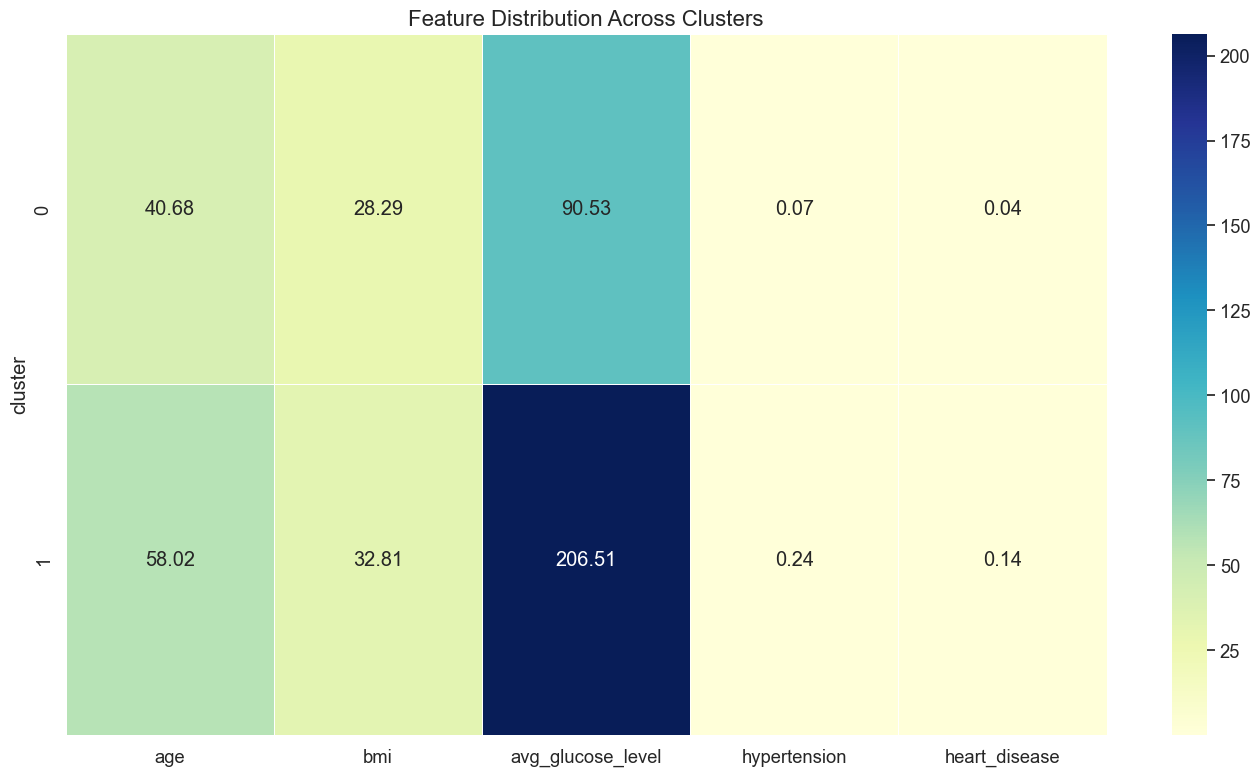


Profile of highest-risk cluster (Cluster 1):
Stroke rate: 8.94%
Cluster size: 660 patients

Average values for key risk factors:
- age: 58.02 (Overall: 42.94, Diff: +35.1%)
- bmi: 32.81 (Overall: 28.88, Diff: +13.6%)
- avg_glucose_level: 206.51 (Overall: 105.69, Diff: +95.4%)
- hypertension: 0.24 (Overall: 0.10, Diff: +155.1%)
- heart_disease: 0.14 (Overall: 0.05, Diff: +173.7%)

Stroke case distribution:
- 59 out of 191 stroke cases (30.9%) are in cluster 1


In [166]:



# Select the optimal number of clusters based on silhouette score
optimal_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_clusters}")

# Apply hierarchical clustering with optimal clusters
hc = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
hc_labels = hc.fit_predict(X_combined)

# Add cluster labels to the dataframe
X_with_clusters = X_combined.copy()
X_with_clusters['cluster'] = hc_labels
X_with_clusters['stroke'] = y_combined

# Analyze stroke distribution in each cluster
cluster_stats = X_with_clusters.groupby('cluster')['stroke'].agg(['mean', 'count', 'sum'])
cluster_stats = cluster_stats.rename(columns={'mean': 'stroke_rate', 'count': 'cluster_size', 'sum': 'stroke_cases'})
cluster_stats['non_stroke_cases'] = cluster_stats['cluster_size'] - cluster_stats['stroke_cases']
cluster_stats = cluster_stats.sort_values(by='stroke_rate', ascending=False)

print("\nStroke distribution in each hierarchical cluster:")
print(cluster_stats)
print("\nIdentified high-risk clusters:", cluster_stats.index[cluster_stats['stroke_rate'] > y_combined.mean()].tolist())

# Create a more detailed visualizations of clusters using multiple features
# Apply PCA to visualize clusters in 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined)
X_with_clusters['pca1'] = X_pca[:, 0]
X_with_clusters['pca2'] = X_pca[:, 1]

# Plot clusters with PCA
plt.figure(figsize=(12, 10))

# Scatter plot with cluster colors and stroke shapes
for cluster in range(optimal_clusters):
    subset = X_with_clusters[X_with_clusters['cluster'] == cluster]
    
    # Plot stroke cases with different markers
    stroke_subset = subset[subset['stroke'] == 1]
    non_stroke_subset = subset[subset['stroke'] == 0]
    
    plt.scatter(
        non_stroke_subset['pca1'], 
        non_stroke_subset['pca2'],
        alpha=0.7,
        marker='o',
        s=50,
        label=f"Cluster {cluster} - No Stroke ({non_stroke_subset.shape[0]})",
        edgecolors='gray'
    )
    
    plt.scatter(
        stroke_subset['pca1'], 
        stroke_subset['pca2'],
        alpha=0.9,
        marker='*',
        s=100,
        color=f"C{cluster}",
        label=f"Cluster {cluster} - Stroke ({stroke_subset.shape[0]})",
        edgecolors='black'
    )

plt.title('Hierarchical Clusters Visualization with PCA', fontsize=16)
plt.xlabel(f'PCA Component 1 ({pca.explained_variance_ratio_[0]:.2%} Variance)', fontsize=12)
plt.ylabel(f'PCA Component 2 ({pca.explained_variance_ratio_[1]:.2%} Variance)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('hierarchical_clusters_pca.png')
plt.show()

# Plot clusters with age and glucose level (key stroke risk factors)
plt.figure(figsize=(12, 10))

# Scatter plot with cluster colors and stroke shapes
for cluster in range(optimal_clusters):
    subset = X_with_clusters[X_with_clusters['cluster'] == cluster]
    
    # Plot stroke cases with different markers
    stroke_subset = subset[subset['stroke'] == 1]
    non_stroke_subset = subset[subset['stroke'] == 0]
    
    plt.scatter(
        non_stroke_subset['age'], 
        non_stroke_subset['avg_glucose_level'],
        alpha=0.6,
        marker='o',
        s=50,
        label=f"Cluster {cluster} - No Stroke ({non_stroke_subset.shape[0]})"
    )
    
    plt.scatter(
        stroke_subset['age'], 
        stroke_subset['avg_glucose_level'],
        alpha=0.9,
        marker='*',
        s=100,
        color=f"C{cluster}",
        label=f"Cluster {cluster} - Stroke ({stroke_subset.shape[0]})",
        edgecolors='black'
    )

plt.title('Hierarchical Clusters by Age and Glucose Level', fontsize=16)
plt.xlabel('Age (scaled)', fontsize=12)
plt.ylabel('Average Glucose Level (scaled)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('hierarchical_clusters_age_glucose.png')
plt.show()

# Analyze cluster characteristics
print("\nCluster characteristics:")
features_of_interest = ['age', 'bmi', 'avg_glucose_level', 
                        'hypertension', 'heart_disease']

cluster_feature_means = X_with_clusters.groupby('cluster')[features_of_interest].mean()
print(cluster_feature_means)

# Visualize feature distribution across clusters with a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(cluster_feature_means, annot=True, cmap="YlGnBu", linewidths=.5, fmt=".2f")
plt.title('Feature Distribution Across Clusters', fontsize=16)
plt.tight_layout()
plt.savefig('cluster_feature_heatmap.png')
plt.show()

# Create a profile of the highest-risk cluster
high_risk_clusters = cluster_stats.index[cluster_stats['stroke_rate'] > y_combined.mean()].tolist()
if high_risk_clusters:
    highest_risk_cluster = high_risk_clusters[0]
    high_risk_profile = X_with_clusters[X_with_clusters['cluster'] == highest_risk_cluster]
    
    print(f"\nProfile of highest-risk cluster (Cluster {highest_risk_cluster}):")
    print(f"Stroke rate: {cluster_stats.loc[highest_risk_cluster, 'stroke_rate']*100:.2f}%")
    print(f"Cluster size: {cluster_stats.loc[highest_risk_cluster, 'cluster_size']} patients")
    print("\nAverage values for key risk factors:")
    for feature in features_of_interest:
        feature_mean = high_risk_profile[feature].mean()
        overall_mean = X_combined[feature].mean()
        difference = ((feature_mean - overall_mean) / overall_mean) * 100 if overall_mean != 0 else 0
        print(f"- {feature}: {feature_mean:.2f} (Overall: {overall_mean:.2f}, Diff: {difference:+.1f}%)")
        
    # Compare stroke cases inside vs. outside the high-risk cluster
    stroke_in_cluster = high_risk_profile[high_risk_profile['stroke'] == 1].shape[0]
    stroke_outside_cluster = y_combined.sum() - stroke_in_cluster
    total_stroke = y_combined.sum()
    
    print(f"\nStroke case distribution:")
    print(f"- {stroke_in_cluster} out of {total_stroke} stroke cases ({stroke_in_cluster/total_stroke*100:.1f}%) " 
          f"are in cluster {highest_risk_cluster}")
else:
    print("No high-risk clusters identified based on mean stroke rate.")

Applying K-means clustering...
For n_clusters = 2, silhouette score: 0.643, inertia: 5001049.071
For n_clusters = 2, silhouette score: 0.643, inertia: 5001049.071
For n_clusters = 3, silhouette score: 0.377, inertia: 3437193.673
For n_clusters = 3, silhouette score: 0.377, inertia: 3437193.673
For n_clusters = 4, silhouette score: 0.381, inertia: 2494568.541
For n_clusters = 4, silhouette score: 0.381, inertia: 2494568.541
For n_clusters = 5, silhouette score: 0.358, inertia: 2124373.416
For n_clusters = 5, silhouette score: 0.358, inertia: 2124373.416
For n_clusters = 6, silhouette score: 0.331, inertia: 1823095.243
For n_clusters = 6, silhouette score: 0.331, inertia: 1823095.243
For n_clusters = 7, silhouette score: 0.324, inertia: 1594462.531
For n_clusters = 7, silhouette score: 0.324, inertia: 1594462.531
For n_clusters = 8, silhouette score: 0.302, inertia: 1454664.664
For n_clusters = 8, silhouette score: 0.302, inertia: 1454664.664
For n_clusters = 9, silhouette score: 0.297, 

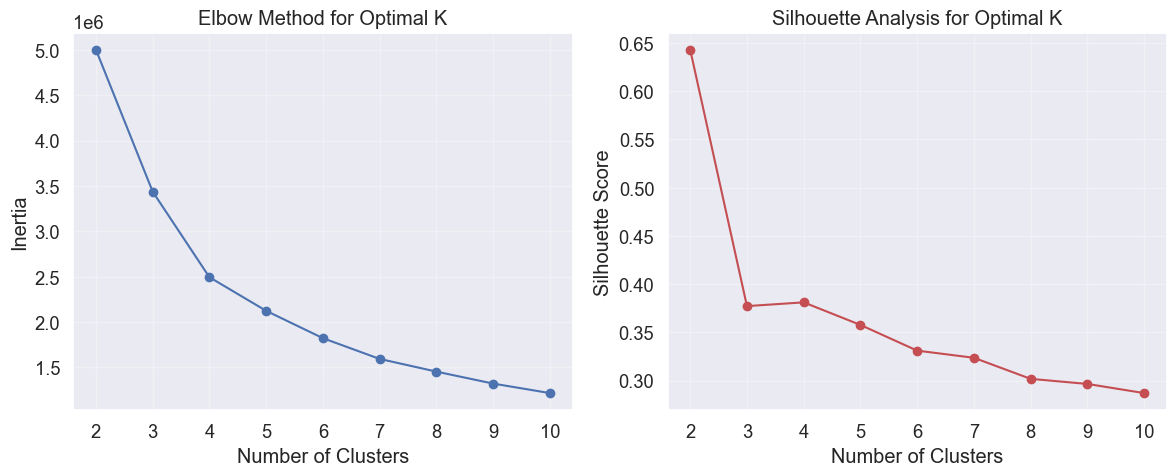

Optimal number of clusters based on silhouette score: 2

Stroke distribution in each K-means cluster:
         stroke_rate  cluster_size  stroke_cases  non_stroke_cases
cluster                                                           
1           0.086538           728            63               665
0           0.029609          4323           128              4195

Identified high-risk clusters: [1]


C:\Users\yakas\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


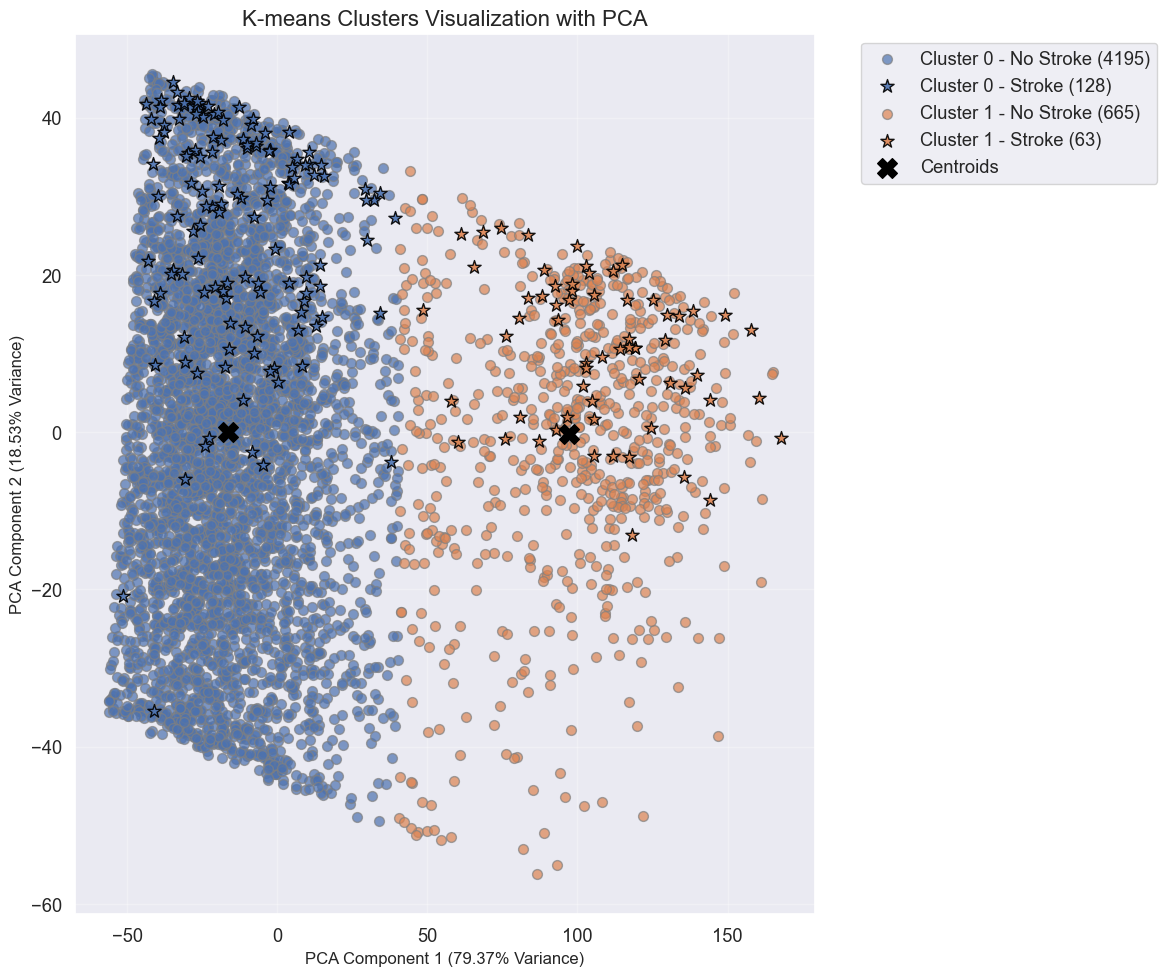

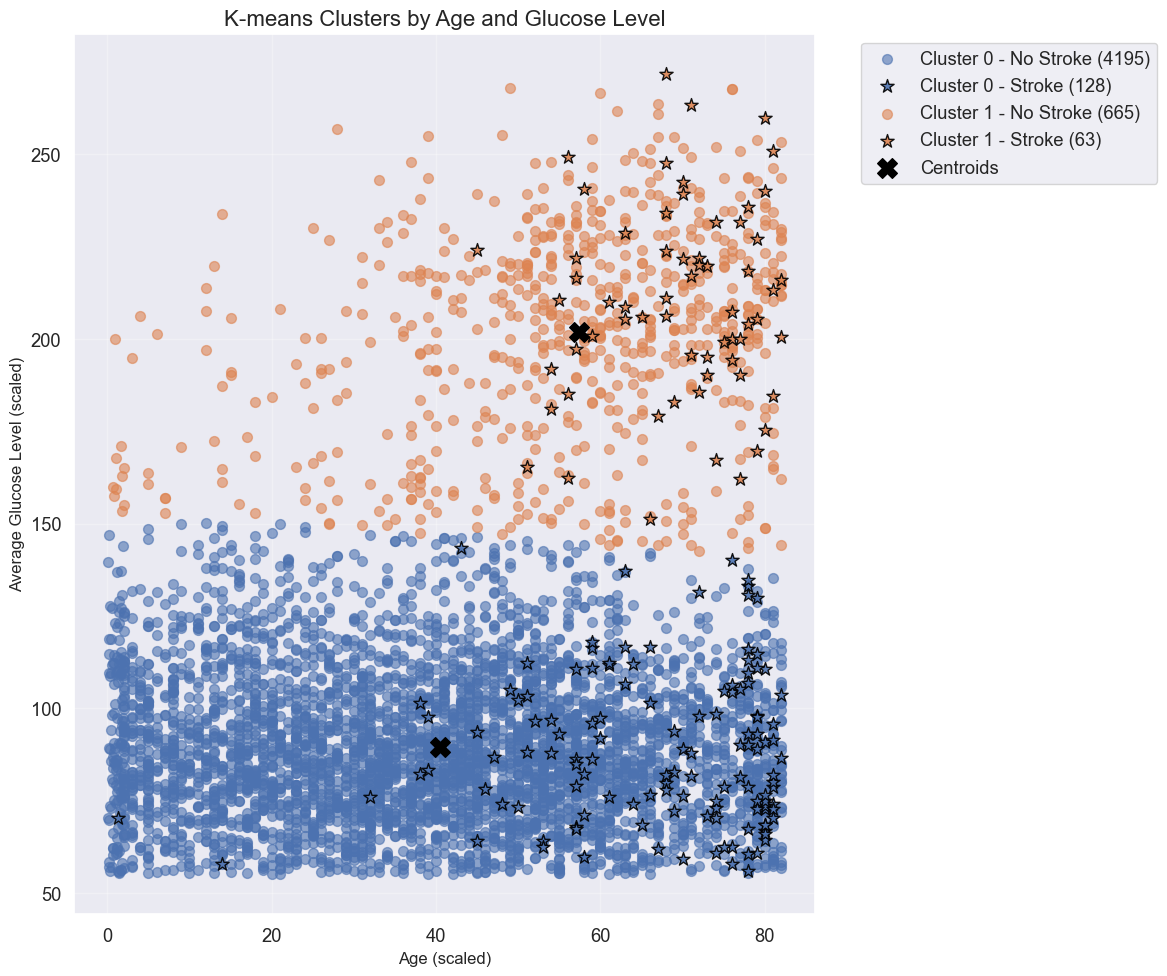


K-means cluster characteristics:
               age        bmi  avg_glucose_level  hypertension  heart_disease
cluster                                                                      
0        40.514458  28.309365          89.505538      0.072403       0.037011
1        57.376374  32.278960         201.773228      0.233516       0.137363


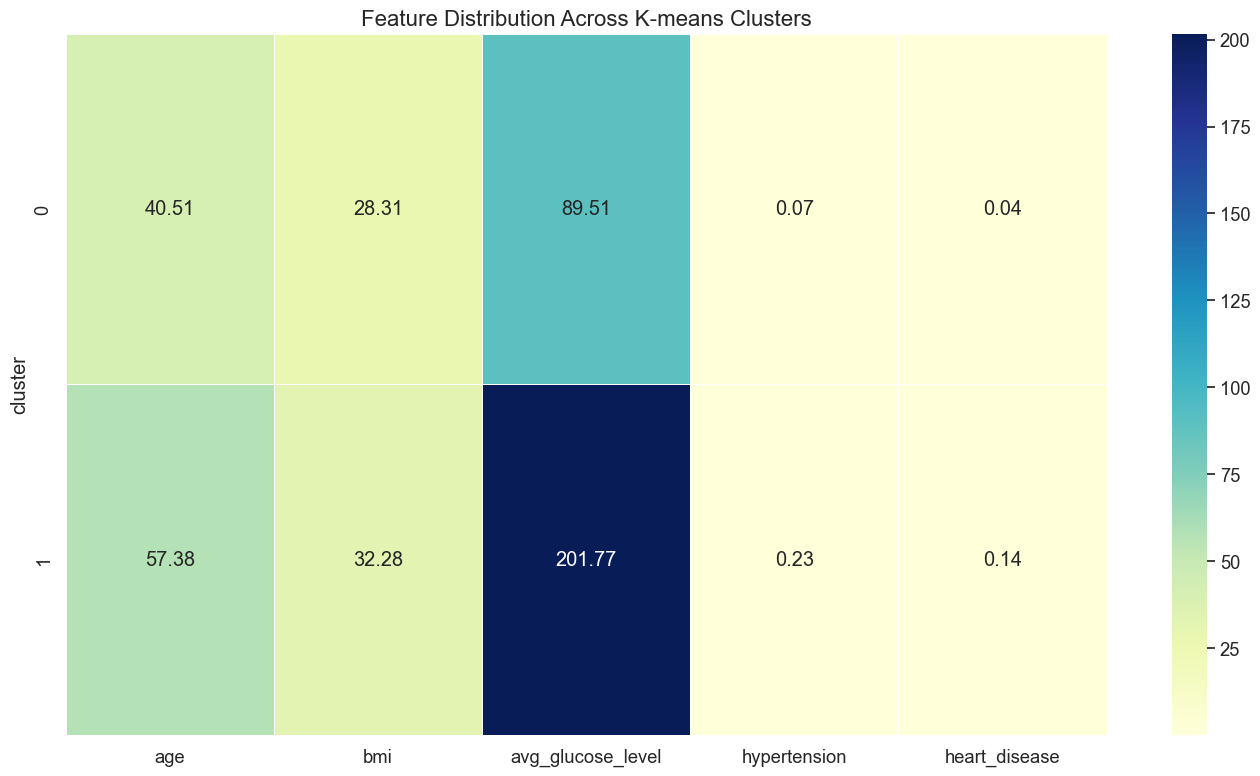


Profile of highest-risk K-means cluster (Cluster 1):
Stroke rate: 8.65%
Cluster size: 728 patients

Average values for key risk factors:
- age: 57.38 (Overall: 42.94, Diff: +33.6%)
- bmi: 32.28 (Overall: 28.88, Diff: +11.8%)
- avg_glucose_level: 201.77 (Overall: 105.69, Diff: +90.9%)
- hypertension: 0.23 (Overall: 0.10, Diff: +144.2%)
- heart_disease: 0.14 (Overall: 0.05, Diff: +166.9%)

Stroke case distribution:
- 63 out of 191 stroke cases (33.0%) are in cluster 1

Comparison between K-means and Hierarchical clustering:
Adjusted Rand Index: 0.916 (1.0 means identical clusterings)
Adjusted Mutual Information: 0.832 (1.0 means identical clusterings)

Cross-tabulation of cluster assignments:
KMeans           0    1
Hierarchical           
0             4318   73
1                5  655


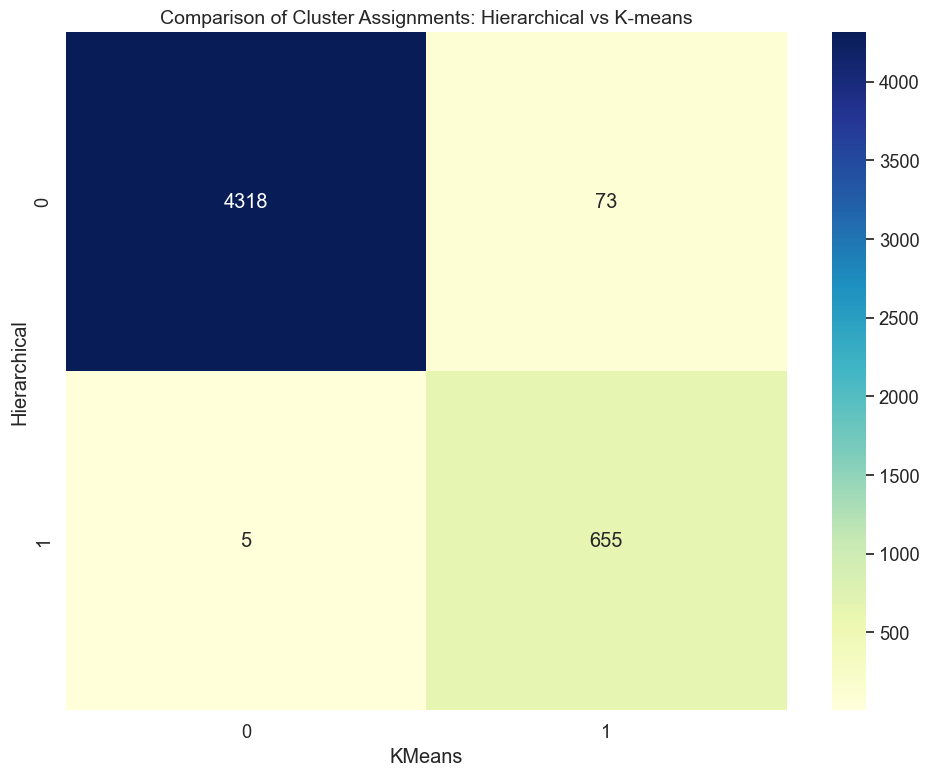

In [167]:
# Apply K-means clustering with visualization and analysis
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score

# Use the same data we used for hierarchical clustering
# X_combined already contains merged train and test data
print("Applying K-means clustering...")

# Find optimal number of clusters using elbow method
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    # Train KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X_combined)
    
    # Record inertia (sum of squared distances to closest centroid)
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score
    cluster_labels = kmeans.predict(X_combined)
    silhouette_avg = silhouette_score(X_combined, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, silhouette score: {silhouette_avg:.3f}, inertia: {kmeans.inertia_:.3f}")

# Plot elbow method result
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('kmeans_elbow_method.png')
plt.show()

# Select optimal number of clusters based on silhouette score
optimal_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_clusters}")

# Apply K-means with optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_combined)

# Add cluster labels to the dataframe
X_with_kmeans_clusters = X_combined.copy()
X_with_kmeans_clusters['cluster'] = kmeans_labels
X_with_kmeans_clusters['stroke'] = y_combined

# Analyze stroke distribution in each cluster
cluster_stats = X_with_kmeans_clusters.groupby('cluster')['stroke'].agg(['mean', 'count', 'sum'])
cluster_stats = cluster_stats.rename(columns={'mean': 'stroke_rate', 'count': 'cluster_size', 'sum': 'stroke_cases'})
cluster_stats['non_stroke_cases'] = cluster_stats['cluster_size'] - cluster_stats['stroke_cases']
cluster_stats = cluster_stats.sort_values(by='stroke_rate', ascending=False)

print("\nStroke distribution in each K-means cluster:")
print(cluster_stats)
print("\nIdentified high-risk clusters:", 
      cluster_stats.index[cluster_stats['stroke_rate'] > y_combined.mean()].tolist())

# Create visualizations of clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined)
X_with_kmeans_clusters['pca1'] = X_pca[:, 0]
X_with_kmeans_clusters['pca2'] = X_pca[:, 1]

# Plot clusters with PCA
plt.figure(figsize=(12, 10))

# Scatter plot with cluster colors and stroke shapes
for cluster in range(optimal_clusters):
    subset = X_with_kmeans_clusters[X_with_kmeans_clusters['cluster'] == cluster]
    
    # Plot stroke cases with different markers
    stroke_subset = subset[subset['stroke'] == 1]
    non_stroke_subset = subset[subset['stroke'] == 0]
    
    plt.scatter(
        non_stroke_subset['pca1'], 
        non_stroke_subset['pca2'],
        alpha=0.7,
        marker='o',
        s=50,
        label=f"Cluster {cluster} - No Stroke ({non_stroke_subset.shape[0]})",
        edgecolors='gray'
    )
    
    plt.scatter(
        stroke_subset['pca1'], 
        stroke_subset['pca2'],
        alpha=0.9,
        marker='*',
        s=100,
        color=f"C{cluster}",
        label=f"Cluster {cluster} - Stroke ({stroke_subset.shape[0]})",
        edgecolors='black'
    )

# Add centroids to the plot
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(
    centroids_pca[:, 0], 
    centroids_pca[:, 1],
    marker='X',
    s=200,
    color='black',
    label='Centroids'
)

plt.title('K-means Clusters Visualization with PCA', fontsize=16)
plt.xlabel(f'PCA Component 1 ({pca.explained_variance_ratio_[0]:.2%} Variance)', fontsize=12)
plt.ylabel(f'PCA Component 2 ({pca.explained_variance_ratio_[1]:.2%} Variance)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('kmeans_clusters_pca.png')
plt.show()

# Plot clusters with age and glucose level (key stroke risk factors)
plt.figure(figsize=(12, 10))

# Scatter plot with cluster colors and stroke shapes
for cluster in range(optimal_clusters):
    subset = X_with_kmeans_clusters[X_with_kmeans_clusters['cluster'] == cluster]
    
    # Plot stroke cases with different markers
    stroke_subset = subset[subset['stroke'] == 1]
    non_stroke_subset = subset[subset['stroke'] == 0]
    
    plt.scatter(
        non_stroke_subset['age'], 
        non_stroke_subset['avg_glucose_level'],
        alpha=0.6,
        marker='o',
        s=50,
        label=f"Cluster {cluster} - No Stroke ({non_stroke_subset.shape[0]})"
    )
    
    plt.scatter(
        stroke_subset['age'], 
        stroke_subset['avg_glucose_level'],
        alpha=0.9,
        marker='*',
        s=100,
        color=f"C{cluster}",
        label=f"Cluster {cluster} - Stroke ({stroke_subset.shape[0]})",
        edgecolors='black'
    )

# Add centroids to the plot
plt.scatter(
    centroids[:, X_combined.columns.get_loc('age')],
    centroids[:, X_combined.columns.get_loc('avg_glucose_level')],
    marker='X',
    s=200,
    color='black',
    label='Centroids'
)

plt.title('K-means Clusters by Age and Glucose Level', fontsize=16)
plt.xlabel('Age (scaled)', fontsize=12)
plt.ylabel('Average Glucose Level (scaled)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('kmeans_clusters_age_glucose.png')
plt.show()

# Analyze cluster characteristics
print("\nK-means cluster characteristics:")
features_of_interest = ['age', 'bmi', 'avg_glucose_level', 
                        'hypertension', 'heart_disease']

cluster_feature_means = X_with_kmeans_clusters.groupby('cluster')[features_of_interest].mean()
print(cluster_feature_means)

# Visualize feature distribution across clusters with a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(cluster_feature_means, annot=True, cmap="YlGnBu", linewidths=.5, fmt=".2f")
plt.title('Feature Distribution Across K-means Clusters', fontsize=16)
plt.tight_layout()
plt.savefig('kmeans_cluster_feature_heatmap.png')
plt.show()

# Create a profile of the highest-risk cluster
high_risk_clusters = cluster_stats.index[cluster_stats['stroke_rate'] > y_combined.mean()].tolist()
if high_risk_clusters:
    highest_risk_cluster = high_risk_clusters[0]
    high_risk_profile = X_with_kmeans_clusters[X_with_kmeans_clusters['cluster'] == highest_risk_cluster]
    
    print(f"\nProfile of highest-risk K-means cluster (Cluster {highest_risk_cluster}):")
    print(f"Stroke rate: {cluster_stats.loc[highest_risk_cluster, 'stroke_rate']*100:.2f}%")
    print(f"Cluster size: {cluster_stats.loc[highest_risk_cluster, 'cluster_size']} patients")
    print("\nAverage values for key risk factors:")
    for feature in features_of_interest:
        feature_mean = high_risk_profile[feature].mean()
        overall_mean = X_combined[feature].mean()
        difference = ((feature_mean - overall_mean) / overall_mean) * 100 if overall_mean != 0 else 0
        print(f"- {feature}: {feature_mean:.2f} (Overall: {overall_mean:.2f}, Diff: {difference:+.1f}%)")
    
    # Compare stroke cases inside vs. outside the high-risk cluster
    stroke_in_cluster = high_risk_profile[high_risk_profile['stroke'] == 1].shape[0]
    total_stroke = y_combined.sum()
    
    print(f"\nStroke case distribution:")
    print(f"- {stroke_in_cluster} out of {total_stroke} stroke cases ({stroke_in_cluster/total_stroke*100:.1f}%) " 
          f"are in cluster {highest_risk_cluster}")
else:
    print("No high-risk clusters identified based on mean stroke rate.")

# Compare K-means and Hierarchical clustering
if 'hc_labels' in locals():
    from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
    
    # Calculate agreement between the two clustering methods
    rand_index = adjusted_rand_score(hc_labels, kmeans_labels)
    mutual_info = adjusted_mutual_info_score(hc_labels, kmeans_labels)
    
    print("\nComparison between K-means and Hierarchical clustering:")
    print(f"Adjusted Rand Index: {rand_index:.3f} (1.0 means identical clusterings)")
    print(f"Adjusted Mutual Information: {mutual_info:.3f} (1.0 means identical clusterings)")
    
    # Create a comparison table of cluster assignments
    comparison_df = pd.DataFrame({'Hierarchical': hc_labels, 'KMeans': kmeans_labels})
    cross_table = pd.crosstab(comparison_df['Hierarchical'], comparison_df['KMeans'], 
                              rownames=['Hierarchical'], colnames=['KMeans'])
    
    print("\nCross-tabulation of cluster assignments:")
    print(cross_table)
    
    # Visualize the comparison
    plt.figure(figsize=(10, 8))
    sns.heatmap(cross_table, annot=True, cmap="YlGnBu", fmt="d")
    plt.title('Comparison of Cluster Assignments: Hierarchical vs K-means', fontsize=14)
    plt.tight_layout()
    plt.savefig('cluster_comparison.png')
    plt.show()

Comparing Clusters with Classifier Predictions
===========================================

In [169]:
# Create a DataFrame with all relevant information for comparison
comparison_df = pd.DataFrame({
    'true_label': y_combined,  # Original true labels
    'kmeans_cluster': kmeans_labels,  # K-means cluster assignments
    'hierarchical_cluster': hc_labels  # Hierarchical cluster assignments
})

# Add predictions from the best classifiers
# Use models that performed best from our previous analysis
best_classifiers = {
    'SVM': best_svc_optuna,
    'Random_Forest': rf_classifier,
    'XGBoost': xgb_classifier
}

# Prepare data for predictions by applying the same scaling as during training
# Scale the numeric features as was done during training
features_to_scale = X_combined[['bmi', 'age', 'avg_glucose_level']].reset_index(drop=True)
X_combined_scaled = scaler.transform(features_to_scale)

# Create a dataframe with the right format for prediction (matching the training format)
X_combined_for_pred = pd.concat([
    X_combined.drop(columns=['bmi', 'age', 'avg_glucose_level']),
    pd.DataFrame(X_combined_scaled, columns=['bmi_scaled', 'age_scaled', 'avg_glucose_level_scaled'])
], axis=1)

# Add predictions from each classifier
for name, model in best_classifiers.items():
    # Add class predictions
    comparison_df[f'{name}_pred'] = model.predict(X_combined_for_pred)
    
    # Add probability scores if available
    if hasattr(model, 'predict_proba'):
        comparison_df[f'{name}_prob'] = model.predict_proba(X_combined_for_pred)[:, 1]  # Probability of stroke

print("Comparison DataFrame showing cluster assignments and model predictions:")
display(comparison_df.head(10))

Comparison DataFrame showing cluster assignments and model predictions:


true_label  kmeans_cluster  hierarchical_cluster  SVM_pred  SVM_prob  \
0           0               0                     0         0  0.077092   
1           0               0                     0         0  0.003854   
2           0               0                     0         0  0.011839   
3           0               1                     1         0  0.079982   
4           0               0                     0         0  0.001863   
5           0               1                     1         0  0.036822   
6           0               0                     0         0  0.065372   
7           0               0                     0         0  0.049663   
8           0               0                     0         0  0.023660   
9           0               1                     0         0  0.019906   

   Random_Forest_pred  Random_Forest_prob  XGBoost_pred  XGBoost_prob  
0                   0                0.00             0      0.032915  
1                   0                0.01             0      0.000389  
2                   0                0.00             0      0.000011  
3                   0                0.08             0      0.097206  
4                   0                0.00             0      0.000028  
5                   0                0.10             0      0.154834  
6                   0                0.00             0      0.004395  
7                   0                0.00             0      0.005935  
8                   0                0.00             0      0.000725  
9                   0                0.04             0      0.011549

In [170]:
# Analyze K-means clusters vs classifier predictions
for name in best_classifiers.keys():
    print(f"\n--- K-means Clusters vs {name} Predictions ---")
    # Distribution of predictions within each cluster
    pred_by_cluster = pd.crosstab(
        comparison_df['kmeans_cluster'], 
        comparison_df[f'{name}_pred'],
        normalize='index'
    ) * 100
    
    print("Percentage of predictions in each cluster:")
    display(pred_by_cluster)
    
    # Calculate agreement between clusters and predictions
    for cluster in sorted(comparison_df['kmeans_cluster'].unique()):
        subset = comparison_df[comparison_df['kmeans_cluster'] == cluster]
        predicted_1 = (subset[f'{name}_pred'] == 1).mean() * 100
        predicted_0 = (subset[f'{name}_pred'] == 0).mean() * 100
        
        print(f"Cluster {cluster}: {predicted_1:.1f}% predicted as stroke, {predicted_0:.1f}% as no-stroke")
    
    # Print out high-risk clusters
    high_risk_clusters = [cluster for cluster in sorted(comparison_df['kmeans_cluster'].unique()) 
                         if (comparison_df[comparison_df['kmeans_cluster'] == cluster][f'{name}_pred'] == 1).mean() > 0.1]
    if high_risk_clusters:
        print(f"\nHigh-risk clusters identified by {name}: {high_risk_clusters}")

# Repeat similar analysis for hierarchical clusters
print("\n=== Hierarchical Clustering Analysis ===")
for name in best_classifiers.keys():
    print(f"\n--- Hierarchical Clusters vs {name} Predictions ---")
    # Distribution of predictions within each cluster
    pred_by_cluster = pd.crosstab(
        comparison_df['hierarchical_cluster'], 
        comparison_df[f'{name}_pred'],
        normalize='index'
    ) * 100
    
    print("Percentage of predictions in each cluster:")
    display(pred_by_cluster)
    
    # Print out high-risk clusters
    high_risk_clusters = [cluster for cluster in sorted(comparison_df['hierarchical_cluster'].unique()) 
                         if (comparison_df[comparison_df['hierarchical_cluster'] == cluster][f'{name}_pred'] == 1).mean() > 0.1]
    if high_risk_clusters:
        print(f"High-risk clusters identified by {name}: {high_risk_clusters}")


--- K-means Clusters vs SVM Predictions ---
Percentage of predictions in each cluster:


SVM_pred                0          1
kmeans_cluster                      
0               95.142262   4.857738
1               89.285714  10.714286

Cluster 0: 4.9% predicted as stroke, 95.1% as no-stroke
Cluster 1: 10.7% predicted as stroke, 89.3% as no-stroke

High-risk clusters identified by SVM: [np.int32(1)]

--- K-means Clusters vs Random_Forest Predictions ---
Percentage of predictions in each cluster:


Random_Forest_pred          0         1
kmeans_cluster                         
0                   98.126301  1.873699
1                   93.681319  6.318681

Cluster 0: 1.9% predicted as stroke, 98.1% as no-stroke
Cluster 1: 6.3% predicted as stroke, 93.7% as no-stroke

--- K-means Clusters vs XGBoost Predictions ---
Percentage of predictions in each cluster:


XGBoost_pred            0         1
kmeans_cluster                     
0               97.987509  2.012491
1               92.719780  7.280220

Cluster 0: 2.0% predicted as stroke, 98.0% as no-stroke
Cluster 1: 7.3% predicted as stroke, 92.7% as no-stroke

=== Hierarchical Clustering Analysis ===

--- Hierarchical Clusters vs SVM Predictions ---
Percentage of predictions in each cluster:


SVM_pred                      0          1
hierarchical_cluster                      
0                     94.989752   5.010248
1                     89.696970  10.303030

High-risk clusters identified by SVM: [np.int64(1)]

--- Hierarchical Clusters vs Random_Forest Predictions ---
Percentage of predictions in each cluster:


Random_Forest_pred            0         1
hierarchical_cluster                     
0                     98.086996  1.913004
1                     93.484848  6.515152


--- Hierarchical Clusters vs XGBoost Predictions ---
Percentage of predictions in each cluster:


XGBoost_pred                  0         1
hierarchical_cluster                     
0                     97.904805  2.095195
1                     92.727273  7.272727

In [171]:
# Calculate agreement metrics between clusters and classifier predictions
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

print("--- Agreement Metrics Between Clusters and Classifier Predictions ---")
for name in best_classifiers.keys():
    # Adjusted Rand Index (ARI)
    kmeans_ari = adjusted_rand_score(comparison_df['kmeans_cluster'], comparison_df[f'{name}_pred'])
    hc_ari = adjusted_rand_score(comparison_df['hierarchical_cluster'], comparison_df[f'{name}_pred'])
    
    # Adjusted Mutual Information (AMI)
    kmeans_ami = adjusted_mutual_info_score(comparison_df['kmeans_cluster'], comparison_df[f'{name}_pred'])
    hc_ami = adjusted_mutual_info_score(comparison_df['hierarchical_cluster'], comparison_df[f'{name}_pred'])
    
    print(f"\n{name} Agreement:")
    print(f"K-means: ARI = {kmeans_ari:.4f}, AMI = {kmeans_ami:.4f}")
    print(f"Hierarchical: ARI = {hc_ari:.4f}, AMI = {hc_ami:.4f}")

--- Agreement Metrics Between Clusters and Classifier Predictions ---

SVM Agreement:
K-means: ARI = 0.0619, AMI = 0.0102
Hierarchical: ARI = 0.0560, AMI = 0.0079

Random_Forest Agreement:
K-means: ARI = 0.0555, AMI = 0.0140
Hierarchical: ARI = 0.0586, AMI = 0.0142

XGBoost Agreement:
K-means: ARI = 0.0650, AMI = 0.0174
Hierarchical: ARI = 0.0650, AMI = 0.0161


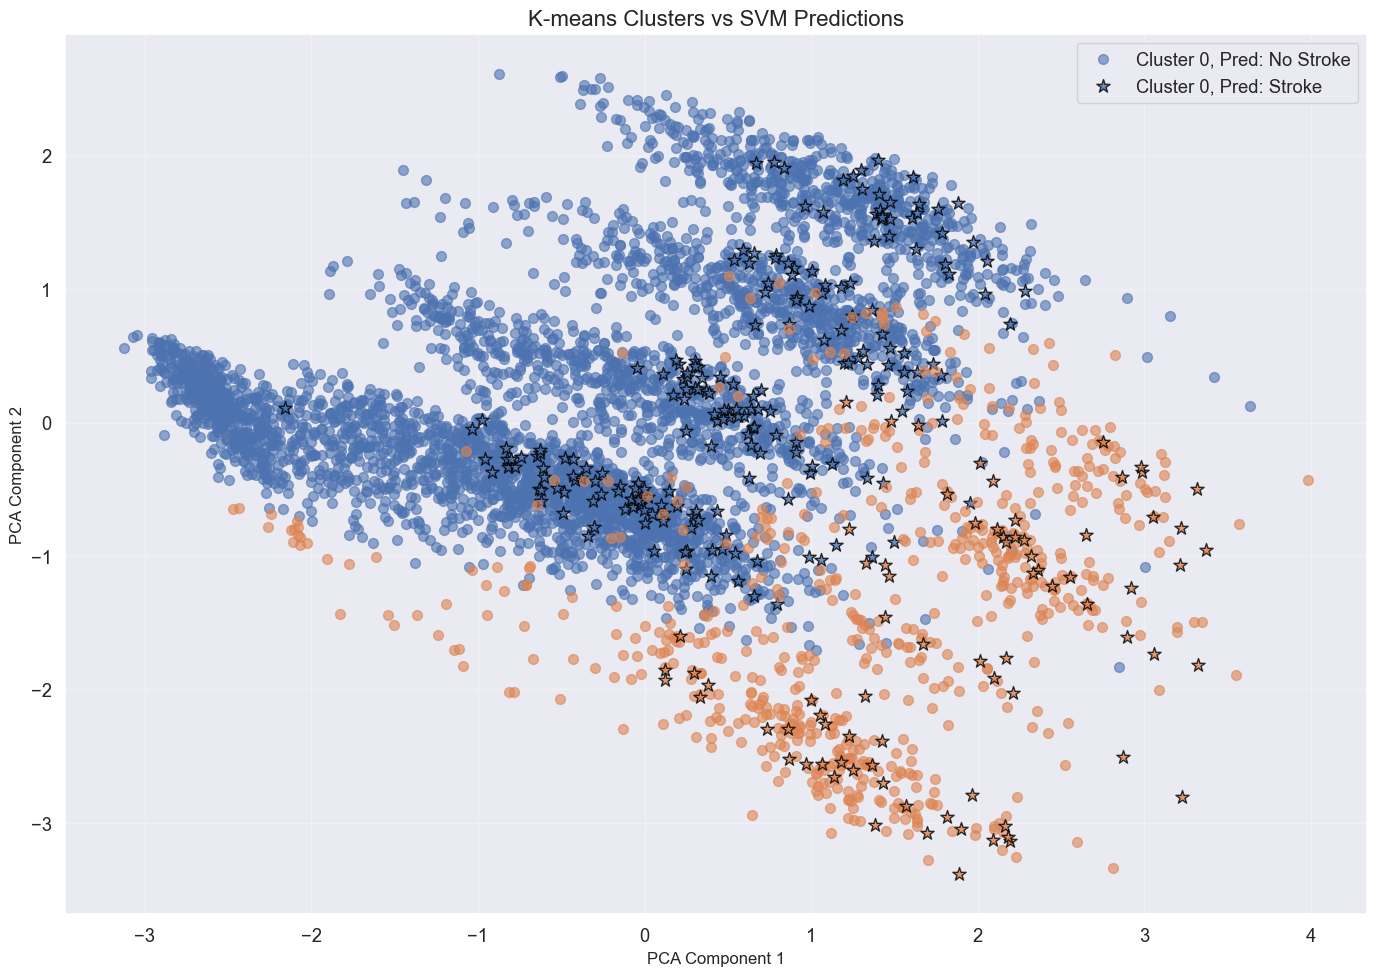

In [172]:
# Visualize Cluster-Prediction Consistency using PCA
# Choose the best performing classifier to visualize
best_classifier_name = 'SVM'  # Replace with your best model if different

plt.figure(figsize=(14, 10))

# Make sure we have PCA components for visualization
if 'pca1' not in comparison_df.columns:
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_combined_for_pred)
    comparison_df['pca1'] = X_pca[:, 0]
    comparison_df['pca2'] = X_pca[:, 1]

# Create a scatter plot for each cluster, with different markers for predictions
for cluster in sorted(comparison_df['kmeans_cluster'].unique()):
    # Filter points in this cluster
    cluster_data = comparison_df[comparison_df['kmeans_cluster'] == cluster]
    
    # Points predicted as no stroke (0)
    no_stroke = cluster_data[cluster_data[f'{best_classifier_name}_pred'] == 0]
    plt.scatter(no_stroke['pca1'], no_stroke['pca2'], 
                marker='o', s=50, alpha=0.6,
                color=f'C{cluster}',
                label=f'Cluster {cluster}, Pred: No Stroke' if cluster == 0 else None)
    
    # Points predicted as stroke (1)
    stroke = cluster_data[cluster_data[f'{best_classifier_name}_pred'] == 1]
    plt.scatter(stroke['pca1'], stroke['pca2'], 
                marker='*', s=100, alpha=0.8, 
                color=f'C{cluster}', edgecolors='black',
                label=f'Cluster {cluster}, Pred: Stroke' if cluster == 0 else None)

# Add legend (only for the first cluster to avoid duplicates)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')

plt.title(f'K-means Clusters vs {best_classifier_name} Predictions', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


--- Misclassification Analysis ---

SVM Misclassifications by Cluster:
Cluster 1: 7.01% misclassified (728 samples)
Cluster 0: 3.89% misclassified (4323 samples)


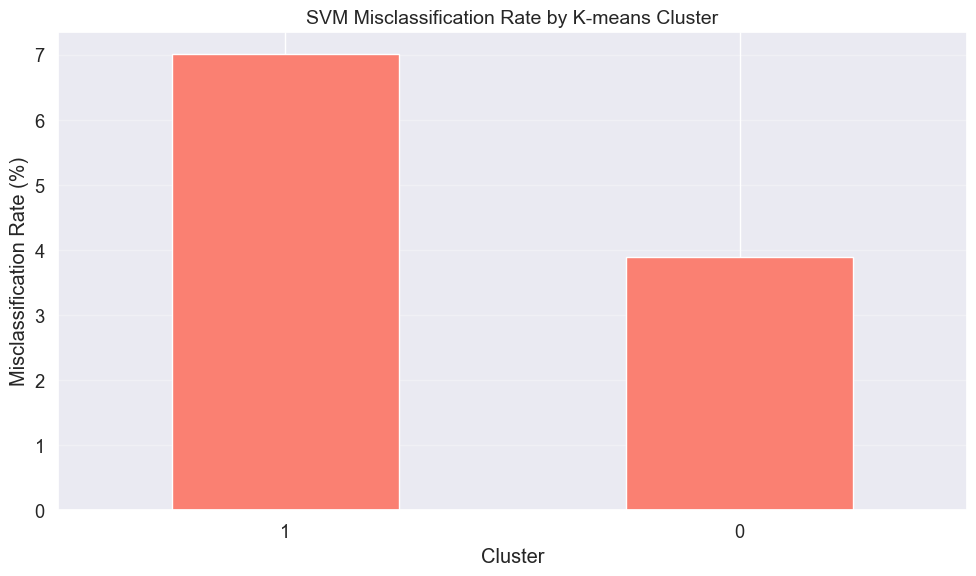


Random_Forest Misclassifications by Cluster:
Cluster 1: 3.43% misclassified (728 samples)
Cluster 0: 1.09% misclassified (4323 samples)


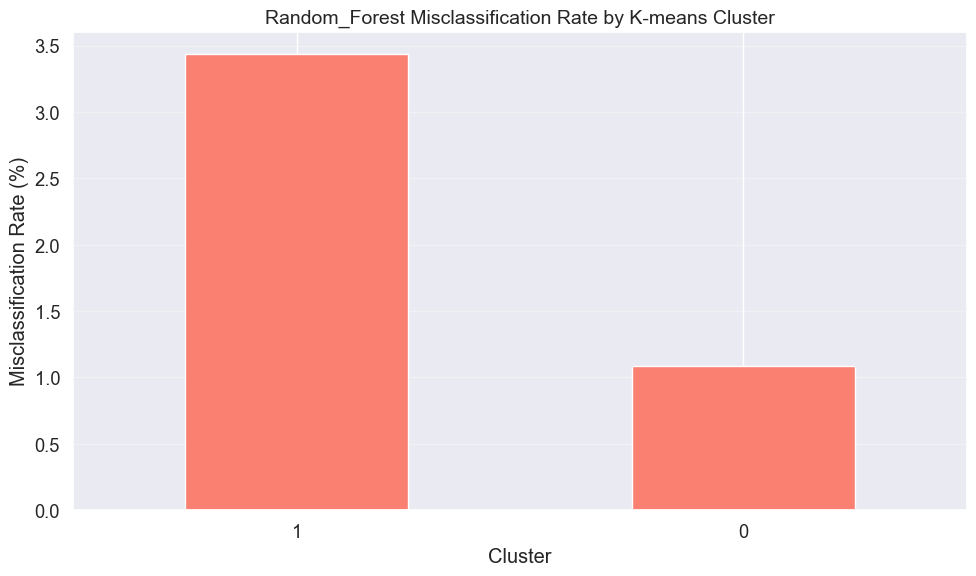


XGBoost Misclassifications by Cluster:
Cluster 1: 4.40% misclassified (728 samples)
Cluster 0: 1.27% misclassified (4323 samples)


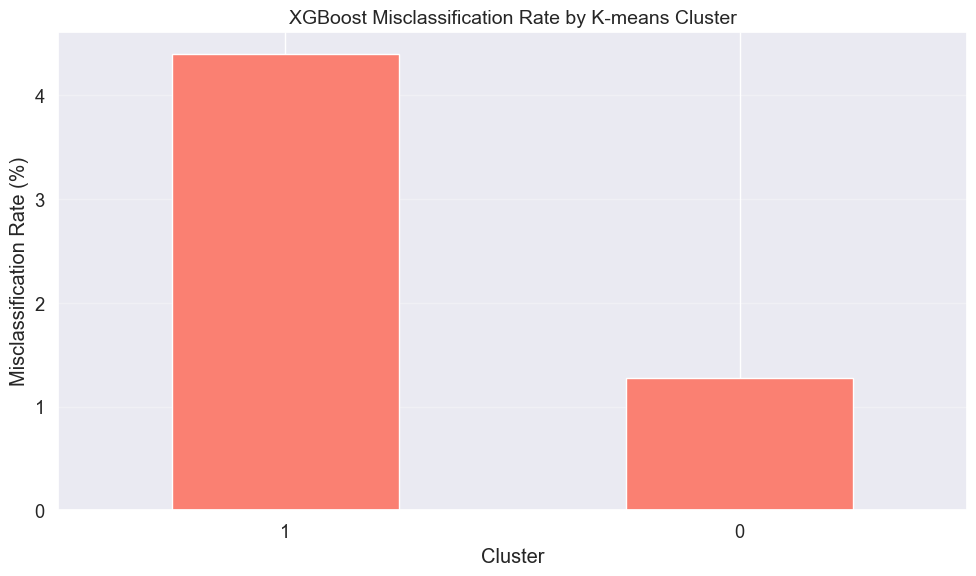

In [173]:
# Find which clusters have the most misclassifications
print("\n--- Misclassification Analysis ---")
for name in best_classifiers.keys():
    # Add a column for misclassifications
    comparison_df[f'{name}_misclassified'] = comparison_df[f'{name}_pred'] != comparison_df['true_label']
    
    # Analyze misclassifications by cluster
    print(f"\n{name} Misclassifications by Cluster:")
    misclass_by_cluster = comparison_df.groupby('kmeans_cluster')[f'{name}_misclassified'].mean() * 100
    misclass_by_cluster = misclass_by_cluster.sort_values(ascending=False)
    
    # Display the error rate in each cluster
    for cluster, error_rate in misclass_by_cluster.items():
        cluster_size = (comparison_df['kmeans_cluster'] == cluster).sum()
        print(f"Cluster {cluster}: {error_rate:.2f}% misclassified ({cluster_size} samples)")
        
    # Create a bar chart of misclassification rates by cluster
    plt.figure(figsize=(10, 6))
    misclass_by_cluster.plot(kind='bar', color='salmon')
    plt.title(f'{name} Misclassification Rate by K-means Cluster', fontsize=14)
    plt.xlabel('Cluster')
    plt.ylabel('Misclassification Rate (%)')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

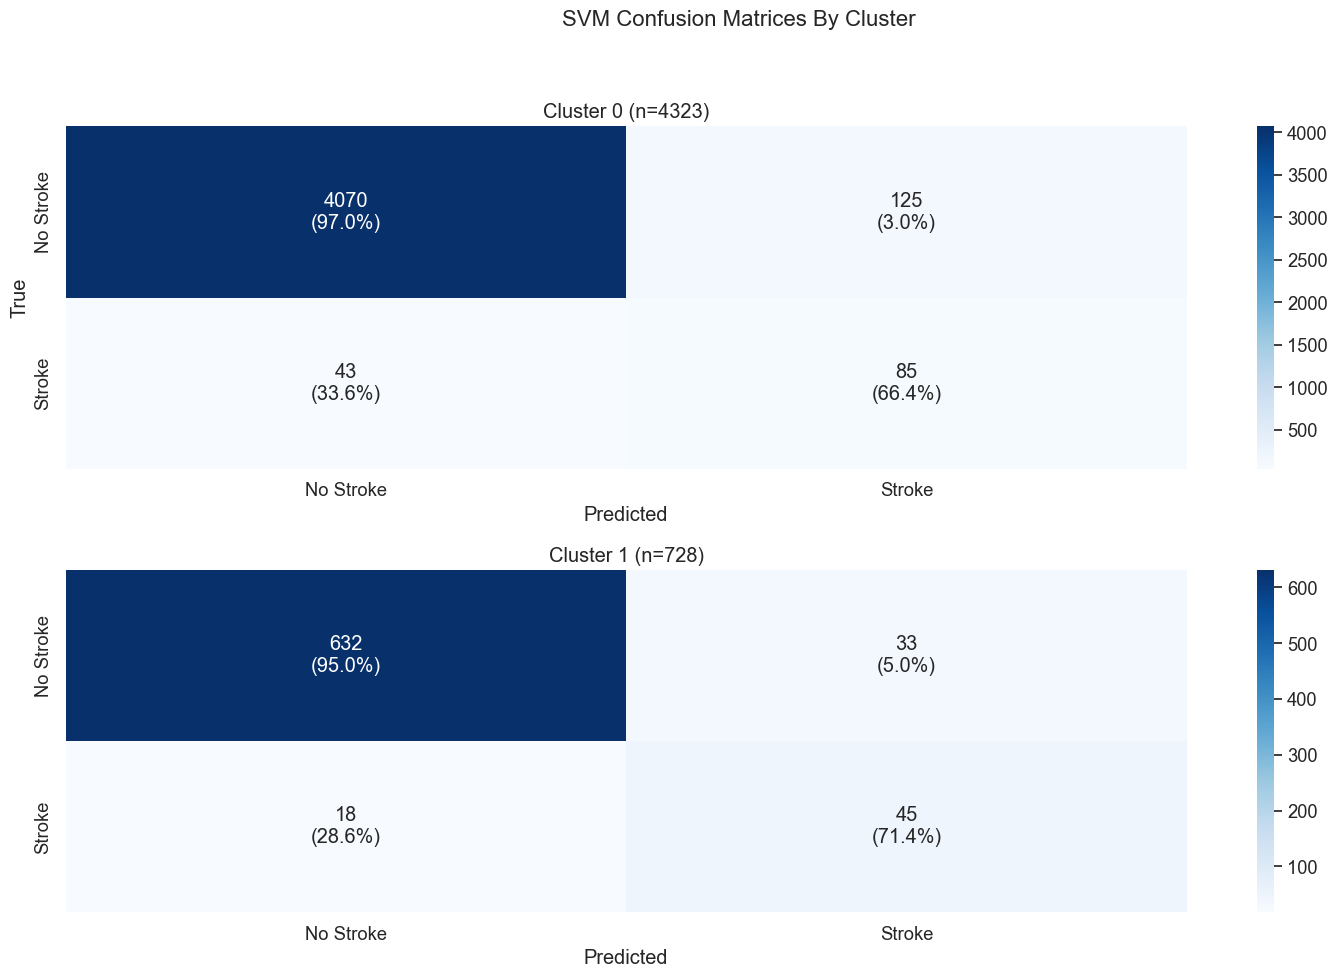

In [174]:
import matplotlib.gridspec as gridspec
from sklearn.metrics import confusion_matrix

# Generate confusion matrices for each cluster for the best classifier
classifier_name = 'SVM'  # Choose your best model

# Create a grid of confusion matrices
n_clusters = len(comparison_df['kmeans_cluster'].unique())
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, (n_clusters + 1) // 2)

for i, cluster in enumerate(sorted(comparison_df['kmeans_cluster'].unique())):
    # Filter data for this cluster
    cluster_data = comparison_df[comparison_df['kmeans_cluster'] == cluster]
    
    # Generate confusion matrix
    cm = confusion_matrix(cluster_data['true_label'], cluster_data[f'{classifier_name}_pred'])
    
    # Calculate percentages (avoid division by zero)
    row_sums = cm.sum(axis=1)
    cm_percentage = np.zeros_like(cm, dtype=float)
    for j in range(len(row_sums)):
        if row_sums[j] > 0:
            cm_percentage[j] = cm[j] / row_sums[j] * 100
    
    # Create annotations with count and percentage
    annotations = np.empty_like(cm, dtype=object)
    for j in range(cm.shape[0]):
        for k in range(cm.shape[1]):
            annotations[j, k] = f"{cm[j, k]}\n({cm_percentage[j, k]:.1f}%)"
    
    # Plot confusion matrix
    ax = fig.add_subplot(gs[i])
    sns.heatmap(cm, annot=annotations, fmt="", cmap=plt.cm.Blues, 
                xticklabels=['No Stroke', 'Stroke'],
                yticklabels=['No Stroke', 'Stroke'], ax=ax)
    
    ax.set_title(f'Cluster {cluster} (n={len(cluster_data)})')
    if i >= n_clusters - 2:  # Add x-label only to bottom plots
        ax.set_xlabel('Predicted')
    if i % 2 == 0:  # Add y-label only to leftmost plots
        ax.set_ylabel('True')

plt.suptitle(f'{classifier_name} Confusion Matrices By Cluster', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()